# DSO 528: Blended Data Business Analytics for Efficient Decisions

## Final Project Report: The Anatomy of a Hit: Unlocking Trends in Music Data

## Group 4: Chinmay Sashittal, Jnana K P, Sameer Agarwal, Shyamal Oza

# Table of Contents:

- **Phase 1:** Executive Summary  
- **Phase 2:** Data Loading and Initial Handling  
- **Phase 3:** Data Cleaning and Preprocessing  
- **Phase 4:** Feature Engineering  
- **Phase 5:** Exploratory Data Analysis (EDA)  
- **Phase 6:** Model Building and Evaluation  
- **Phase 7:** Final Model Selection  
- **Phase 8:** Financial Payoff Analysis  
- **Phase 9:** Recommendations  


## Team Contributions and Phase Allocation:

- **Author:** Chinmay Sashittal  
  **Contributions:** Phase 6 (Model Building and Evaluation), Phase 7 (Final Model Selection)

- **Author:** Jnana K P  
  **Contributions:** Phase 2 (Data Loading and Initial Handling), Phase 3 (Data Cleaning and Preprocessing), Phase 4 (Feature Engineering)

- **Author:** Sameer Agarwal  
  **Contributions:** Phase 5 (Exploratory Data Analysis), Phase 8 (Financial Payoff Analysis)

- **Author:** Shyamal Oza  
  **Contributions:** Phase 1 (Executive Summary), Phase 9 (Recommendations)


# Phase 1: Executive Summary

This project investigates song popularity prediction using data-driven approaches, leveraging Spotify's extensive datasets to support Universal Music in optimizing promotional strategies. Two datasets were analyzed: Dataset 1, comprising historical data on popular and less popular songs up to 2020, and Dataset 2, a smaller sample of recently popular tracks up to 2023. Additionally, a merged dataset combining both was created to explore combined insights. Comprehensive analysis was conducted for each dataset across all methodological phases, including data preparation, exploratory data analysis, and model development. After rigorous evaluation of all models, the Random Forest model developed on the merged dataset was selected for deployment due to its enhanced predictive accuracy and interpretability.

The methodology began with meticulous data loading, cleaning, and preprocessing to address missing values, standardize variables, and ensure dataset quality. Feature engineering further enriched the datasets by creating key variables such as acousticness, danceability, energy, and valence—factors identified as critical in influencing song success. Exploratory Data Analysis (EDA) highlighted important trends, including the strong association of high danceability and moderate energy levels with song popularity, providing critical insights for feature selection and model development.

Machine learning models, including Logistic Regression, Decision Trees, Random Forest, XGBoost, and LightGBM, were applied and rigorously evaluated for each dataset. Through iterative testing and hyperparameter tuning, the Random Forest model built on the merged dataset emerged as the optimal choice. It achieved an accuracy of 87.64% and an ROC-AUC score of 0.849 on the test set, demonstrating robust performance and generalizability. The decision to use the merged dataset was driven by its ability to integrate diverse insights from both historical and recent data, ensuring a more comprehensive and representative analysis.

A detailed financial analysis evaluated the potential revenue impact of the selected model. With popular songs projected to generate 150 thousand dollars annually, unpopular songs 20 thousand dollars, and a 30 thousand dollar investment per track, the Random Forest model built on the merged dataset delivered an expected annual payoff of 135.67 million dollars. Accounting for a 20% likelihood of false positives converting to true positives through promotional efforts, the payoff increased to 139.54 million dollars, underscoring the model’s substantial financial contribution.

This project demonstrates the systematic application of data analytics, machine learning, and financial modeling to predict song popularity. By conducting thorough analysis across all datasets and selecting the merged dataset for final deployment, the findings provide Universal Music with a robust framework to identify high-potential tracks, optimize promotional investments, and align with strategic business goals in the competitive music industry.


# Phase 2: Loading and Initial Handling

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset 1:

In [2]:
df1 = pd.read_csv('DSO528_project_spotify_1.csv')

In [3]:
print("Dataset 1:", df1.shape)

Dataset 1: (26266, 19)


In [4]:
df1.head()

track_id    track_name    track_artist  popular release_year  \
0  697MjF1454XKvZmTuqkWmD    I Miss You          Jeriqo        0         2019   
1  3x2bXiU0o4WbsPkawXlfDA   Who Are You         The Who        0         1978   
2  0jEaPBjFAWjQTMVouRwaHi         Happy  The Beef Seeds        0         2015   
3  5EKUb1FKsyYVaSXb41YBIj           ONE      Rev Theory        0         2020   
4  300DUx4tdtCdGEUXR032jA  Palace/Curse    The Internet        0         2015   

  release_month playlist_genre  danceability  energy  key  loudness  mode  \
0             2            edm         0.520   0.789    0    -7.717     1   
1             8           rock         0.651   0.661    9   -11.405     1   
2             1            r&b         0.640   0.758   10    -5.204     1   
3             1           rock         0.398   0.966    4    -2.352     0   
4             6            r&b         0.447   0.625   10    -8.212     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0432      0.004910          0.000013    0.0816    0.415  174.026   
1       0.0511      0.265000          0.003130    0.1060    0.489  156.371   
2       0.1600      0.665000          0.000000    0.1270    0.932   86.529   
3       0.0453      0.000006          0.000000    0.3030    0.520   90.016   
4       0.3230      0.035100          0.000727    0.2430    0.261   67.104   

   duration_ms  
0       216347  
1       378707  
2       218044  
3       208196  
4       440013

In [5]:
df1.tail()

track_id                     track_name   track_artist  \
26261  6jUyYHDikmw9WltPojSR37             Got 'Til It's Gone  Janet Jackson   
26262  29ikXeGM6kScvhvqfvgiwO                  Drunken Truth     Steve Void   
26263  47zREtxQZ3cHHIZwUQnuuN  Never Be Like You (feat. Kai)          Flume   
26264  61swngFBghaxXM0YT7CDU1        Symphony - Original Mix   Sandro Silva   
26265  0oWHLtxWeMJhmwxtrxhNK0          Welcome To The Jungle  Guns N' Roses   

       popular release_year release_month playlist_genre  danceability  \
26261        0         1997            10            r&b         0.789   
26262        0         2019            12            pop         0.781   
26263        0         2016             5            edm         0.564   
26264        0         2014             8            edm         0.545   
26265        0         1987             1           rock         0.443   

       energy  key  loudness  mode  speechiness  acousticness  \
26261   0.413    7    -7.518     1       0.2440       0.02230   
26262   0.745    1    -4.942     0       0.0374       0.08140   
26263   0.552    0    -5.438     1       0.0550       0.43900   
26264   0.774    0    -3.689     1       0.0440       0.00148   
26265   0.955    8    -8.066     1       0.0741       0.02220   

       instrumentalness  liveness  valence    tempo  duration_ms  
26261          0.000313     0.300    0.518   89.911       241760  
26262          0.000097     0.106    0.498  110.051       158091  
26263          0.000000     0.163    0.260  119.907       233337  
26264          0.933000     0.559    0.212  128.026       301890  
26265          0.361000     0.297    0.333  123.423       273600

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          26266 non-null  object 
 1   track_name        26263 non-null  object 
 2   track_artist      26263 non-null  object 
 3   popular           26266 non-null  int64  
 4   release_year      26266 non-null  object 
 5   release_month     26266 non-null  object 
 6   playlist_genre    26266 non-null  object 
 7   danceability      26266 non-null  float64
 8   energy            26266 non-null  float64
 9   key               26266 non-null  int64  
 10  loudness          26266 non-null  float64
 11  mode              26266 non-null  int64  
 12  speechiness       26266 non-null  float64
 13  acousticness      26266 non-null  float64
 14  instrumentalness  26266 non-null  float64
 15  liveness          26266 non-null  float64
 16  valence           26266 non-null  float6

In [7]:
df1.describe()

popular  danceability        energy           key      loudness  \
count  26266.000000  26266.000000  26266.000000  26266.000000  26266.000000   
mean       0.217924      0.654880      0.698126      5.385708     -6.733465   
std        0.412844      0.145427      0.180970      3.605997      2.994345   
min        0.000000      0.000000      0.008140      0.000000    -46.448000   
25%        0.000000      0.563000      0.580000      2.000000     -8.189000   
50%        0.000000      0.672000      0.721000      6.000000     -6.182000   
75%        0.000000      0.761000      0.840000      9.000000     -4.653250   
max        1.000000      0.983000      1.000000     11.000000      0.642000   

               mode   speechiness  acousticness  instrumentalness  \
count  26266.000000  26266.000000  26266.000000      26266.000000   
mean       0.564494      0.106995      0.175092          0.084425   
std        0.495833      0.100875      0.219371          0.224070   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.041000      0.015100          0.000000   
50%        1.000000      0.062600      0.080200          0.000017   
75%        1.000000      0.131000      0.255000          0.004768   
max        1.000000      0.918000      0.994000          0.994000   

           liveness       valence         tempo    duration_ms  
count  26266.000000  26266.000000  26266.000000   26266.000000  
mean       0.190961      0.509772    120.929737  225878.447232  
std        0.154650      0.232955     26.962447   59631.215366  
min        0.000000      0.000000      0.000000    4000.000000  
25%        0.093100      0.330000     99.953250  187909.000000  
50%        0.128000      0.511000    121.980500  216308.500000  
75%        0.250000      0.692000    133.928500  253840.000000  
max        0.994000      0.991000    220.252000  517810.000000

### Summary of Dataset 1:
- **Total Rows:** 26,266  
- **Columns:** 19  
- **Key Features:**  
  - Includes song attributes (e.g., `danceability`, `energy`, `acousticness`, `liveness`, `tempo`) and metadata (`genre`, `release_year`, `track_artist`).  
  - `popular` is the target variable indicating song popularity.  
- **Missing Values:**  
  - `track_name` and `track_artist`: 3 missing entries.  
- **Data Types:**  
  - **Numerical:** 13 columns (e.g., `danceability`, `tempo`).  
  - **Categorical:** 6 columns (e.g., `playlist_genre`, `release_year`).  
- **Insights:**  
  - Numeric features like `danceability` and `energy` range from 0.0 to 1.0.  
  - Categorical features (`key`, `mode`) can be analyzed for patterns in song popularity.  


### Dataset 2:

In [8]:
df2 = pd.read_csv('DSO528_project_spotify_2.csv')

In [9]:
print("Dataset 2:", df2.shape)

Dataset 2: (953, 17)


In [10]:
df2.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day    streams  tempo key   mode  \
0           2023               7            14  141381703    125   B  Major   
1           2023               3            23  133716286     92  C#  Major   
2           2023               6            30  140003974    138   F  Major   
3           2019               8            23  800840817    170   A  Major   
4           2023               5            18  303236322    144   A  Minor   

   danceability  valence  energy  acousticness  instrumentalness  liveness  \
0          0.80     0.89    0.83          0.31              0.00      0.08   
1          0.71     0.61    0.74          0.07              0.00      0.10   
2          0.51     0.32    0.53          0.17              0.00      0.31   
3          0.55     0.58    0.72          0.11              0.00      0.11   
4          0.65     0.23    0.80          0.14              0.63      0.11   

   speechiness  
0         0.04  
1         0.04  
2         0.06  
3         0.15  
4         0.06

In [11]:
df2.tail()

track_name      artist(s)_name  artist_count  \
948               My Mind & Me        Selena Gomez             1   
949  Bigger Than The Whole Sky        Taylor Swift             1   
950       A Veces (feat. Feid)  Feid, Paulo Londra             2   
951              En La De Ella  Feid, Sech, Jhayco             3   
952                      Alone           Burna Boy             1   

     released_year  released_month  released_day    streams  tempo key   mode  \
948           2022              11             3   91473363    144   A  Major   
949           2022              10            21  121871870    166  F#  Major   
950           2022              11             3   73513683     92  C#  Major   
951           2022              10            20  133895612     97  C#  Major   
952           2022              11             4   96007391     90   E  Minor   

     danceability  valence  energy  acousticness  instrumentalness  liveness  \
948          0.60     0.24    0.39          0.57              0.00      0.08   
949          0.42     0.07    0.24          0.83              0.01      0.12   
950          0.80     0.81    0.67          0.04              0.00      0.08   
951          0.82     0.67    0.77          0.08              0.00      0.12   
952          0.61     0.32    0.67          0.15              0.00      0.11   

     speechiness  
948         0.03  
949         0.06  
950         0.06  
951         0.05  
952         0.05

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        953 non-null    object 
 1   artist(s)_name    953 non-null    object 
 2   artist_count      953 non-null    int64  
 3   released_year     953 non-null    int64  
 4   released_month    953 non-null    int64  
 5   released_day      953 non-null    int64  
 6   streams           953 non-null    object 
 7   tempo             953 non-null    int64  
 8   key               858 non-null    object 
 9   mode              953 non-null    object 
 10  danceability      953 non-null    float64
 11  valence           953 non-null    float64
 12  energy            953 non-null    float64
 13  acousticness      953 non-null    float64
 14  instrumentalness  953 non-null    float64
 15  liveness          953 non-null    float64
 16  speechiness       953 non-null    float64
dt

In [13]:
df2.describe()

artist_count  released_year  released_month  released_day       tempo  \
count    953.000000     953.000000      953.000000    953.000000  953.000000   
mean       1.556139    2018.238195        6.033578     13.930745  122.540399   
std        0.893044      11.116218        3.566435      9.201949   28.057802   
min        1.000000    1930.000000        1.000000      1.000000   65.000000   
25%        1.000000    2020.000000        3.000000      6.000000  100.000000   
50%        1.000000    2022.000000        6.000000     13.000000  121.000000   
75%        2.000000    2022.000000        9.000000     22.000000  140.000000   
max        8.000000    2023.000000       12.000000     31.000000  206.000000   

       danceability     valence      energy  acousticness  instrumentalness  \
count    953.000000  953.000000  953.000000    953.000000        953.000000   
mean       0.669696    0.514313    0.642791      0.270577          0.015813   
std        0.146306    0.234806    0.165505      0.259961          0.084098   
min        0.230000    0.040000    0.090000      0.000000          0.000000   
25%        0.570000    0.320000    0.530000      0.060000          0.000000   
50%        0.690000    0.510000    0.660000      0.180000          0.000000   
75%        0.780000    0.700000    0.770000      0.430000          0.000000   
max        0.960000    0.970000    0.970000      0.970000          0.910000   

         liveness  speechiness  
count  953.000000   953.000000  
mean     0.182130     0.101312  
std      0.137112     0.099129  
min      0.030000     0.020000  
25%      0.100000     0.040000  
50%      0.120000     0.060000  
75%      0.240000     0.110000  
max      0.970000     0.640000

### Summary of Dataset 2:
- **Total Rows:** 953  
- **Columns:** 17  
- **Key Features:**  
  - Includes attributes like `danceability`, `energy`, `streams`, and metadata (`artist_count`, `released_year`, `artist(s)_name`).  
  - `streams` serves as a proxy for popularity.  
- **Missing Values:**  
  - `key`: 95 missing entries (~10%).  
- **Data Types:**  
  - **Numerical:** 12 columns (e.g., `danceability`, `energy`, `artist_count`).  
  - **Categorical:** 5 columns (e.g., `artist(s)_name`, `mode`).  
- **Insights:**  
  - Features like `streams` and `artist_count` need deeper analysis to assess their impact on song success.  
  - Missing values in `key` should be addressed based on relevance.  

## Merging the Datasets (df1 & df2):

## Rationale behind the Data Merge:

The merging of the two datasets using concatenation was strategically chosen to retain all available data from both datasets, providing a comprehensive view that supports more robust analyses and insights. By concatenating df1 and df2, we ensure that no information is lost, especially considering that each dataset might contain unique records that could be crucial for a thorough understanding of trends or patterns. This approach also allows for the preservation of the original dataset structures while aligning them on common columns, thus facilitating analyses across different variables without the risk of bias from excluding data. Concatenation is particularly useful when datasets represent different periods or conditions (pre-covid and post-covid in this case), enabling a comparative study of changes over time or under varying circumstances. The resultant unified dataset provides a richer, more detailed canvas for data-driven decision-making, allowing for more complex queries and more reliable conclusions drawn from a larger, more inclusive data pool.

In [14]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv("DSO528_project_spotify_1.csv")
df2 = pd.read_csv("DSO528_project_spotify_2.csv")

# Harmonize column names and create consistent features
df2.rename(columns={
    'released_year': 'release_year',
    'released_month': 'release_month',
    'released_day': 'release_day',
    'artist(s)_name': 'track_artist'
}, inplace=True)

# Add missing columns to align
df2['playlist_genre'] = None  # Add missing column
df2['popular'] = 1           # Assuming all songs in df2 are popular
df2['duration_ms'] = None    # Add placeholder for missing duration

# Add metadata column to distinguish sources
df1['source'] = 'pre_covid'
df2['source'] = 'post_covid'

# Concatenate the datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Validation
print(f"Rows in df1: {len(df1)}")
print(f"Rows in df2: {len(df2)}")
print(f"Rows in combined dataset: {len(combined_df)}")

# Check for missing values
missing_values = combined_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

combined_df.head()

# Convert 'streams' to numeric, coercing invalid entries to NaN
combined_df['streams'] = pd.to_numeric(combined_df['streams'], errors='coerce')

# Replace NaN values in 'streams' with the column mean
combined_df['streams'] = combined_df['streams'].fillna(combined_df['streams'].mean())

# Verify the 'streams' column is numeric
print(combined_df['streams'].dtypes)
print(combined_df['streams'].head())

Rows in df1: 26266
Rows in df2: 953
Rows in combined dataset: 27219
Missing values per column:
track_id              953
track_name              3
track_artist            3
popular                 0
release_year            0
release_month           0
playlist_genre        953
danceability            0
energy                  0
key                    95
loudness              953
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_ms           953
source                  0
artist_count        26266
release_day         26266
streams             26266
dtype: int64
float64
0    5.141374e+08
1    5.141374e+08
2    5.141374e+08
3    5.141374e+08
4    5.141374e+08
Name: streams, dtype: float64


# Phase 3: Data Cleaning and Preprocessing

### Dataset 1:

In [15]:
#cleaning df1
df1 = pd.read_csv('DSO528_project_spotify_1.csv')

# Drop rows with missing values in 'track_name' and 'track_artist'
df1_cleaned = df1.dropna(subset=['track_name', 'track_artist']).copy()

# Convert 'release_year' and 'release_month' to numeric
df1_cleaned['release_year'] = pd.to_numeric(df1_cleaned['release_year'], errors='coerce')
df1_cleaned['release_month'] = pd.to_numeric(df1_cleaned['release_month'], errors='coerce')

# Replace missing 'release_year' and 'release_month' with median values
df1_cleaned['release_year'] = df1_cleaned['release_year'].fillna(df1_cleaned['release_year'].median())
df1_cleaned['release_month'] = df1_cleaned['release_month'].fillna(df1_cleaned['release_month'].median())

### Dataset 2:

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64


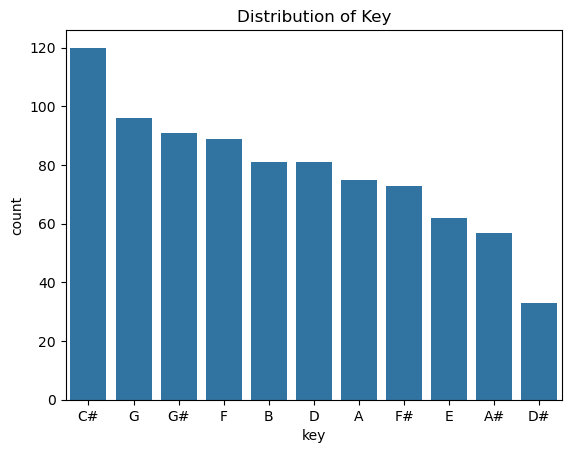

In [16]:
#cleaning df2
df2 = pd.read_csv('DSO528_project_spotify_2.csv')

# Check the value counts of 'key'
print(df2['key'].value_counts())

# Visualize the distribution of 'key'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df2, x='key', order=df2['key'].value_counts().index)
plt.title('Distribution of Key')
plt.show()

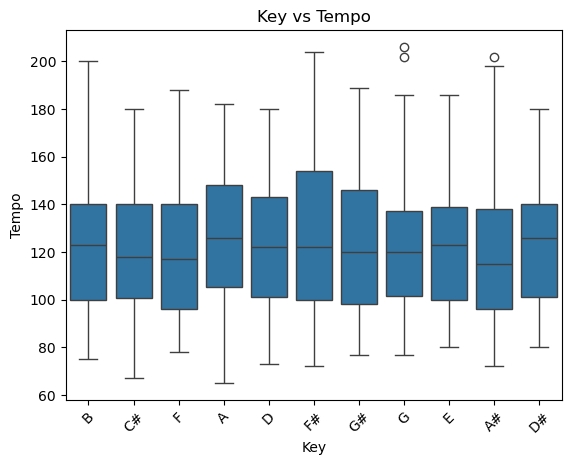

In [17]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to analyze 'key' vs 'tempo'
sns.boxplot(data=df2, x='key', y='tempo')
plt.title('Key vs Tempo')
plt.xlabel('Key')
plt.ylabel('Tempo')
plt.xticks(rotation=45)
plt.show()

key                                 A  A#   B   C#   D  D#    E   F   F#    G  \
artist(s)_name                                                                  
(G)I-DLE                          NaN NaN NaN  NaN NaN NaN  1.0 NaN  NaN  NaN   
21 Savage, Gunna                  NaN NaN NaN  1.0 NaN NaN  NaN NaN  NaN  NaN   
24kgoldn, Iann Dior               NaN NaN NaN  NaN NaN NaN  NaN NaN  NaN  1.0   
50 Cent                           NaN NaN NaN  NaN NaN NaN  NaN NaN  1.0  NaN   
A$AP Rocky, Metro Boomin, Roisee  1.0 NaN NaN  NaN NaN NaN  NaN NaN  NaN  NaN   

key                               G#  
artist(s)_name                        
(G)I-DLE                         NaN  
21 Savage, Gunna                 NaN  
24kgoldn, Iann Dior              NaN  
50 Cent                          NaN  
A$AP Rocky, Metro Boomin, Roisee NaN  


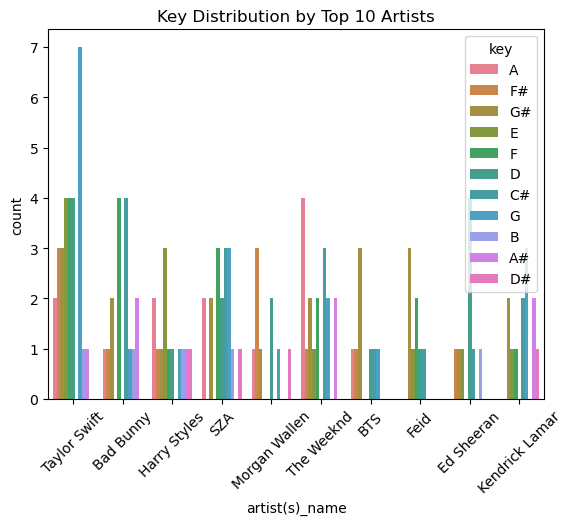

In [18]:
# Grouping by 'artist(s)_name' to see the distribution of 'key'
artist_key_distribution = df2.groupby('artist(s)_name')['key'].value_counts(normalize=True).unstack()

# Display the first few rows of the distribution
print(artist_key_distribution.head())

# Visualize the top artists with the highest number of songs and their key distributions
top_artists = df2['artist(s)_name'].value_counts().head(10).index
sns.countplot(data=df2[df2['artist(s)_name'].isin(top_artists)], x='artist(s)_name', hue='key')
plt.title('Key Distribution by Top 10 Artists')
plt.xticks(rotation=45)
plt.show()

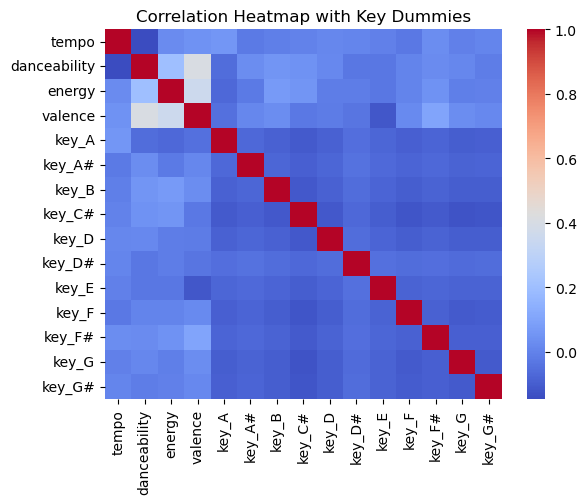

In [19]:
# Create dummy variables for 'key' to calculate correlation
key_dummies = pd.get_dummies(df2['key'], prefix='key')
df2_encoded = pd.concat([df2, key_dummies], axis=1)

# Correlation matrix for numerical features
numerical_features = ['tempo', 'danceability', 'energy', 'valence']
corr_matrix = df2_encoded[numerical_features + key_dummies.columns.tolist()].corr()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap with Key Dummies')
plt.show()

#### **Insights from the Charts:**

1. **Boxplot: Key vs. Tempo**
   - **Observation**:
     - Tempo distribution across keys is fairly consistent, with overlapping ranges for most keys.
     - There are no significant tempo variations or unique ranges tied to specific keys.
   - **Conclusion**:
     - Tempo does not appear to strongly influence or correlate with key.
     - Using tempo alone to impute missing keys may not add much value.

2. **Key Distribution by Top 10 Artists**
   - **Observation**:
     - Different artists show varying preferences for keys. For instance:
       - Taylor Swift has a notable concentration of songs in C#.
       - Other artists, like The Weeknd and Bad Bunny, have a more diverse distribution of keys.
   - **Conclusion**:
     - Artist-specific patterns exist, and grouping by `artist(s)_name` could be a useful approach for imputing missing key values.
     - Artists with a majority preference for a specific key (e.g., Taylor Swift with C#) provide context for likely imputation.

3. **Correlation Heatmap with Key Dummies**
   - **Observation**:
     - Weak correlations between key dummy variables and features like tempo, danceability, energy, and valence.
     - No single feature stands out as a strong predictor of key.
   - **Conclusion**:
     - Using numerical features for direct prediction of key is unlikely to yield meaningful results.


In [20]:
#filling missing vlues for key - df2
# Impute missing 'key' based on most common key for each artist
df2['key'] = df2.groupby('artist(s)_name')['key'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'C#'))

0


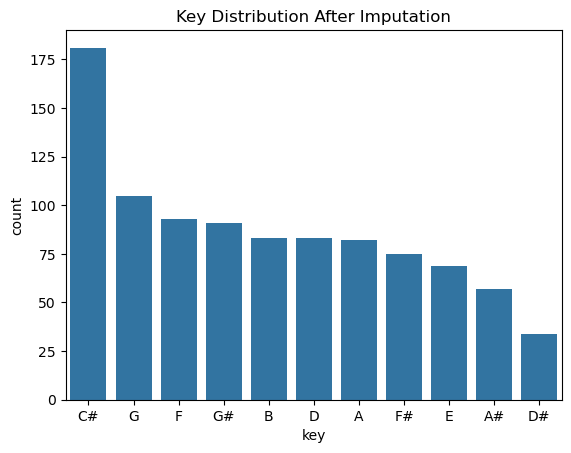

In [21]:
# Verify no missing values remain
print(df2['key'].isnull().sum())

# Recheck distribution
sns.countplot(data=df2, x='key', order=df2['key'].value_counts().index)
plt.title('Key Distribution After Imputation')
plt.show()

### Insights from the Imputation Result:

#### **Key Distribution After Imputation:**
- **Observation**:
  - The distribution of keys is similar to the original chart before handling missing values.
  - C# remains the most common key, reflecting its dominance both before and after imputation.
  - There is no disproportionate spike or anomaly in the distribution, confirming that the imputation method (artist-specific or mode fallback) has preserved the natural distribution.

#### **Imputation Quality:**
- **Observation**:
  - Missing values have been successfully filled while maintaining the integrity of the dataset.
  - The approach used for imputation is consistent with observed patterns, especially where artist-specific imputation was applied.


In [22]:
#ensuring no missing value in key
print(df2['key'].isnull().sum())

0


In [23]:
# Final checks for missing values
print("Final missing values in df1:")
print(df1_cleaned.isnull().sum())

print("\nFinal missing values in df2:")
print(df2.isnull().sum())

Final missing values in df1:
track_id            0
track_name          0
track_artist        0
popular             0
release_year        0
release_month       0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

Final missing values in df2:
track_name          0
artist(s)_name      0
artist_count        0
released_year       0
released_month      0
released_day        0
streams             0
tempo               0
key                 0
mode                0
danceability        0
valence             0
energy              0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
dtype: int64


### Merged Dataset Cleaning:

In [24]:
# Load the datasets
df1 = pd.read_csv("DSO528_project_spotify_1.csv")
df2 = pd.read_csv("DSO528_project_spotify_2.csv")

# Harmonize column names and create consistent features
df2.rename(columns={
    'released_year': 'release_year',
    'released_month': 'release_month',
    'released_day': 'release_day',
    'artist(s)_name': 'track_artist'
}, inplace=True)

# Add missing columns to align
df2['playlist_genre'] = None  # Add missing column
df2['popular'] = 1           # Assuming all songs in df2 are popular
df2['duration_ms'] = None    # Add placeholder for missing duration

# Add metadata column to distinguish sources
df1['source'] = 'pre_covid'
df2['source'] = 'post_covid'

# Concatenate the datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# 1. Handle missing 'track_name' and 'track_artist'
combined_df['track_name'] = combined_df['track_name'].fillna("Unknown Track")
combined_df['track_artist'] = combined_df['track_artist'].fillna("Unknown Artist")

# 2. Handle missing 'playlist_genre': Fill with "Unknown"
combined_df['playlist_genre'] = combined_df['playlist_genre'].fillna("Unknown")

# 3. Handle missing 'streams': Convert to numeric and fill with mean
combined_df['streams'] = pd.to_numeric(combined_df['streams'], errors='coerce')
combined_df['streams'] = combined_df['streams'].fillna(combined_df['streams'].mean())

# 4. Handle missing 'duration_ms': Fill with median from df1
median_duration = df1['duration_ms'].median(skipna=True)
combined_df['duration_ms'] = combined_df['duration_ms'].fillna(median_duration)

# 5. Handle missing 'key': Fill with "Unknown"
combined_df['key'] = combined_df['key'].fillna("Unknown")

# 6. Handle missing 'loudness': Fill with median from df1
median_loudness = df1['loudness'].median(skipna=True)
combined_df['loudness'] = combined_df['loudness'].fillna(median_loudness)

# 7. Handle missing 'artist_count': Fill with 1 (assume single artist by default)
combined_df['artist_count'] = combined_df['artist_count'].fillna(1)

# 8. Handle missing 'release_day': Fill with 15 as an approximation
combined_df['release_day'] = combined_df['release_day'].fillna(15)

# 9. Drop 'track_id' column (optional, if not required for analysis)
combined_df = combined_df.drop(columns=['track_id'], errors='ignore')

# Validation
print(f"Rows in df1_cleaned: {len(df1)}")
print(f"Rows in df2_cleaned: {len(df2)}")
print(f"Rows in combined dataset: {len(combined_df)}")

# Check missing values
missing_values = combined_df.isnull().sum()
print("\nMissing values per column after cleaning:")
print(missing_values)

Rows in df1_cleaned: 26266
Rows in df2_cleaned: 953
Rows in combined dataset: 27219

Missing values per column after cleaning:
track_name          0
track_artist        0
popular             0
release_year        0
release_month       0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
source              0
artist_count        0
release_day         0
streams             0
dtype: int64


# Phase 4: Feature Engineering

### Dataset 1:

In [40]:
# Check unique values in release_year and release_month
print(df1['release_year'].unique())
print(df1['release_month'].unique())

['2019' '1978' '2015' '2020' '2017' '2007' '2011' '2001' '2014' '2018'
 '2016' '2000' '2005' '1997' '1905' '2008' '2010' '2012' '1995' '2013'
 '2004' '1991' '2009' '1975' '1967' '2003' '1979' '2006' '1996' '1974'
 '1988' '1983' '1992' '1982' '1984' '1998' '1993' '1973' '1985' '2002'
 '1980' '1999' '1977' '1986' '1990' '1971' '1994' '1965' '1969' '1987'
 '1981' '1989' '1976' '1970' '1966' '1972' '#VALUE!' '1964' '1968' '1963'
 '1958' '1961' '1957']
['2' '8' '1' '6' '11' '4' '12' '10' '5' '9' '3' '7' '#VALUE!']


In [41]:
# Count rows with '#VALUE!' in release_year or release_month
invalid_count = df1[
    (df1['release_year'] == '#VALUE!') |
    (df1['release_month'] == '#VALUE!')
].shape[0]

print(f"Number of rows with '#VALUE!': {invalid_count}")

Number of rows with '#VALUE!': 24


In [42]:
# Replace '#VALUE!' with NaN
df1['release_year'] = pd.to_numeric(df1['release_year'], errors='coerce')
df1['release_month'] = pd.to_numeric(df1['release_month'], errors='coerce')

# Replace NaN with median values (without inplace)
df1['release_year'] = df1['release_year'].fillna(df1['release_year'].median())
df1['release_month'] = df1['release_month'].fillna(df1['release_month'].median())

# Verify replacement
print(df1[['release_year', 'release_month']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26266 entries, 0 to 26265
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   release_year   26266 non-null  float64
 1   release_month  26266 non-null  float64
dtypes: float64(2)
memory usage: 410.5 KB
None


In [43]:
# Convert to integers
df1['release_year'] = df1['release_year'].astype(int)
df1['release_month'] = df1['release_month'].astype(int)

# Verify the change
print(df1.dtypes)

track_id             object
track_name           object
track_artist         object
popular               int64
release_year          int64
release_month         int64
playlist_genre       object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
source               object
dtype: object


In [44]:
from datetime import datetime

# Combine year and month into a datetime
df1['release_date'] = pd.to_datetime(
    df1['release_year'].astype(str) + '-' +
    df1['release_month'].astype(str) + '-01',
    format='%Y-%m-%d'
)

# Verify the new column
print(df1[['release_year', 'release_month', 'release_date']].head())

   release_year  release_month release_date
0          2019              2   2019-02-01
1          1978              8   1978-08-01
2          2015              1   2015-01-01
3          2020              1   2020-01-01
4          2015              6   2015-06-01


In [45]:
#days_since_release
df1['days_since_release'] = (datetime.now() - df1['release_date']).dt.days

In [46]:
#release season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df1['release_season'] = df1['release_month'].apply(get_season)

In [47]:
#Log Transform Highly Skewed Features
#Apply log transformations to columns like duration_ms or loudness to handle skewness.
# Log transform duration_ms and loudness
df1['log_duration_ms'] = np.log1p(df1['duration_ms'])
df1['log_loudness'] = np.log1p(df1['loudness'].abs())  # Take absolute since loudness is negative

In [48]:
#Interaction Features
#Energy-Danceability Interaction
#Capture the relationship between energy and danceability.
df1['dance_energy'] = df1['danceability'] * df1['energy']

In [49]:
#Valence-Energy Ratio
#Create a ratio to measure how "positive" a high-energy song is.
df1['valence_energy_ratio'] = df1['valence'] / (df1['energy'] + 1e-6)

In [50]:
#Popularity Binning
#Group the popular column into bins like Low, Medium, High.

def categorize_popularity(popularity):
    if popularity <= 33:
        return 'Low'
    elif popularity <= 66:
        return 'Medium'
    else:
        return 'High'

df1['popularity_category'] = df1['popular'].apply(categorize_popularity)

In [51]:
#Tempo Binning
#Bin the tempo column into categories like Slow, Moderate, Fast.

def categorize_tempo(tempo):
    if tempo < 90:
        return 'Slow'
    elif tempo < 150:
        return 'Moderate'
    else:
        return 'Fast'

df1['tempo_category'] = df1['tempo'].apply(categorize_tempo)

In [52]:
#One-Hot Encoding of Categorical Features
#Encode mode and playlist_genre for machine learning.

# One-hot encoding
df1 = pd.get_dummies(df1, columns=['mode', 'playlist_genre'], drop_first=True)

In [53]:
# Define genre columns
genre_columns = [
    'playlist_genre_latin', 'playlist_genre_pop',
    'playlist_genre_r&b', 'playlist_genre_rap',
    'playlist_genre_rock'
]

# Combine one-hot encoded genres into a single column
def get_genre(row):
    for genre in genre_columns:
        if row[genre] == 1:
            return genre.split('_')[-1]
    return 'unknown'  # If no genre is marked

# Apply the function
df1['playlist_genre'] = df1.apply(get_genre, axis=1)

# Group by the new 'playlist_genre' column and calculate stats
genre_stats = df1.groupby('playlist_genre').agg({
    'energy': 'mean',
    'valence': 'mean',
    'danceability': 'mean'
}).reset_index()

print(genre_stats)

  playlist_genre    energy   valence  danceability
0          latin  0.707463  0.602992      0.712740
1            pop  0.701089  0.504239      0.638521
2            r&b  0.590068  0.529444      0.671822
3            rap  0.650222  0.504343      0.718721
4           rock  0.733665  0.536136      0.520082
5        unknown  0.801811  0.400249      0.654709


In [54]:
#Song Age Groups
#Group songs based on their age in days (days_since_release).

def categorize_song_age(days):
    if days < 365:
        return 'New'
    elif days < 1825:
        return 'Recent'
    else:
        return 'Old'

df1['song_age_category'] = df1['days_since_release'].apply(categorize_song_age)

In [55]:
#Remove Duplicates
df1 = df1.drop_duplicates()

In [56]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[['scaled_tempo', 'scaled_duration']] = scaler.fit_transform(df1[['tempo', 'duration_ms']])

In [57]:
# Summary statistics by genre
summary_stats = df1.groupby('playlist_genre').agg({
    'popular': ['mean', 'std'],
    'tempo': ['mean', 'std'],
    'danceability': ['mean', 'std']
})
print(summary_stats)

                 popular                 tempo            danceability  \
                    mean       std        mean        std         mean   
playlist_genre                                                           
latin           0.242280  0.428520  118.436033  28.495073     0.710654   
pop             0.273362  0.445739  120.999506  25.059562     0.637186   
r&b             0.197047  0.397816  114.603366  28.660363     0.671565   
rap             0.163942  0.370264  120.424351  31.699046     0.716661   
rock            0.192075  0.393986  125.236199  28.254232     0.519638   
unknown         0.103611  0.304789  125.633389  15.731799     0.656610   

                          
                     std  
playlist_genre            
latin           0.116587  
pop             0.128902  
r&b             0.138917  
rap             0.136763  
rock            0.140764  
unknown         0.123609  


In [58]:
# Binning tempo
bins = [0, 90, 120, 150, 250]  # Example bins
labels = ['Slow', 'Moderate', 'Fast', 'Very Fast']
df1['tempo_category'] = pd.cut(df1['tempo'], bins=bins, labels=labels, right=False)

In [59]:
df1.describe()

popular  release_year  release_month  danceability        energy  \
count  24630.000000  24630.000000   24630.000000  24630.000000  24630.000000   
mean       0.193220   2006.378238       6.415347      0.654835      0.696859   
min        0.000000   1905.000000       1.000000      0.000000      0.008140   
25%        0.000000   2008.000000       3.000000      0.563000      0.578000   
50%        0.000000   2016.000000       6.000000      0.672000      0.720000   
75%        0.000000   2019.000000      10.000000      0.761000      0.839000   
max        1.000000   2020.000000      12.000000      0.983000      1.000000   
std        0.394832     26.412778       3.623065      0.145516      0.181922   

                key      loudness   speechiness  acousticness  \
count  24630.000000  24630.000000  24630.000000  24630.000000   
mean       5.381486     -6.771935      0.107414      0.176958   
min        0.000000    -46.448000      0.000000      0.000000   
25%        2.000000     -8.232000      0.041025      0.015100   
50%        6.000000     -6.223500      0.062800      0.080800   
75%        9.000000     -4.681000      0.132000      0.259000   
max       11.000000      0.642000      0.918000      0.994000   
std        3.607806      3.009093      0.101402      0.221456   

       instrumentalness  ...         tempo    duration_ms  \
count      24630.000000  ...  24630.000000   24630.000000   
mean           0.086523  ...    120.892121  225846.314089   
min            0.000000  ...      0.000000    4000.000000   
25%            0.000000  ...     99.962000  187619.000000   
50%            0.000017  ...    121.948500  216274.000000   
75%            0.005108  ...    133.954000  253943.500000   
max            0.994000  ...    220.252000  517810.000000   
std            0.227069  ...     26.974097   60059.413671   

                        release_date  days_since_release log_duration_ms  \
count                          24630        24630.000000    24630.000000   
mean   2006-10-30 02:47:37.198538240         6616.883597       12.294136   
min              1905-05-01 00:00:00         1806.000000        8.294300   
25%              2008-04-01 00:00:00         2081.000000       12.142174   
50%              2016-08-01 00:00:00         3054.000000       12.284306   
75%              2019-04-01 00:00:00         6098.000000       12.444871   
max              2020-01-01 00:00:00        43689.000000       13.157366   
std                              NaN         9656.694549        0.259953   

       log_loudness  dance_energy  valence_energy_ratio  scaled_tempo  \
count  24630.000000  24630.000000          24630.000000  2.463000e+04   
mean       1.981332      0.454110              0.791403  3.826055e-16   
min        0.044973      0.000000              0.000000 -4.481877e+00   
25%        1.737127      0.358975              0.482500 -7.759498e-01   
50%        1.977340      0.463383              0.743194  3.916351e-02   
75%        2.222676      0.557720              1.007801  4.842477e-01   
max        3.859634      0.920088             62.891537  3.683604e+00   
std        0.372363      0.146299              0.708534  1.000020e+00   

       scaled_duration  
count     2.463000e+04  
mean      8.636571e-17  
min      -3.693856e+00  
25%      -6.365046e-01  
50%      -1.593840e-01  
75%       4.678327e-01  
max       4.861346e+00  
std       1.000020e+00  

[8 rows x 22 columns]

### Key Observations for `df1` After Feature Engineering:

#### Release Year and Month:
- **Median Release Year**: 2016, with values ranging from **1905** to **2020**.
  - The presence of very old years (e.g., 1905) might indicate historical data or errors requiring further inspection.
- **Release Month**: Values range from **1 to 12**, with no apparent issues.

#### Popularity:
- **Binary Feature**: Indicates whether a song is popular (`0` or `1`).
  - The mean value is **0.19**, indicating that the majority of tracks are not marked as popular.

#### Audio Features:
- **Danceability, Energy, Valence**:
  - These features are well-distributed and range between **0 and 1**, typical of Spotify's audio features.
- **Instrumentalness and Speechiness**:
  - Highly skewed, with low median values, suggesting that most tracks are not heavily instrumental or speech-heavy.
- **Loudness and Tempo**:
  - Wide ranges observed, suggesting potential need for normalization or scaling.

#### Derived Features:
- **Existing Derived Features**:
  - `log_duration_ms` and `log_loudness` exist and are helpful for reducing skew in raw features.
- **Newly Engineered Features**:
  - **`dance_energy`**: Interaction term combining danceability and energy.
  - **`valence_energy_ratio`**: Captures the balance between valence (positivity) and energy.
  - **`scaled_tempo`**: Normalized version of tempo for consistent scaling.
  - **`scaled_duration`**: Normalized version of duration for consistent scaling.

#### Days Since Release:
- Represents how recent a track's release is.
  - Maximum value is **43,675 days**, corresponding to the year **1905**.
  - This extreme value may require **capping** or **binning** to avoid undue influence in analyses.

### Dataset 2:

In [62]:
#creating release date column
# Explicitly specify the column order for year, month, and day
df2 = pd.read_csv('DSO528_project_spotify_2.csv')
df2['release_date'] = pd.to_datetime(
    df2[['released_year', 'released_month', 'released_day']].rename(
        columns={'released_year': 'year', 'released_month': 'month', 'released_day': 'day'}
    )
)

In [63]:
print(df2[['released_year', 'released_month', 'released_day', 'release_date']].head())

   released_year  released_month  released_day release_date
0           2023               7            14   2023-07-14
1           2023               3            23   2023-03-23
2           2023               6            30   2023-06-30
3           2019               8            23   2019-08-23
4           2023               5            18   2023-05-18


In [64]:
#days since release column created
from datetime import datetime
df2['days_since_release'] = (datetime.now() - df2['release_date']).dt.days

In [65]:
#season of release
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df2['release_season'] = df2['release_date'].dt.month.apply(get_season)

In [66]:
#age of song
def categorize_age(days):
    if days <= 365:
        return 'New'
    elif days <= 1095:  # 3 years
        return 'Recent'
    else:
        return 'Old'

df2['song_age'] = df2['days_since_release'].apply(categorize_age)

In [67]:
#there is one value in this column which is string and not numeric
print(df2['streams'].head())
print(df2['streams'].unique())  # Check for unexpected characters or patterns

0    141381703
1    133716286
2    140003974
3    800840817
4    303236322
Name: streams, dtype: object
['141381703' '133716286' '140003974' '800840817' '303236322' '183706234'
 '725980112' '58149378' '95217315' '553634067' '505671438' '58255150'
 '1316855716' '387570742' '2513188493' '1163093654' '496795686' '30546883'
 '335222234' '363369738' '86444842' '52135248' '1297026226' '200647221'
 '115364561' '78300654' '899183384' '61245289' '429829812' '127408954'
 '22581161' '52294266' '843957510' '999748277' '618990393' '123122413'
 '188933502' '1355959075' '786181836' '176553476' '354495408' '2808096550'
 '1109433169' '1047101291' '65156199' '570515054' '1085685420'
 '1647990401' '2565529693' '518745108' '107753850' '177740666' '153372011'
 '57876440' '1813673666' '3703895074' '256483385' '1214083358' '16011326'
 '812019557' '111947664' '156338624' '720434240' '357925728' '674072710'
 '1755214421' '404562836' '373199958' '14780425' '39578178' '54266102'
 '2557975762' '751134527' '228277

In [68]:
#Now Replace problematic 'streams' value with median
median_streams = pd.to_numeric(df2['streams'], errors='coerce').median()

# Manually fix the specific row
df2.loc[df2['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3', 'streams'] = median_streams

In [69]:
#Convert and Apply Log Transformation
#After handling the row, ensure the streams column is numeric and proceed with the log transformation:

# Convert streams to numeric
df2['streams'] = pd.to_numeric(df2['streams'], errors='coerce')

# Apply log transformation
df2['log_streams'] = np.log1p(df2['streams'])

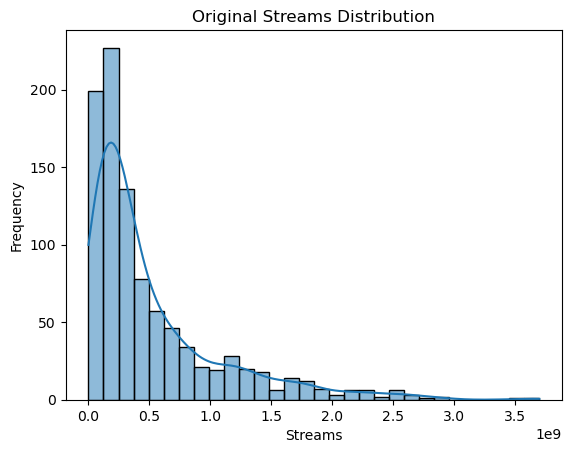

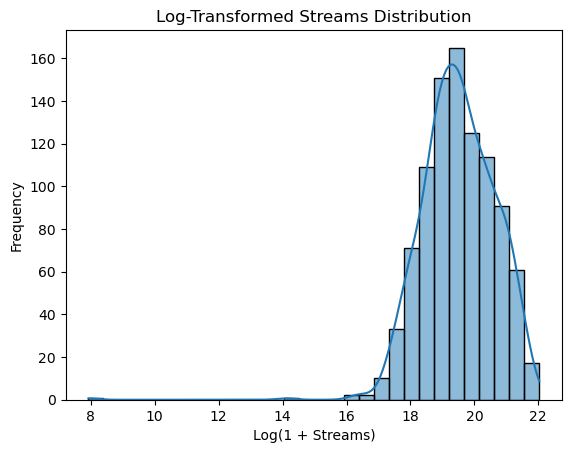

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original streams distribution
sns.histplot(df2['streams'], bins=30, kde=True)
plt.title('Original Streams Distribution')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

# Log-transformed streams distribution
sns.histplot(df2['log_streams'], bins=30, kde=True)
plt.title('Log-Transformed Streams Distribution')
plt.xlabel('Log(1 + Streams)')
plt.ylabel('Frequency')
plt.show()

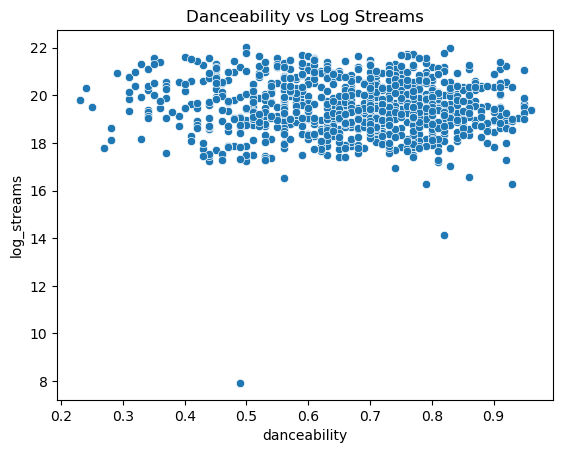

In [71]:
sns.scatterplot(data=df2, x='danceability', y='log_streams')
plt.title('Danceability vs Log Streams')
plt.show()

Audio Feature Interactions
Combine existing numerical features like danceability, energy, valence, etc., to capture interactions between them. For example:

Dance-Energy Interaction: Multiply danceability and energy to understand how upbeat and energetic the song is.
Valence-Energy Interaction: Combine valence (positivity) and energy to measure "positive energy" of the song.

In [73]:
# Create interaction features
df2['dance_energy'] = df2['danceability'] * df2['energy']
df2['positive_vibe'] = df2['valence'] * df2['energy']

# Preview the new columns
print(df2[['dance_energy', 'positive_vibe']].head())

   dance_energy  positive_vibe
0        0.6640         0.7387
1        0.5254         0.4514
2        0.2703         0.1696
3        0.3960         0.4176
4        0.5200         0.1840


Binning Continuous Variables
Convert continuous features (like tempo, streams, or duration_ms) into bins for better interpretability:

Tempo Bins: Categorize tempo into Slow, Moderate, and Fast.
Streams Categories: Divide streams into Low, Medium, and High.

In [75]:
# Tempo Bins
df2['tempo_category'] = pd.cut(df2['tempo'], bins=[0, 100, 140, 200], labels=['Slow', 'Moderate', 'Fast'])

# Streams Bins
def categorize_streams(streams):
    if streams < 100000:
        return 'Low'
    elif streams < 1000000:
        return 'Medium'
    else:
        return 'High'

df2['stream_category'] = df2['streams'].apply(categorize_streams)

# Preview the binned columns
print(df2[['tempo', 'tempo_category', 'streams', 'stream_category']].head())

   tempo tempo_category      streams stream_category
0    125       Moderate  141381703.0            High
1     92           Slow  133716286.0            High
2    138       Moderate  140003974.0            High
3    170           Fast  800840817.0            High
4    144           Fast  303236322.0            High


Aggregations by Artist
Add aggregated features for artists based on their overall popularity or other metrics:

Artist Song Count: Number of songs per artist in the dataset.
Artist Total Streams: Total streams for all songs by each artist.

In [77]:
# Artist Song Count
df2['artist_song_count'] = df2['artist(s)_name'].map(df2['artist(s)_name'].value_counts())

# Artist Total Streams
artist_total_streams = df2.groupby('artist(s)_name')['streams'].sum().to_dict()
df2['artist_total_streams'] = df2['artist(s)_name'].map(artist_total_streams)

# Preview the new columns
print(df2[['artist(s)_name', 'artist_song_count', 'artist_total_streams']].head())

     artist(s)_name  artist_song_count  artist_total_streams
0  Latto, Jung Kook                  1          1.413817e+08
1       Myke Towers                  1          1.337163e+08
2    Olivia Rodrigo                  7          7.442149e+09
3      Taylor Swift                 34          1.405366e+10
4         Bad Bunny                 19          9.997800e+09


4. Temporal Trends
Capture the impact of time-based features:

Yearly Averages: Aggregate features (e.g., streams, danceability) by released_year to understand trends.
Is Recent: Flag songs released within the last 1 year as Recent.

In [79]:
# Yearly Averages
yearly_avg = df2.groupby('released_year')[['streams', 'danceability']].mean().reset_index()
yearly_avg.rename(columns={'streams': 'yearly_avg_streams', 'danceability': 'yearly_avg_danceability'}, inplace=True)
df2 = df2.merge(yearly_avg, on='released_year', how='left')

# Is Recent
df2['is_recent'] = df2['days_since_release'] <= 365

# Preview the new columns
print(df2[['released_year', 'yearly_avg_streams', 'is_recent']].head())

   released_year  yearly_avg_streams  is_recent
0           2023        1.474771e+08      False
1           2023        1.474771e+08      False
2           2023        1.474771e+08      False
3           2019        1.051970e+09      False
4           2023        1.474771e+08      False


5. Statistical Variability
Calculate variability within features (e.g., tempo, danceability) to understand consistency:

Standard Deviation by Artist: Compute the standard deviation of features like danceability for each artist.
Range of Features: Calculate the range (max - min) of key features like tempo.

In [81]:
# Standard Deviation by Artist
artist_std_danceability = df2.groupby('artist(s)_name')['danceability'].std().to_dict()
df2['artist_danceability_std'] = df2['artist(s)_name'].map(artist_std_danceability)

# Range of Tempo
df2['tempo_range'] = df2['tempo'].max() - df2['tempo'].min()

# Preview the new columns
print(df2[['artist(s)_name', 'artist_danceability_std', 'tempo_range']].head())

     artist(s)_name  artist_danceability_std  tempo_range
0  Latto, Jung Kook                      NaN          141
1       Myke Towers                      NaN          141
2    Olivia Rodrigo                 0.112800          141
3      Taylor Swift                 0.110263          141
4         Bad Bunny                 0.114371          141


6. Encoding Categorical Variables
Convert categorical variables into numerical formats for modeling:

One-Hot Encoding: For variables like release_season or tempo_category.
Label Encoding: For ordinal features like stream_category.

In [83]:
# One-Hot Encoding
df2 = pd.get_dummies(df2, columns=['release_season', 'tempo_category'], drop_first=True)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['stream_category_encoded'] = le.fit_transform(df2['stream_category'])

# Preview the new columns
print(df2.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day      streams  tempo key   mode  \
0           2023               7            14  141381703.0    125   B  Major   
1           2023               3            23  133716286.0     92  C#  Major   
2           2023               6            30  140003974.0    138   F  Major   
3           2019               8            23  800840817.0    170   A  Major   
4           2023               5            18  303236322.0    144   A  Minor   

   ...  yearly_avg_danceability  is_recent  artist_danceability_std 

In [84]:
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   track_name               953 non-null    object        
 1   artist(s)_name           953 non-null    object        
 2   artist_count             953 non-null    int64         
 3   released_year            953 non-null    int64         
 4   released_month           953 non-null    int64         
 5   released_day             953 non-null    int64         
 6   streams                  953 non-null    float64       
 7   tempo                    953 non-null    int64         
 8   key                      858 non-null    object        
 9   mode                     953 non-null    object        
 10  danceability             953 non-null    float64       
 11  valence                  953 non-null    float64       
 12  energy                   953 non-nul

In [85]:
print(df2.describe().T)

                         count                           mean  \
artist_count             953.0                       1.556139   
released_year            953.0                    2018.238195   
released_month           953.0                       6.033578   
released_day             953.0                      13.930745   
streams                  953.0                513902790.61595   
tempo                    953.0                     122.540399   
danceability             953.0                       0.669696   
valence                  953.0                       0.514313   
energy                   953.0                       0.642791   
acousticness             953.0                       0.270577   
instrumentalness         953.0                       0.015813   
liveness                 953.0                        0.18213   
speechiness              953.0                       0.101312   
release_date               953  2018-09-10 05:09:45.519412480   
days_since_release       

### Observations from the Summary:

#### **Numerical Features:**
- **Streams**:
  - Large variability with values ranging from 2,762 to over 3.7 billion.
  - High standard deviation emphasizes the importance of applying log transformation (`log_streams`).
- **Danceability, Valence, Energy**:
  - These features are tightly distributed with reasonable ranges.
  - Interactions (e.g., `dance_energy`, `positive_vibe`) capture useful dynamics for predictive modeling.
- **Tempo**:
  - Categorized into bins like Slow, Moderate, and Fast.
  - Maximum tempo is 206 BPM, typical for fast-paced music.

#### **Categorical Features:**
- **Stream Category**:
  - Encoded as `stream_category_encoded` and binned into Low, Medium, and High categories.
- **Release Season**:
  - Encoded with dummy variables (`release_season_*`).
- **Tempo Category**:
  - Encoded with dummy variables (`tempo_category_*`).

#### **Temporal Features:**
- **Days Since Release**:
  - Ranges from 502 days to over 34,664 days due to older tracks (oldest track dates back to 1930).
- **Song Age**:
  - Added a categorical perspective with labels (New, Recent, Old).

#### **Aggregated Features:**
- **Artist Song Count**:
  - Captures the number of tracks an artist has in the dataset (1–34).
- **Artist Total Streams**:
  - Ranges from 2,762 to 14.18 billion, reflecting high variability and potential influence on artist-level trends.
- **Yearly Averages**:
  - Features like `yearly_avg_streams` and `yearly_avg_danceability` align with the song's release year.

#### **Statistical Variability:**
- **Artist Danceability Std**:
  - Highlights the consistency in danceability for artists with multiple tracks.
  - `NaN` values are observed for artists with only one track in the dataset.


# Phase 5: Exploratory Data Analysis (EDA)

### Dataset 1:

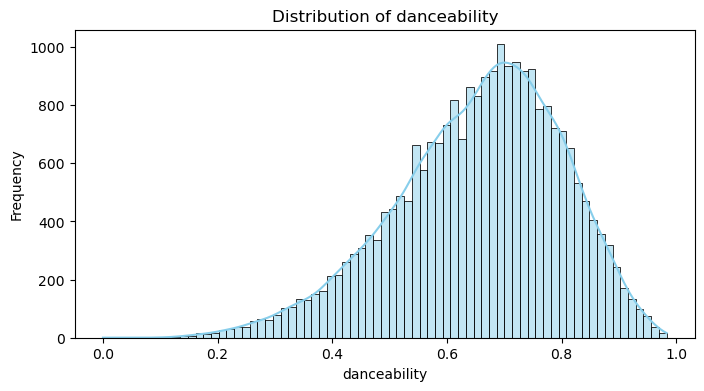

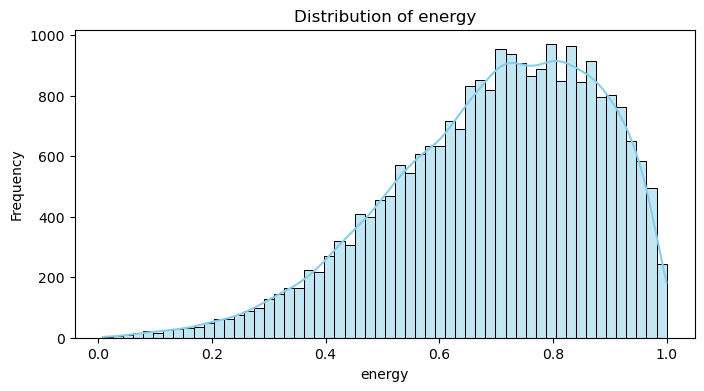

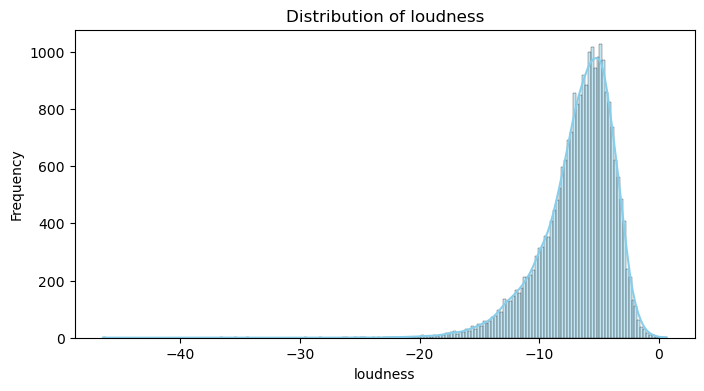

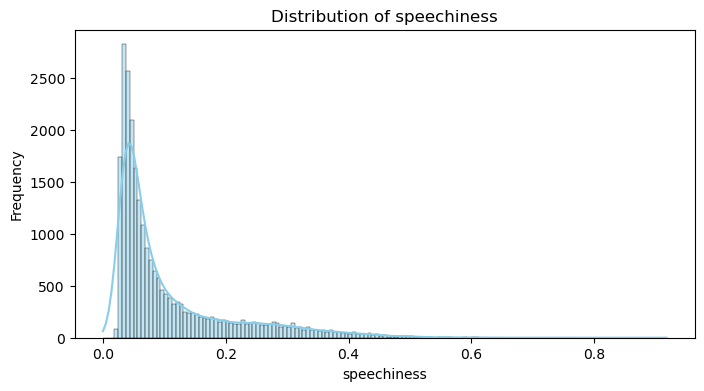

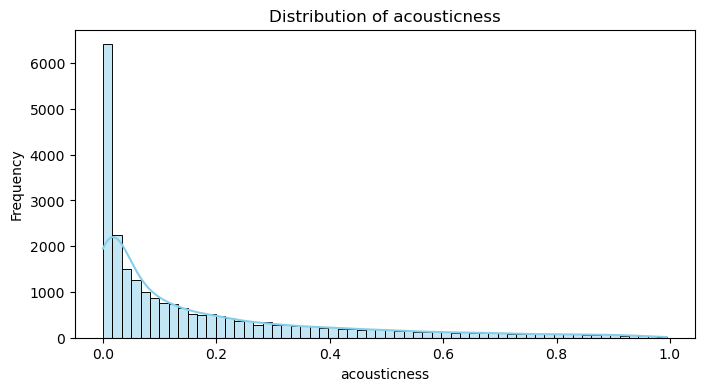

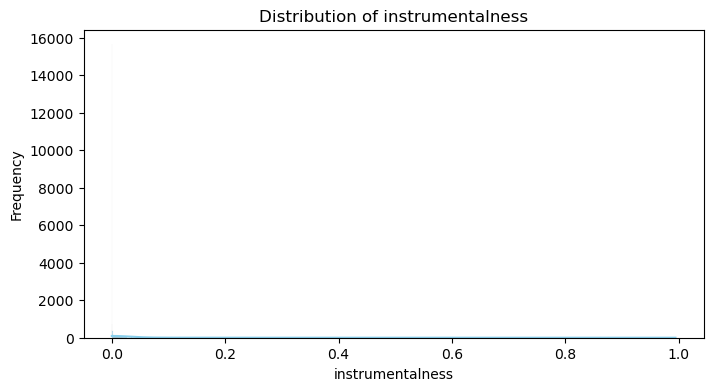

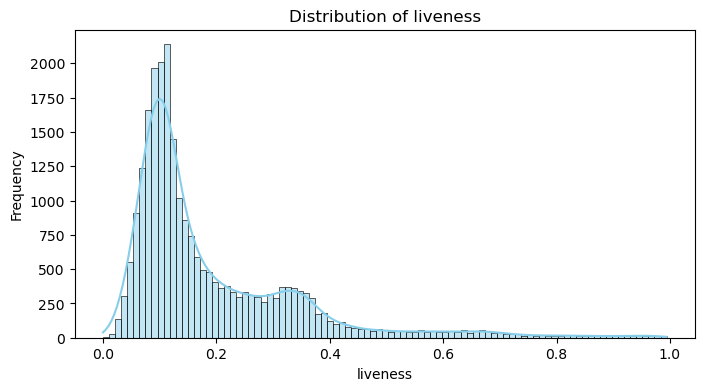

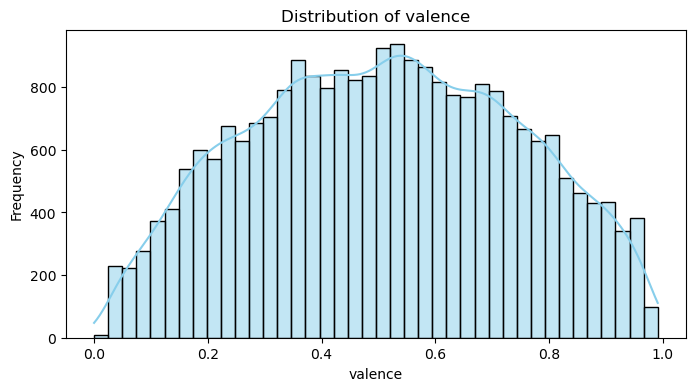

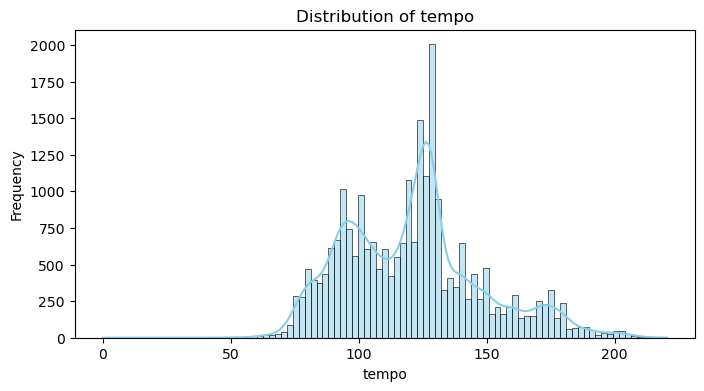

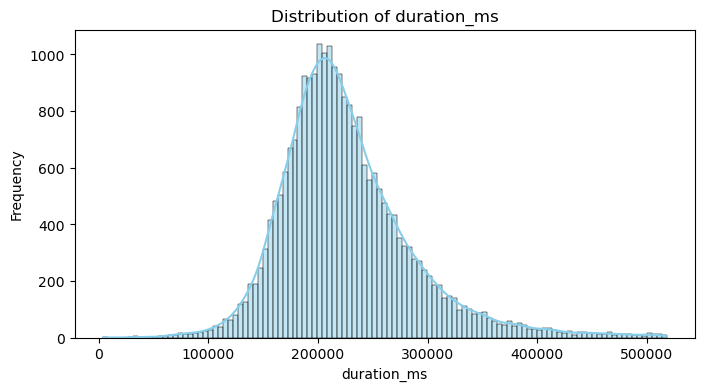

In [89]:
numeric_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

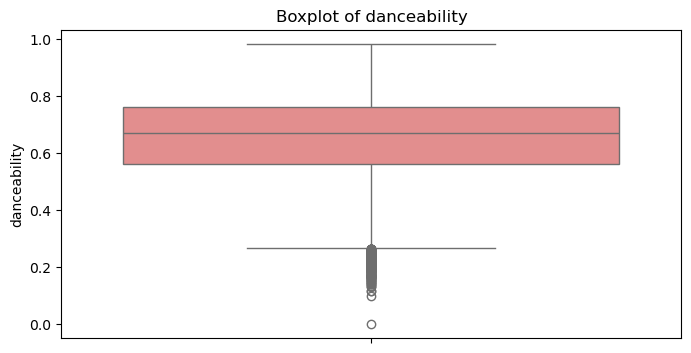

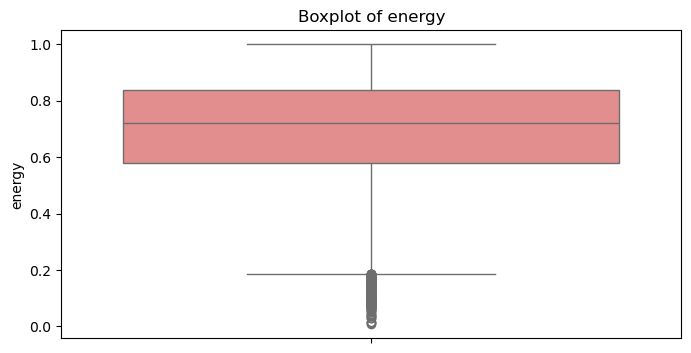

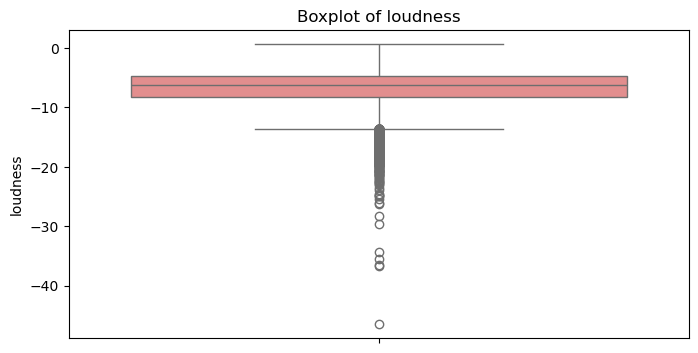

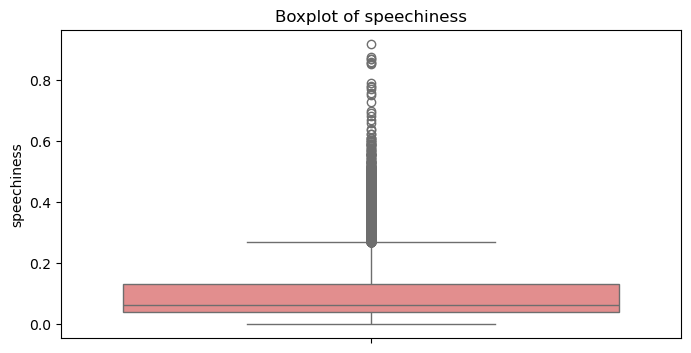

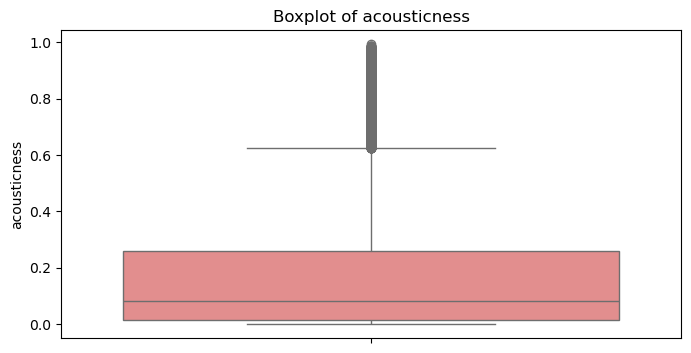

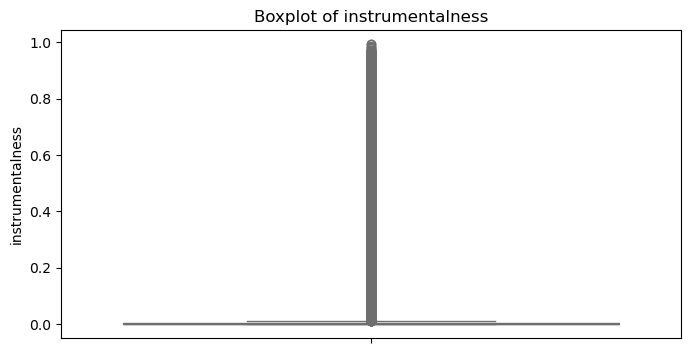

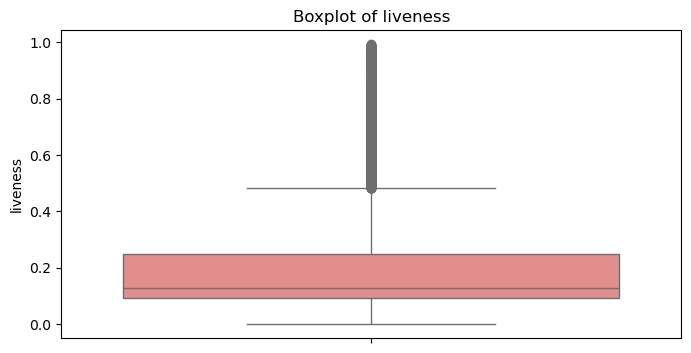

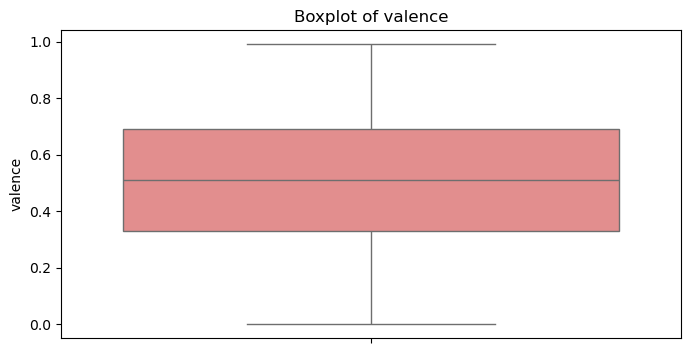

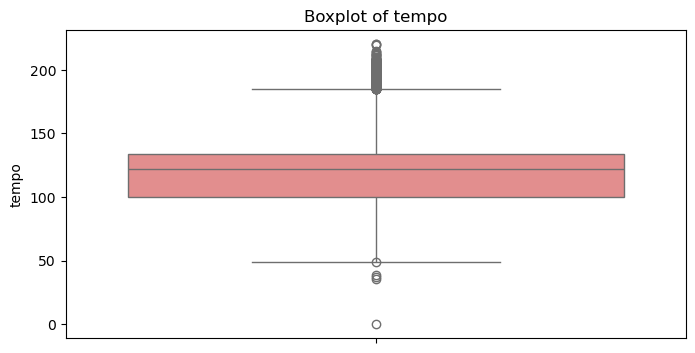

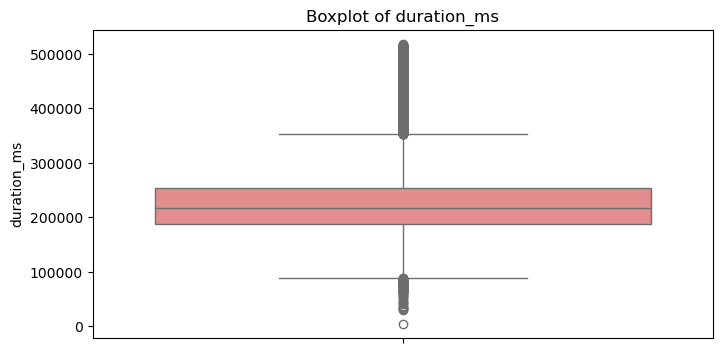

In [90]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, y=col, color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

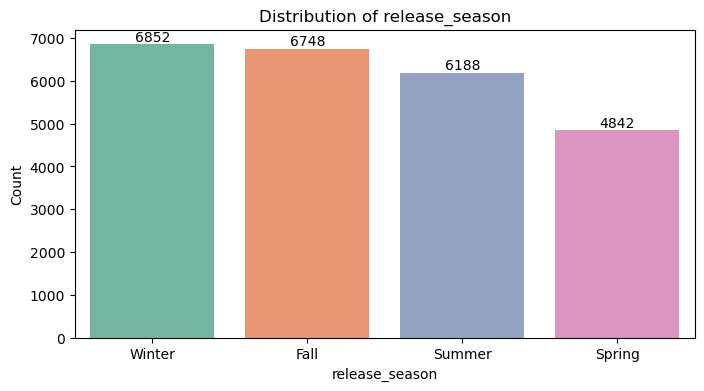

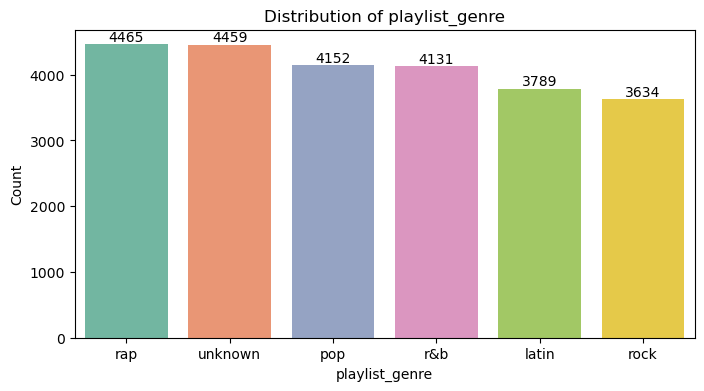

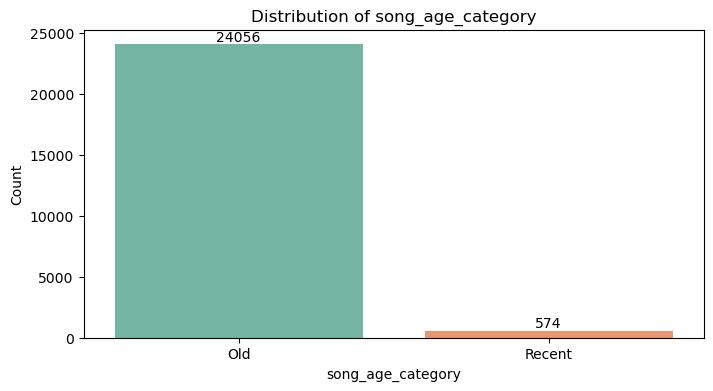

In [91]:
import warnings
warnings.filterwarnings("ignore")
categorical_cols = ['release_season', 'playlist_genre', 'song_age_category']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        x=col,
        data=df1,
        palette='Set2',
        order=df1[col].value_counts().index,
        hue=None
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add numbers on top of the bars
    for bar in ax.patches:
        ax.annotate(
            format(bar.get_height(), '.0f'),  # Format number
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.show()

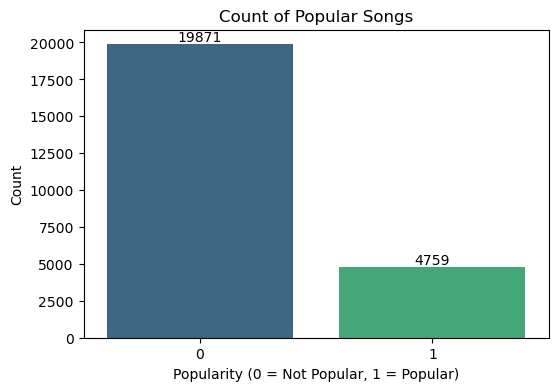

In [92]:
# Count of Popular Songs
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='popular', data=df1, palette='viridis')
plt.title('Count of Popular Songs')
plt.xlabel('Popularity (0 = Not Popular, 1 = Popular)')
plt.ylabel('Count')

# Add numbers on top of the bars
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),  # Format number
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

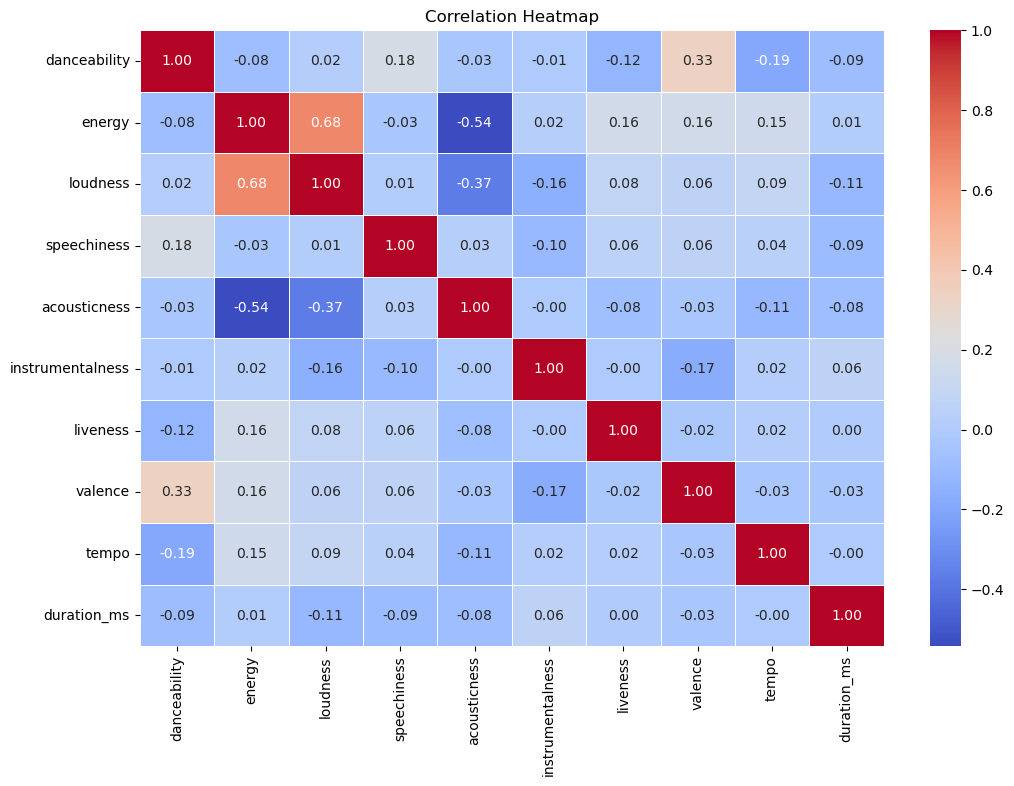

In [93]:
plt.figure(figsize=(12, 8))
correlation_matrix = df1[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

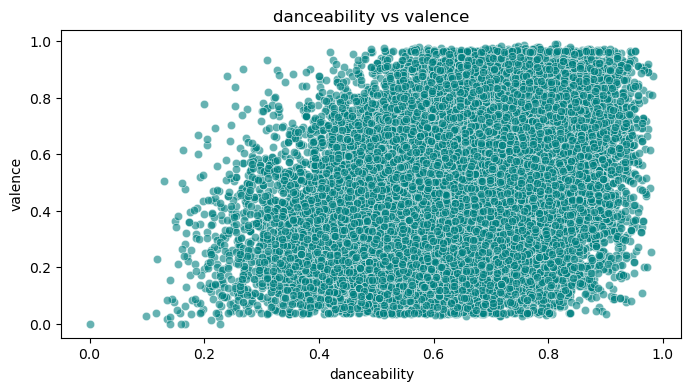

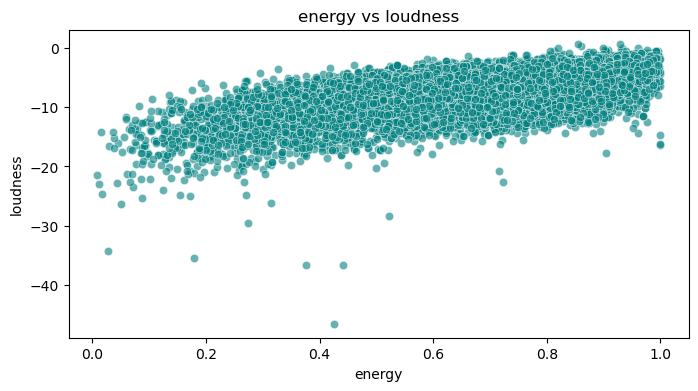

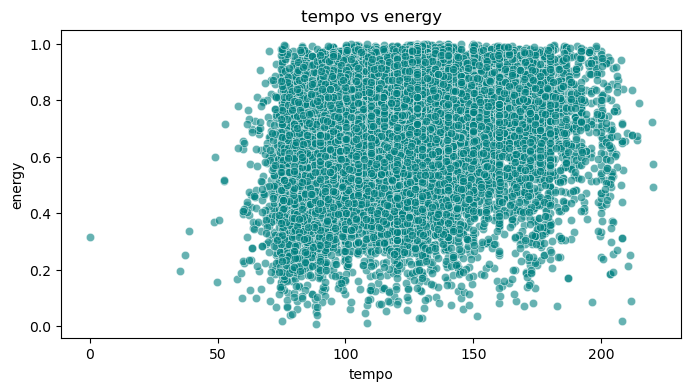

In [94]:
scatter_pairs = [
    ('danceability', 'valence'),
    ('energy', 'loudness'),
    ('tempo', 'energy')
]

for x, y in scatter_pairs:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df1, x=x, y=y, color='teal', alpha=0.6)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

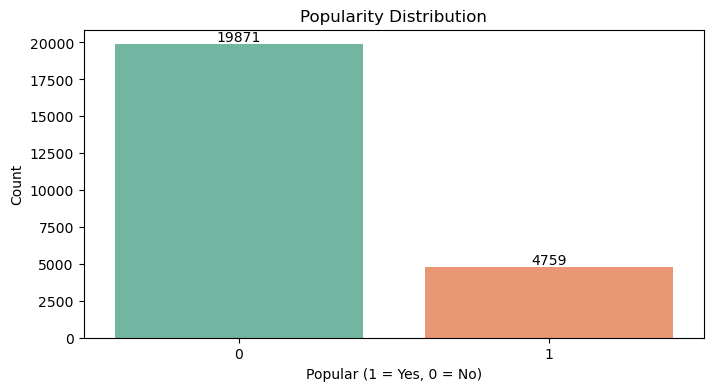

In [95]:
# Popularity Distribution with numbers on bars
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df1, x='popular', palette='Set2')
plt.title('Popularity Distribution')
plt.xlabel('Popular (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Add numbers on top of the bars
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),  # Format the height of the bar
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position the text
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

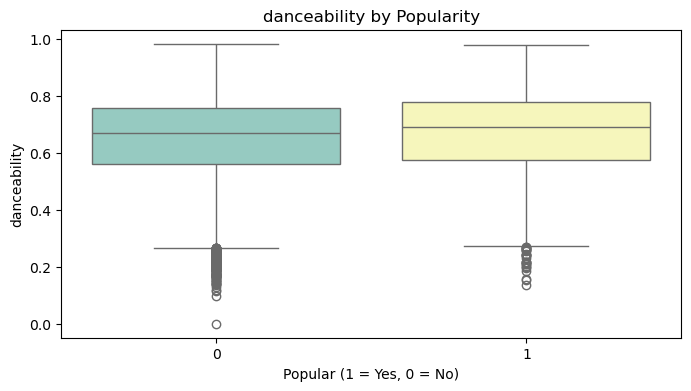

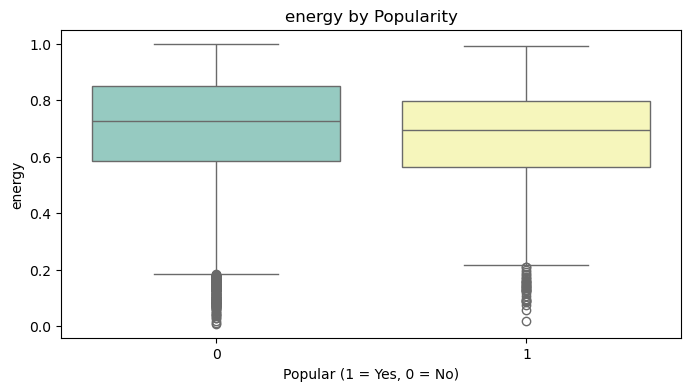

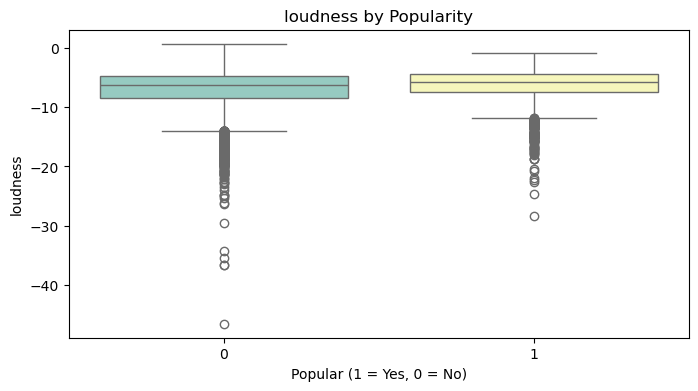

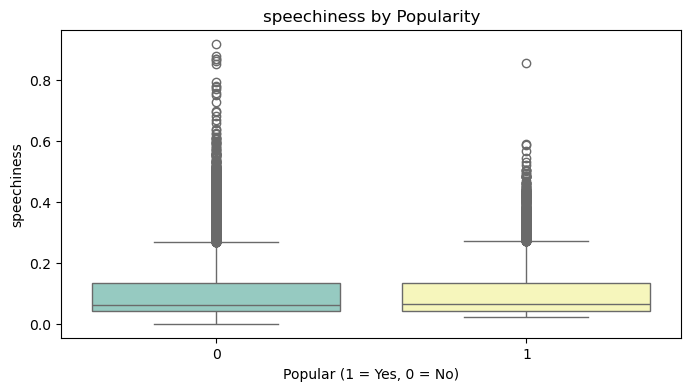

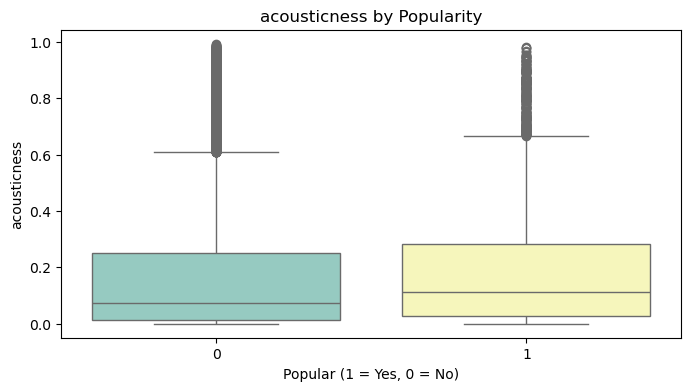

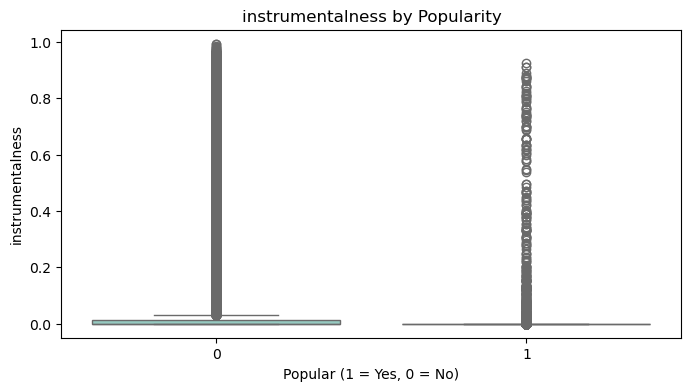

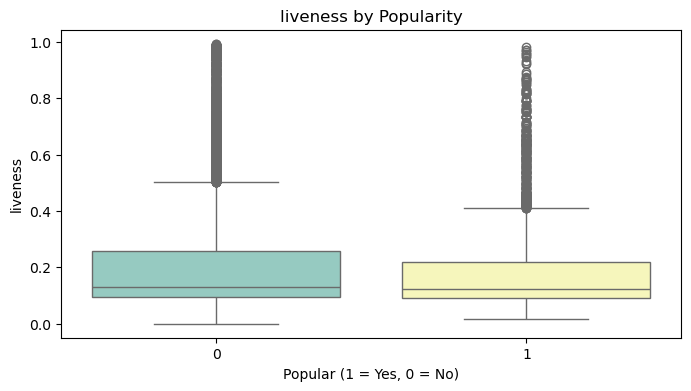

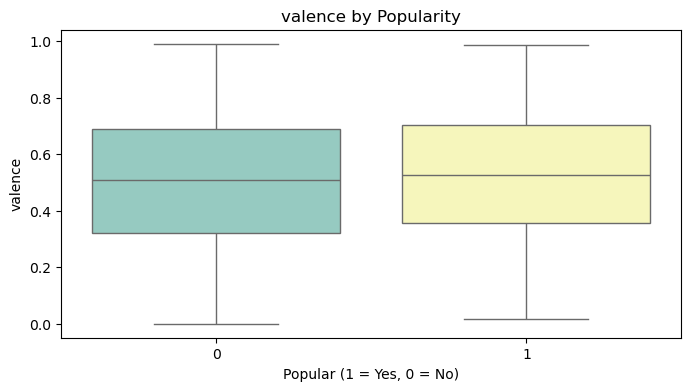

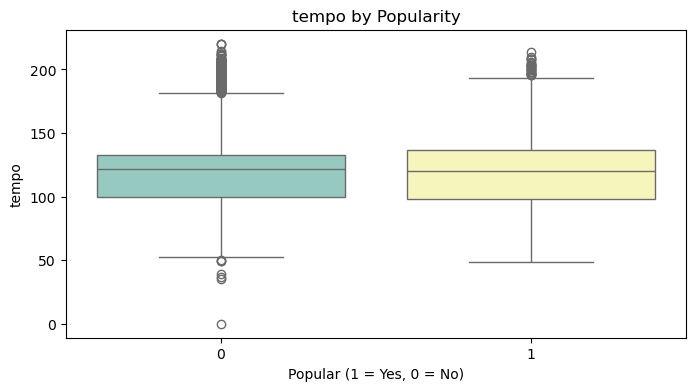

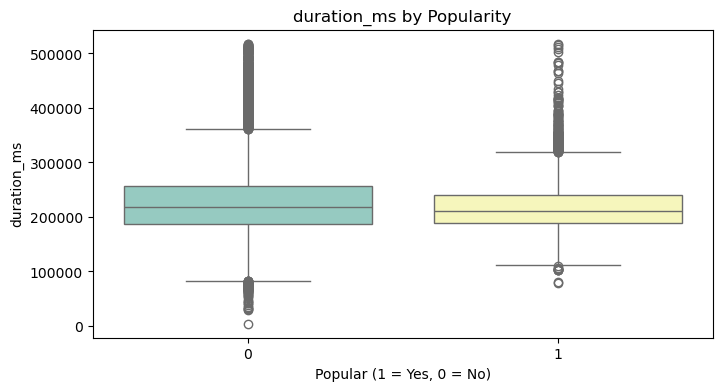

In [96]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df1, x='popular', y=col, palette='Set3')
    plt.title(f'{col} by Popularity')
    plt.xlabel('Popular (1 = Yes, 0 = No)')
    plt.ylabel(col)
    plt.show()

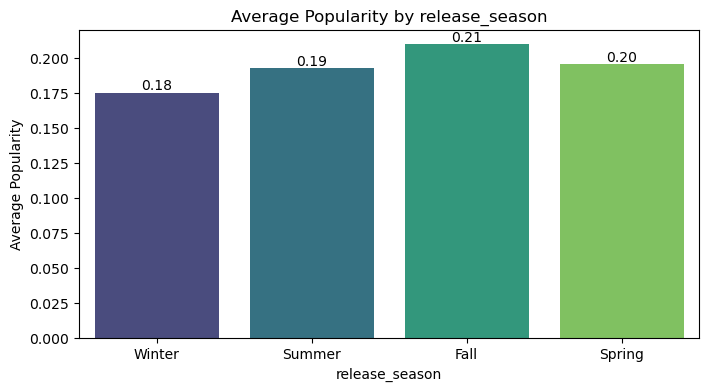

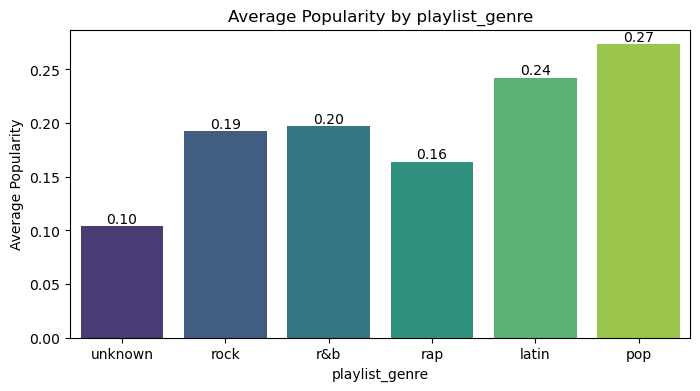

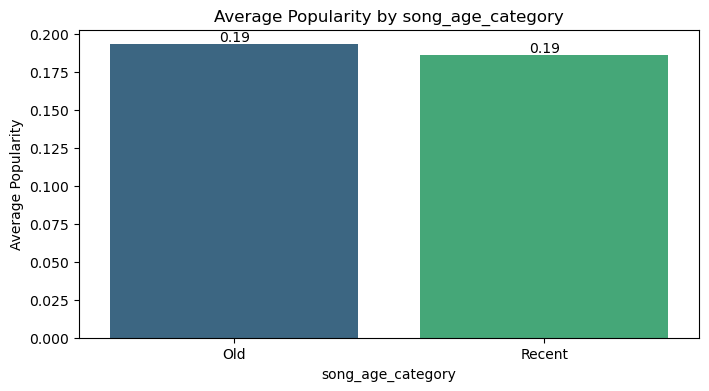

In [97]:
categorical_cols = ['release_season', 'playlist_genre', 'song_age_category']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=df1, x=col, y='popular', palette='viridis', ci=None)
    plt.title(f'Average Popularity by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Popularity')
    plt.xticks(rotation=0)

    # Add numbers on top of the bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            format(height, '.2f'),  # Format the height (average value) to 2 decimal places
            (bar.get_x() + bar.get_width() / 2, height),  # Position the text
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.show()

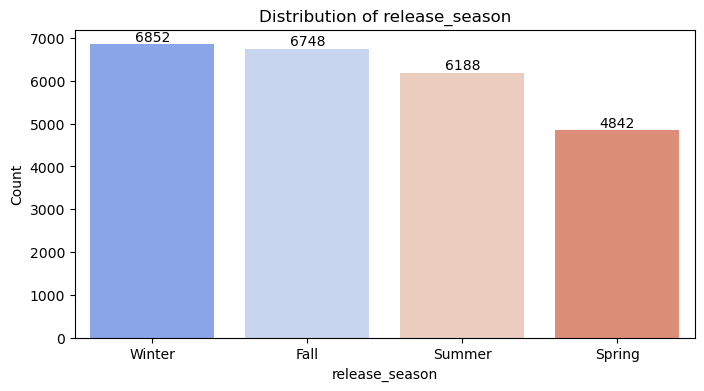

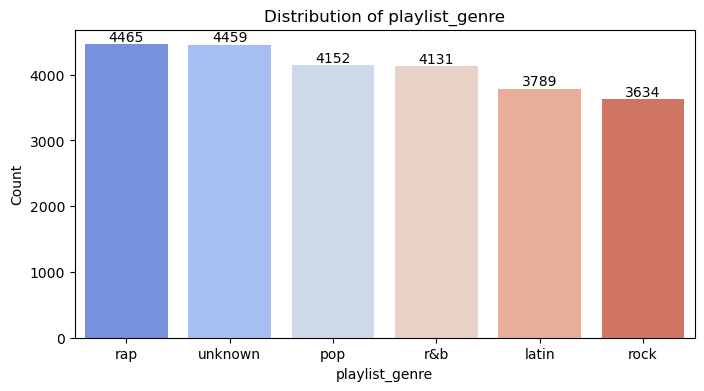

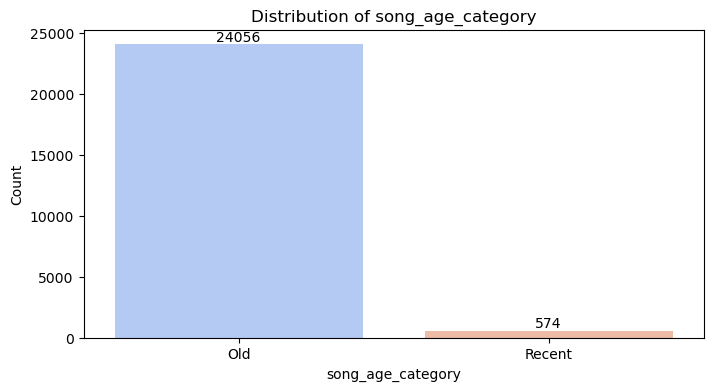

In [98]:
categorical_cols = ['release_season', 'playlist_genre', 'song_age_category']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df1, palette='coolwarm', order=df1[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add numbers on top of the bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f'{int(height)}',  # Display the count as an integer
            (bar.get_x() + bar.get_width() / 2, height),  # Position the text
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.show()

### Key Insights from EDA of Dataset 1:

### 1. Univariate Analysis:

#### Danceability:
- The distribution is slightly right-skewed, with most tracks having **danceability scores around 0.6 to 0.8**.
- High danceability is common in the dataset, reflecting a focus on tracks suitable for dancing.

#### Energy:
- The distribution peaks at **0.8**, indicating a preference for high-energy tracks.
- Tracks with very low energy are less frequent.

#### Loudness:
- Tracks are predominantly in the range of **-20 dB to 0 dB**, with most clustering around **-10 dB**.
- A few quieter tracks exist as outliers.

#### Valence:
- Valence shows a balanced distribution, with values concentrated around **0.5**.
- This reflects a mix of both happy and neutral emotional tones in the tracks.

#### Acousticness:
- Skewed heavily towards **0**, indicating most tracks lack significant acoustic elements.
- Reflects a focus on electronic or non-acoustic music.

#### Instrumentalness:
- Majority of the tracks have **instrumentalness close to zero**, indicating they are primarily vocal songs.

#### Speechiness:
- Most tracks have **speechiness scores below 0.1**, suggesting limited spoken word content.

#### Tempo:
- Shows a bimodal distribution with peaks around **100 BPM and 140 BPM**, aligning with common tempos for pop and dance music.

#### Duration (ms):
- Tracks typically range between **2 to 4 minutes**, consistent with standard lengths for popular songs.

### 2. Categorical Analysis:

#### Release Season:
- Tracks are evenly distributed across seasons:
  - **Winter and Fall** have slightly more tracks, with **Spring** having the least.
- No significant trends in track attributes vary strongly by season.

#### Playlist Genre:
- **Rap** and **Unknown** genres are the most frequent, followed closely by **Pop** and **R&B**.
- **Latin and Rock** genres are less represented compared to others.

#### Song Age Category:
- The dataset is dominated by **Old songs (96%)**, with **Recent songs (4%)** being a minority.

#### Popularity:
- About **20% of tracks are classified as popular**, indicating most songs in the dataset do not reach high popularity levels.

### 3. Bivariate Analysis:

#### Correlation Matrix:
- Overall weak correlations between features:
  - **Energy and Loudness**: Strong positive correlation (+0.68), as louder tracks tend to have higher energy.
  - **Danceability and Valence**: Moderate positive correlation (+0.33), indicating that happier songs are generally more danceable.
  - **Acousticness and Energy**: Negative correlation (-0.54), showing acoustic tracks are less energetic.

#### Popular Tracks:
- **Popular tracks** have higher:
  - **Danceability**: Higher median values compared to non-popular tracks.
  - **Energy and Loudness**: Popular songs are typically louder and more energetic.
- Other features like **acousticness, instrumentalness, and speechiness** show no significant difference between popular and non-popular songs.

#### Boxplots by Popularity:
- Popular tracks consistently outperform in features like **energy, loudness, and danceability**, but no dramatic differences are seen in valence or tempo.

### 4. Summary of Popularity Trends:

#### Average Popularity by Season:
- Tracks released in **Fall (21%) and Spring (20%)** have slightly higher average popularity.
- **Winter (18%)** has the lowest average popularity.

#### Average Popularity by Playlist Genre:
- **Pop (27%)** and **Latin (24%)** genres are the most popular on average.
- **Rap (16%)** and **Unknown (10%)** genres are the least popular.

#### Average Popularity by Song Age Category:
- There is no significant difference in average popularity between **Old** and **Recent** songs.

### Overall Insights:
1. The dataset emphasizes **high-energy, danceable tracks**, with loudness and energy being key attributes.
2. Popular songs exhibit distinct characteristics like **higher danceability, loudness, and energy**.
3. **Modern musical trends dominate**, as seen with low acousticness and instrumentalness across most tracks.
4. Categorical features like **Season** and **Genre** show minor but notable impacts on track popularity, while **Song Age Category** has limited influence.
5. Outliers in **tempo and duration** should be investigated further for data quality or unique song characteristics.

### Dataset 2:

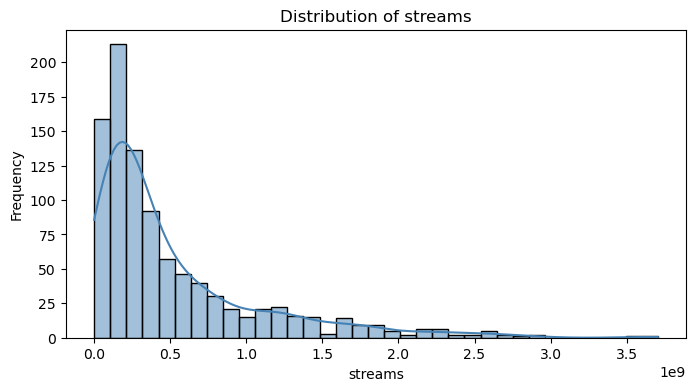

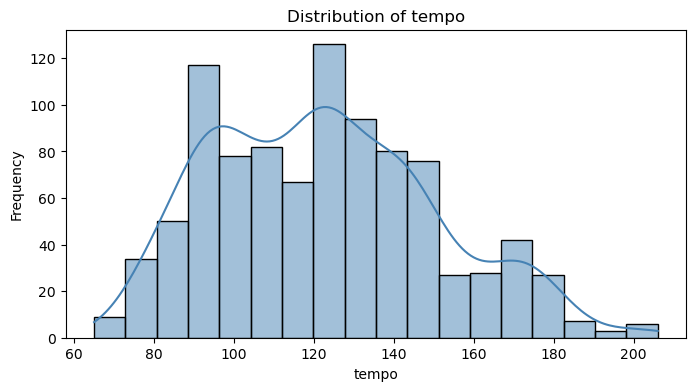

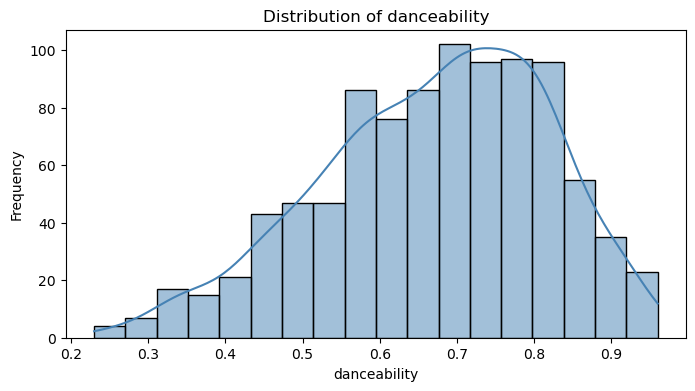

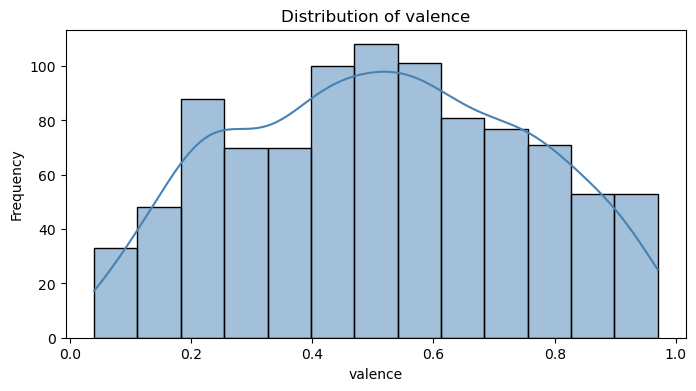

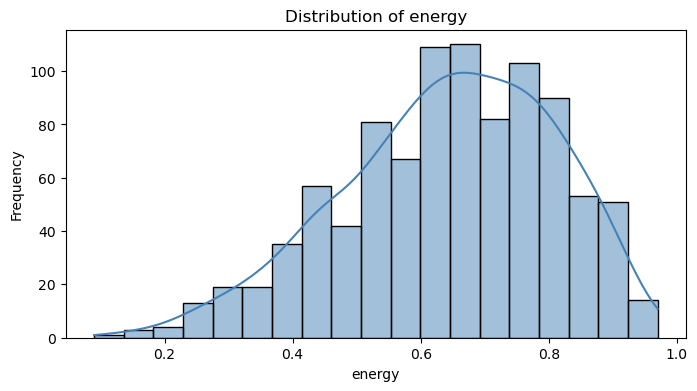

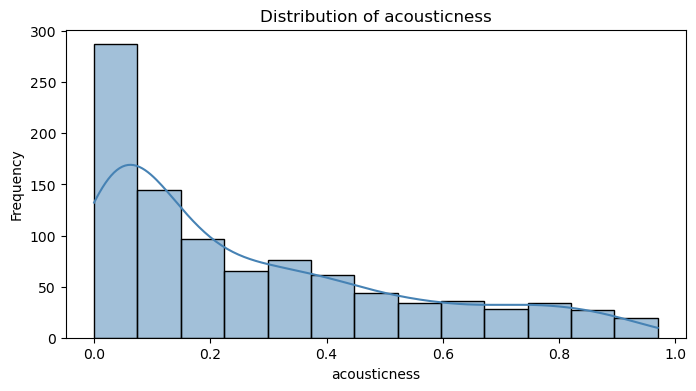

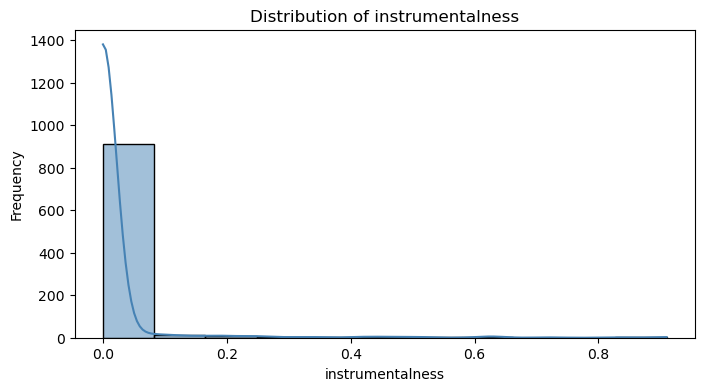

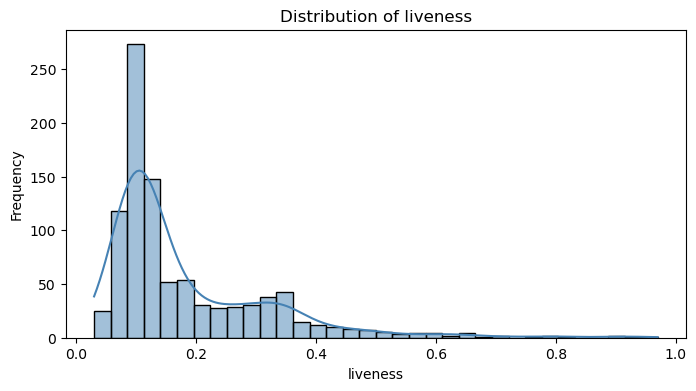

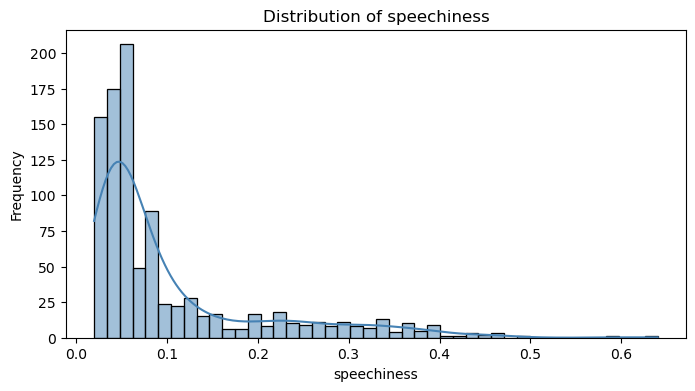

In [101]:
numeric_cols_df2 = ['streams', 'tempo', 'danceability', 'valence', 'energy',
                    'acousticness', 'instrumentalness', 'liveness', 'speechiness']

for col in numeric_cols_df2:
    plt.figure(figsize=(8, 4))
    sns.histplot(df2[col], kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

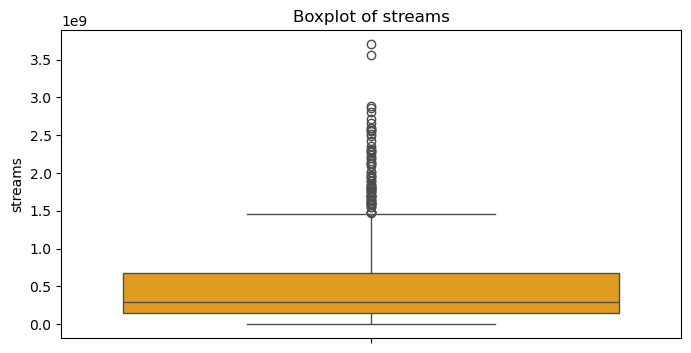

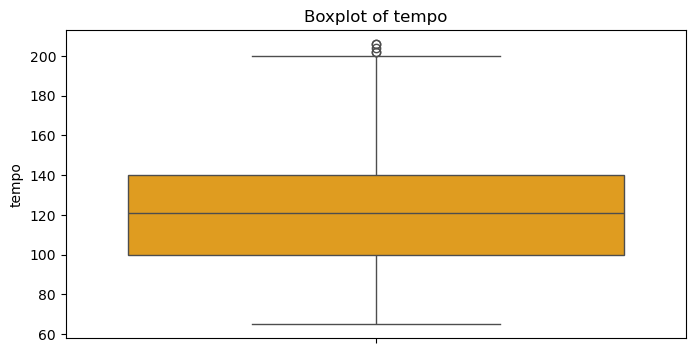

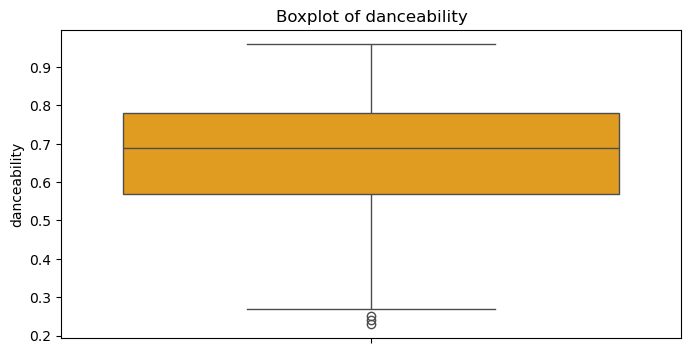

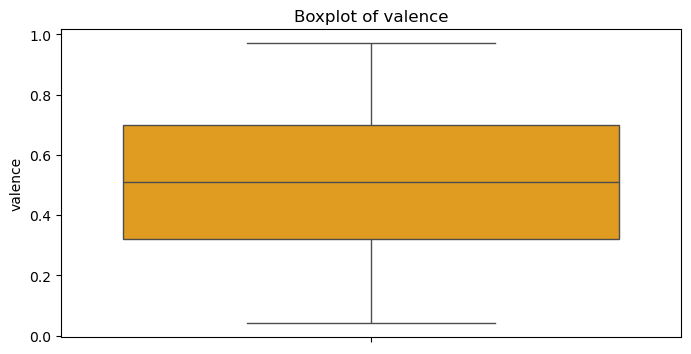

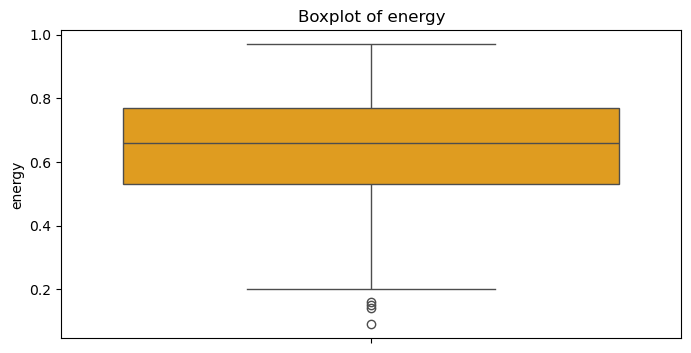

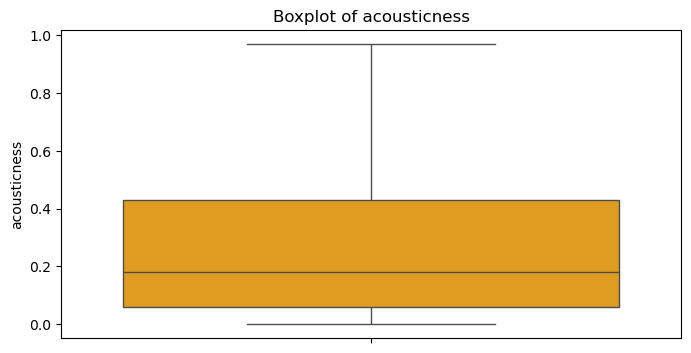

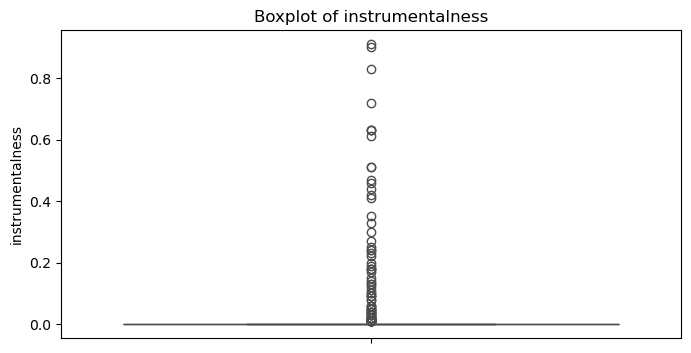

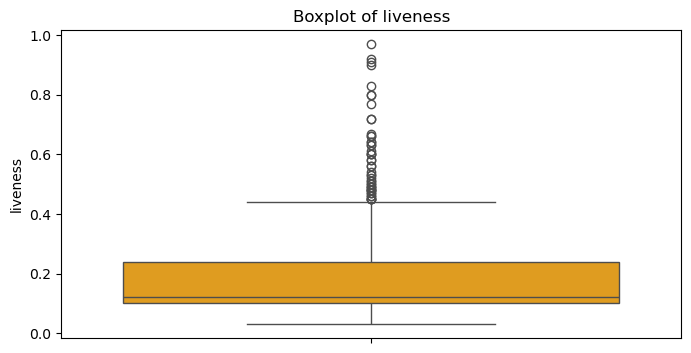

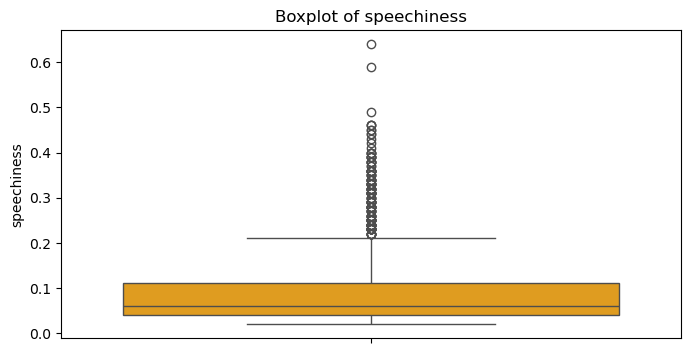

In [102]:
for col in numeric_cols_df2:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df2, y=col, color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

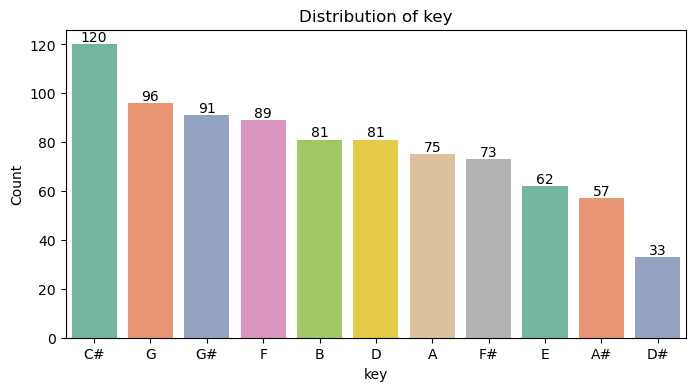

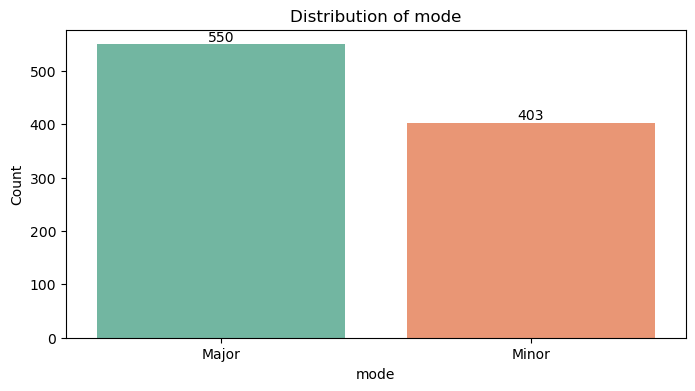

In [103]:
categorical_cols_df2 = ['key', 'mode']

for col in categorical_cols_df2:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df2, palette='Set2', order=df2[col].value_counts().index, hue=None)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add numbers on top of the bars
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(
            f'{int(height)}',  # Display the count as an integer
            (bar.get_x() + bar.get_width() / 2, height),  # Position the text
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.show()

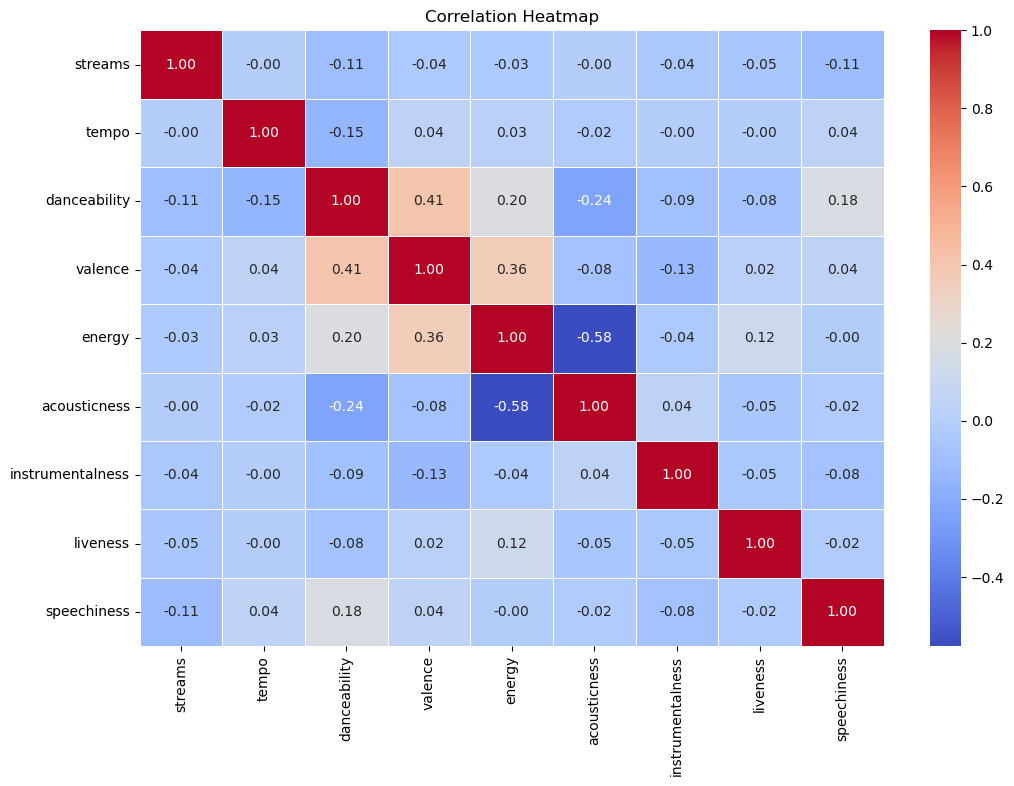

In [104]:
plt.figure(figsize=(12, 8))
correlation_matrix_df2 = df2[numeric_cols_df2].corr()
sns.heatmap(correlation_matrix_df2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

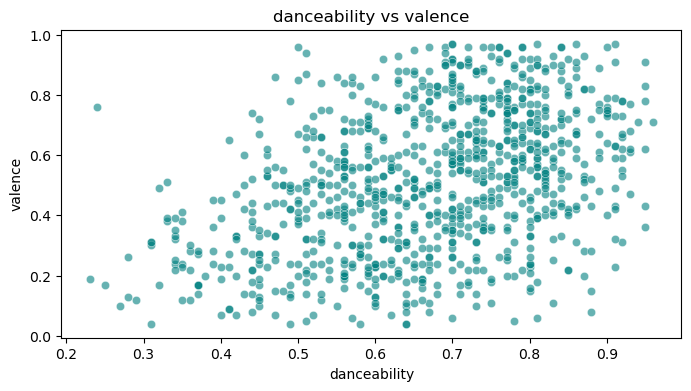

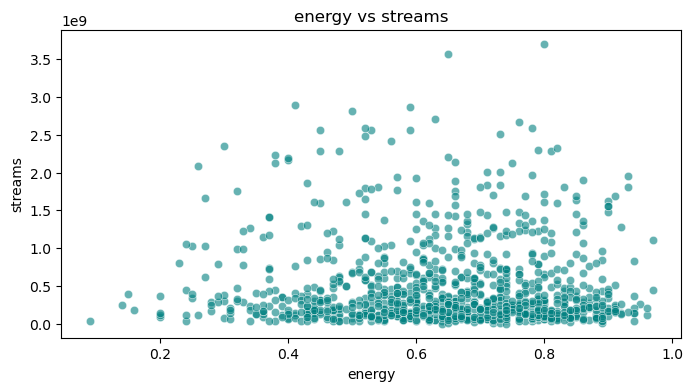

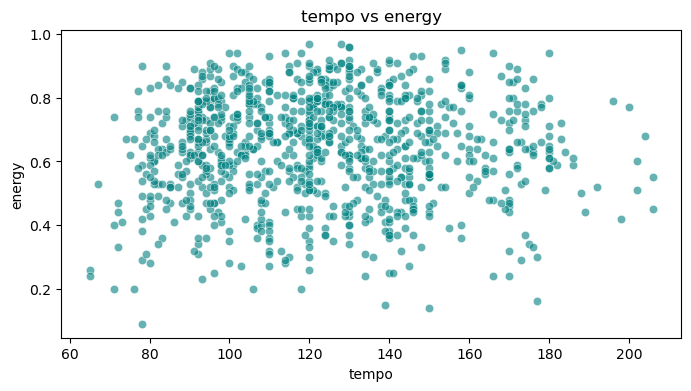

In [105]:
scatter_pairs_df2 = [
    ('danceability', 'valence'),
    ('energy', 'streams'),
    ('tempo', 'energy')
]

for x, y in scatter_pairs_df2:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df2, x=x, y=y, color='teal', alpha=0.6)
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

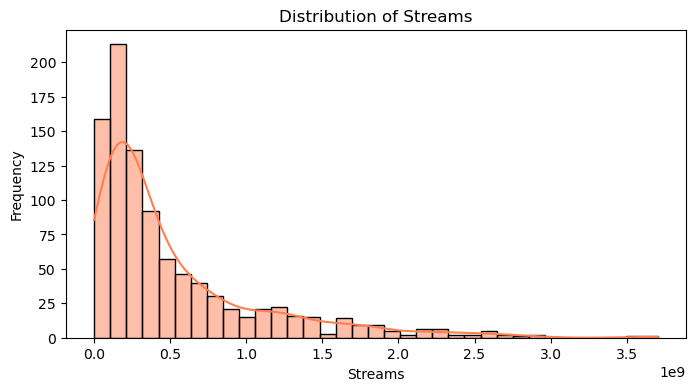

In [106]:
plt.figure(figsize=(8, 4))
sns.histplot(df2['streams'], kde=True, color='coral')
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

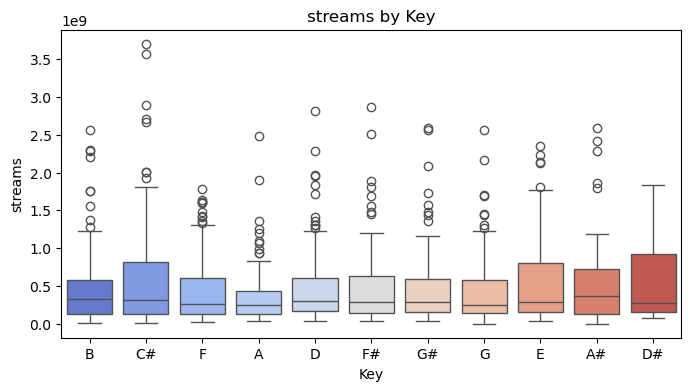

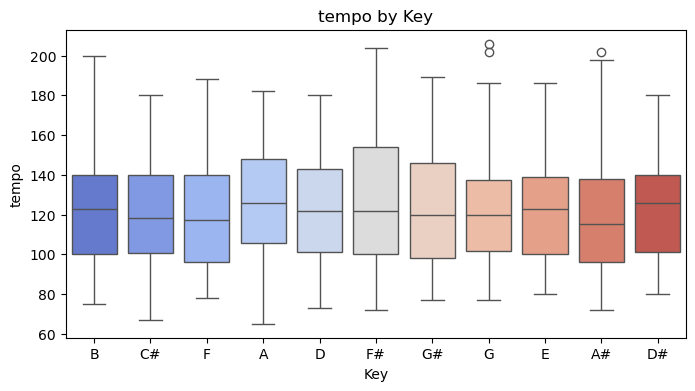

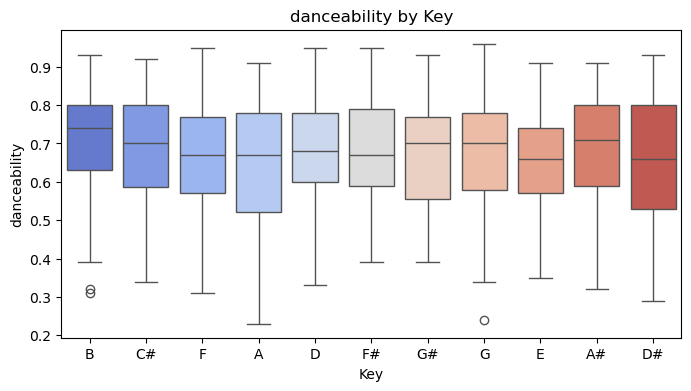

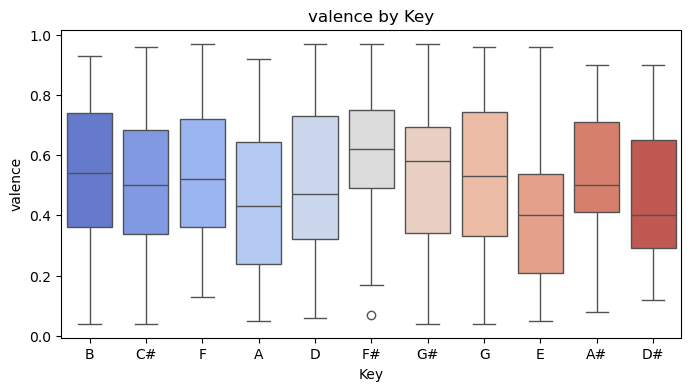

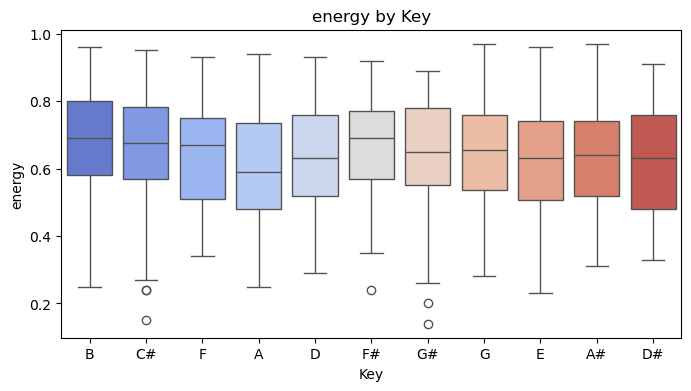

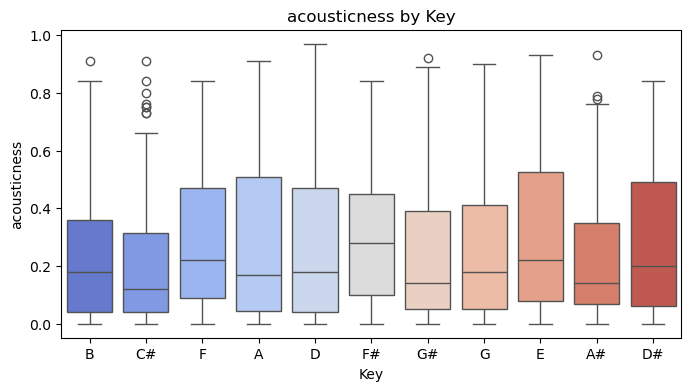

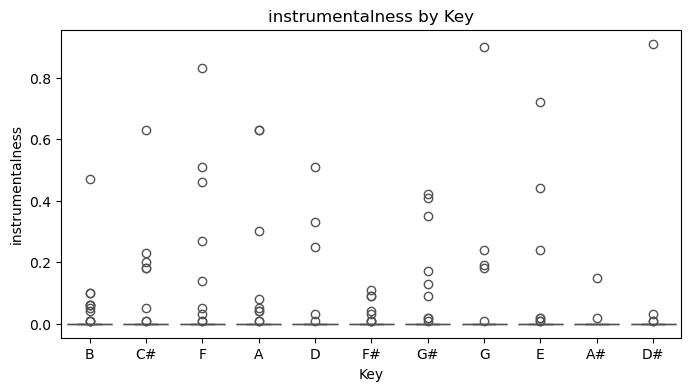

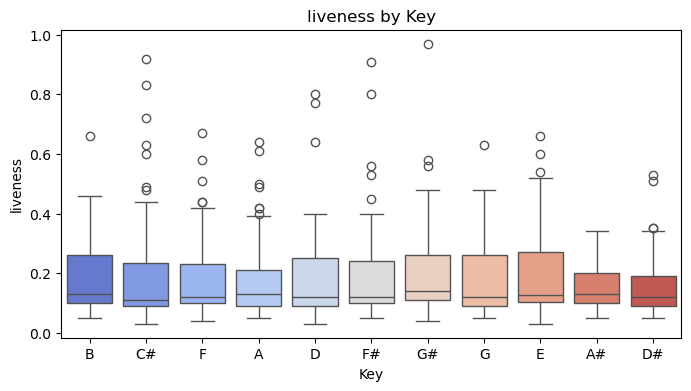

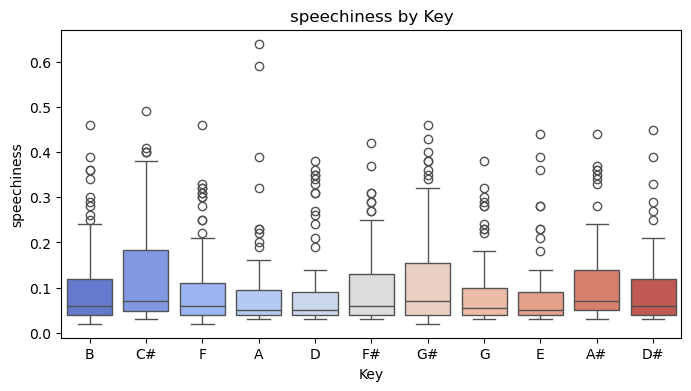

In [107]:
for col in numeric_cols_df2:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df2, x='key', y=col, palette='coolwarm')
    plt.title(f'{col} by Key')
    plt.xlabel('Key')
    plt.ylabel(col)
    plt.show()

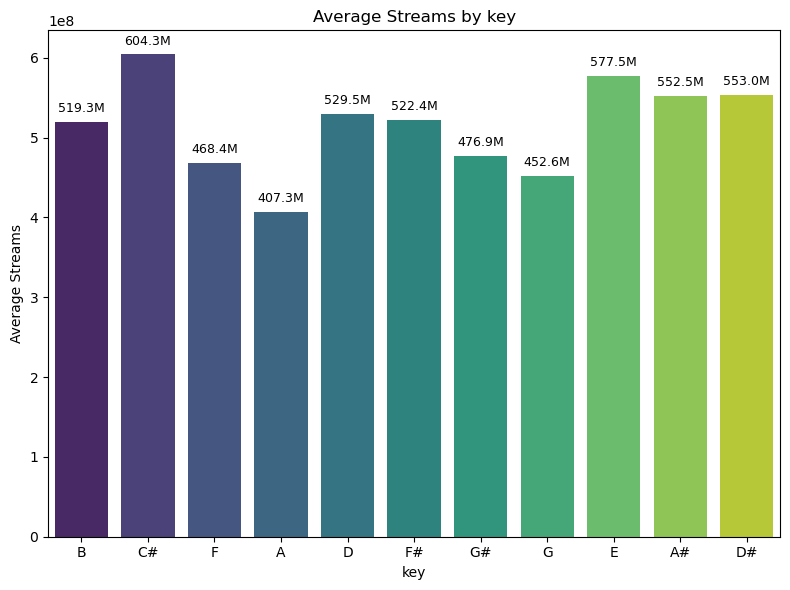

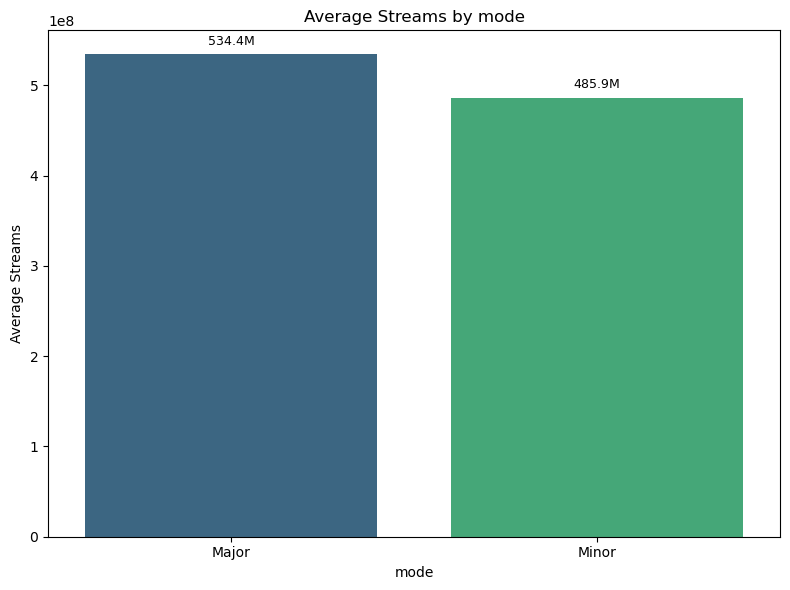

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols_df2 = ['key', 'mode']

for col in categorical_cols_df2:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        data=df2,
        x=col,
        y='streams',
        ci=None,
        palette=sns.color_palette("viridis", n_colors=df2[col].nunique())
    )
    plt.title(f'Average Streams by {col}')
    plt.xlabel(col)
    plt.ylabel('Average Streams')
    plt.xticks(rotation=0)

    # Format the numbers and add them on top of the bars
    for p in ax.patches:
        height = p.get_height()
        # Format the number with commas and convert to K or M
        if height >= 1e6:
            s = f'{height/1e6:.1f}M'
        elif height >= 1e3:
            s = f'{height/1e3:.1f}K'
        else:
            s = f'{height:.0f}'
        ax.annotate(
            s,
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=9, color='black',
            xytext=(0, 5),  # Offset text by 5 points upwards
            textcoords='offset points'
        )

    plt.tight_layout()
    plt.show()


### Key Insights from EDA of Dataset 2:

### 1. Univariate Analysis:

#### Streams:
- The distribution of streams is highly right-skewed, with most songs having streams below **500 million**.
- A small number of outliers have streams exceeding **1 billion**, emphasizing the dominance of a few extremely popular tracks.

#### Tempo:
- Tempo shows a bimodal distribution, with peaks around **100-120 BPM** and **140-160 BPM**.
- These ranges align with common musical preferences for dance and pop genres.

#### Danceability, Valence, Energy:
- These features exhibit near-normal distributions:
  - **Danceability**: Peaks around **0.7**, indicating high danceability is common among tracks.
  - **Valence**: Concentrated around **0.5**, indicating a mix of positive and neutral tracks.
  - **Energy**: Peaks around **0.6**, reflecting a preference for energetic songs.

#### Acousticness, Instrumentalness, Liveness, Speechiness:
- These variables are heavily skewed towards lower values:
  - **Acousticness**: Most tracks have low acoustic elements, typical of electronic and modern pop music.
  - **Instrumentalness**: Close to zero for most tracks, highlighting the dominance of vocal tracks.
  - **Liveness**: Peaks at low values, suggesting studio recordings dominate the dataset.
  - **Speechiness**: Concentrated below **0.1**, indicating limited spoken content in the tracks.


### 2. Categorical Analysis:

#### Key and Mode:
- **Keys** are evenly distributed, with **C#** and **G** being slightly more prominent.
- Songs in **Major mode** are more frequent than Minor mode and tend to have higher average streams.


### 3. Bivariate Analysis:

#### Correlation Matrix:
- Overall weak correlations, indicating that individual features do not strongly determine streams:
  - Positive correlation between **danceability** and **valence**, suggesting happier songs are more danceable.
  - Negative correlation between **acousticness** and features like **energy** and **danceability**, reflecting the inverse relationship between acoustic and energetic characteristics.

#### Scatterplots:
- **Danceability vs Valence**: Shows a positive trend, indicating happier songs are more danceable.
- **Energy vs Streams**: Weak correlation, showing streams are not significantly impacted by energy.
- **Tempo vs Energy**: No clear trend, but higher energy tracks often have a moderate tempo.

#### Boxplots by Key:
- **Streams by Key**: No significant variation across keys.
- **Tempo, Danceability, Valence by Key**: Distribution is fairly uniform across keys, with no distinct key dominating in any metric.


### 4. Summary of Popularity Trends:

#### Average Streams by Mode:
- Songs in **Major mode** outperform those in Minor mode in terms of average streams.

#### Average Streams by Key:
- **E**, **D#**, and **C#** keys have slightly higher average streams but are not drastically different from others.

### Overall Insights:
1. **Features like danceability, valence, and energy** are key contributors to the dataset's variability, with a focus on upbeat, danceable tracks.
2. The dataset reflects **modern musical trends**, with low acoustic and instrumental elements and a dominance of studio recordings.
3. **No single categorical feature (Key or Mode)** stands out as a strong determinant of streams, indicating multiple factors influence popularity.
4. **Outliers in streams** highlight the presence of exceptionally popular tracks that drive the distribution skew.

### Merged Dataset:

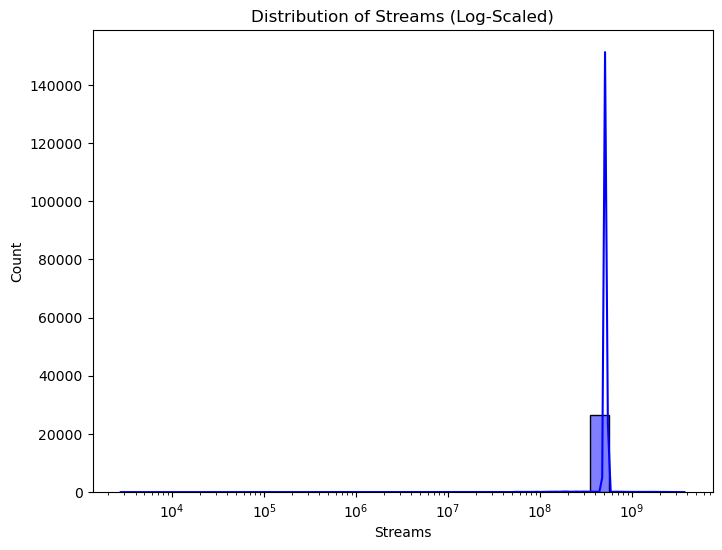

In [111]:
# Distribution of `streams`
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x='streams', bins=30, kde=True, color='blue', log_scale=(True, False))
plt.title('Distribution of Streams (Log-Scaled)')
plt.xlabel('Streams')
plt.ylabel('Count')
plt.show()

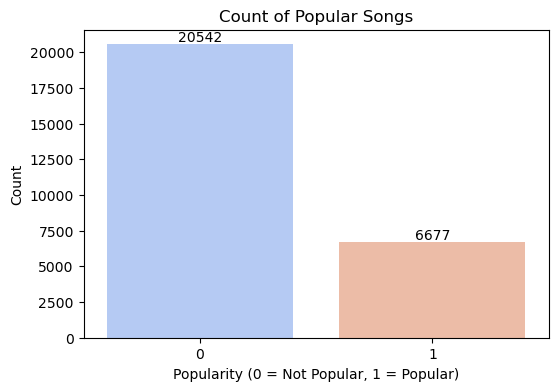

In [112]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df, x='popular', palette='coolwarm')
plt.title('Count of Popular Songs')
plt.xlabel('Popularity (0 = Not Popular, 1 = Popular)')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()), ha='center', va='bottom')
plt.show()

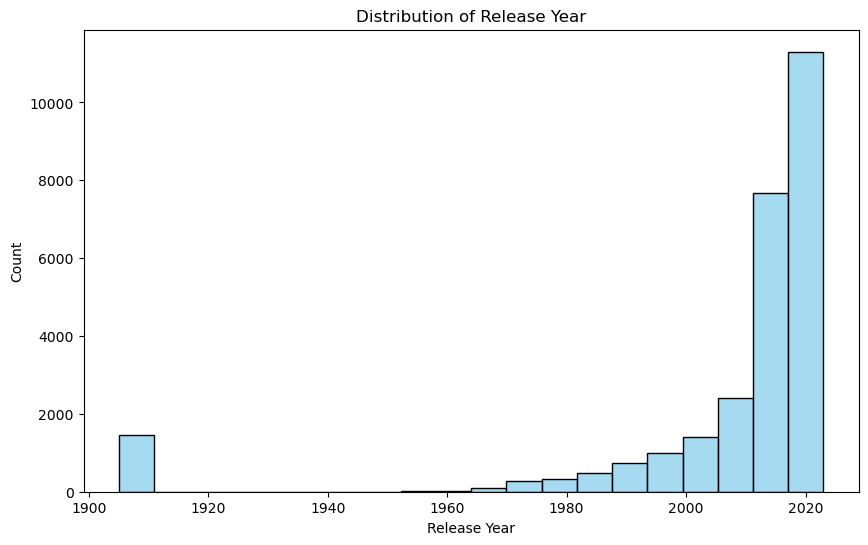

In [113]:
combined_df['release_year'] = pd.to_numeric(combined_df['release_year'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='release_year', bins=20, kde=False, color='SkyBlue')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

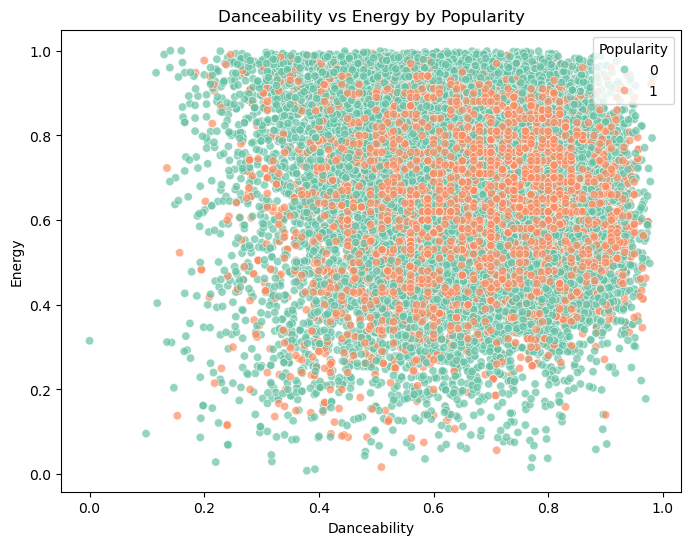

In [114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='danceability', y='energy', hue='popular', palette='Set2', alpha=0.7)
plt.title('Danceability vs Energy by Popularity')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Popularity', loc='upper right')
plt.show()

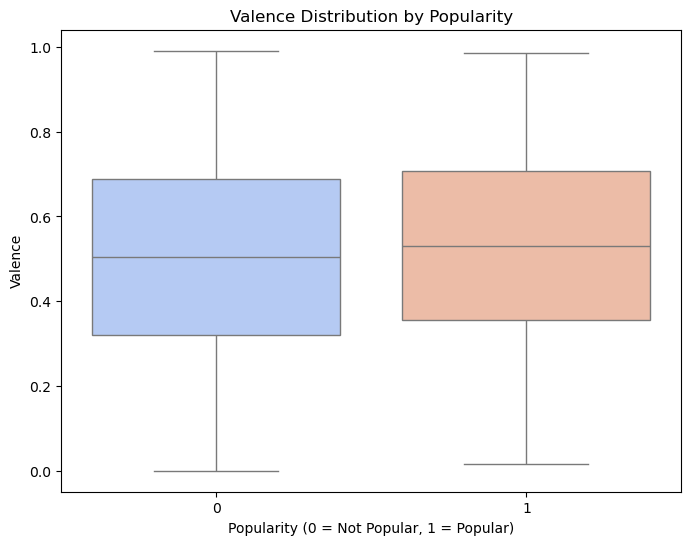

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='popular', y='valence', palette='coolwarm')
plt.title('Valence Distribution by Popularity')
plt.xlabel('Popularity (0 = Not Popular, 1 = Popular)')
plt.ylabel('Valence')
plt.show()

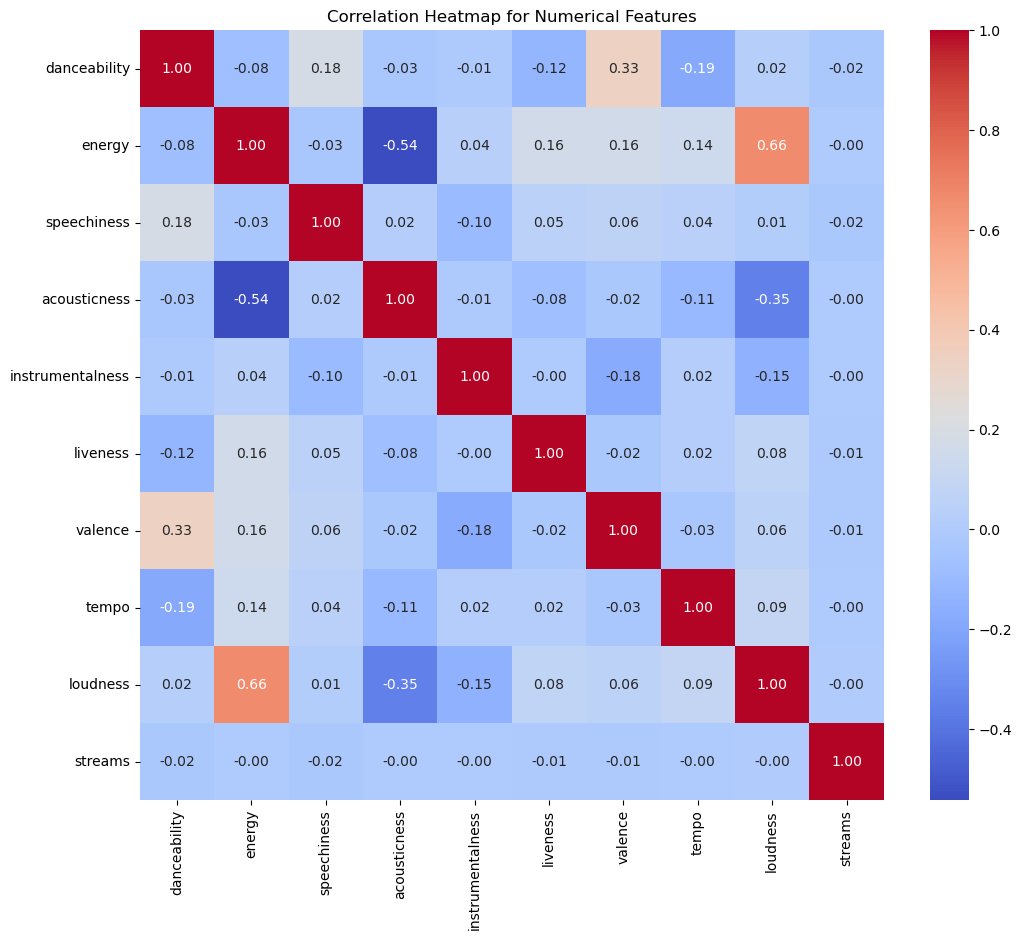

In [116]:
numerical_features = ['danceability', 'energy', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness', 'streams']
plt.figure(figsize=(12, 10))
correlation_matrix = combined_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

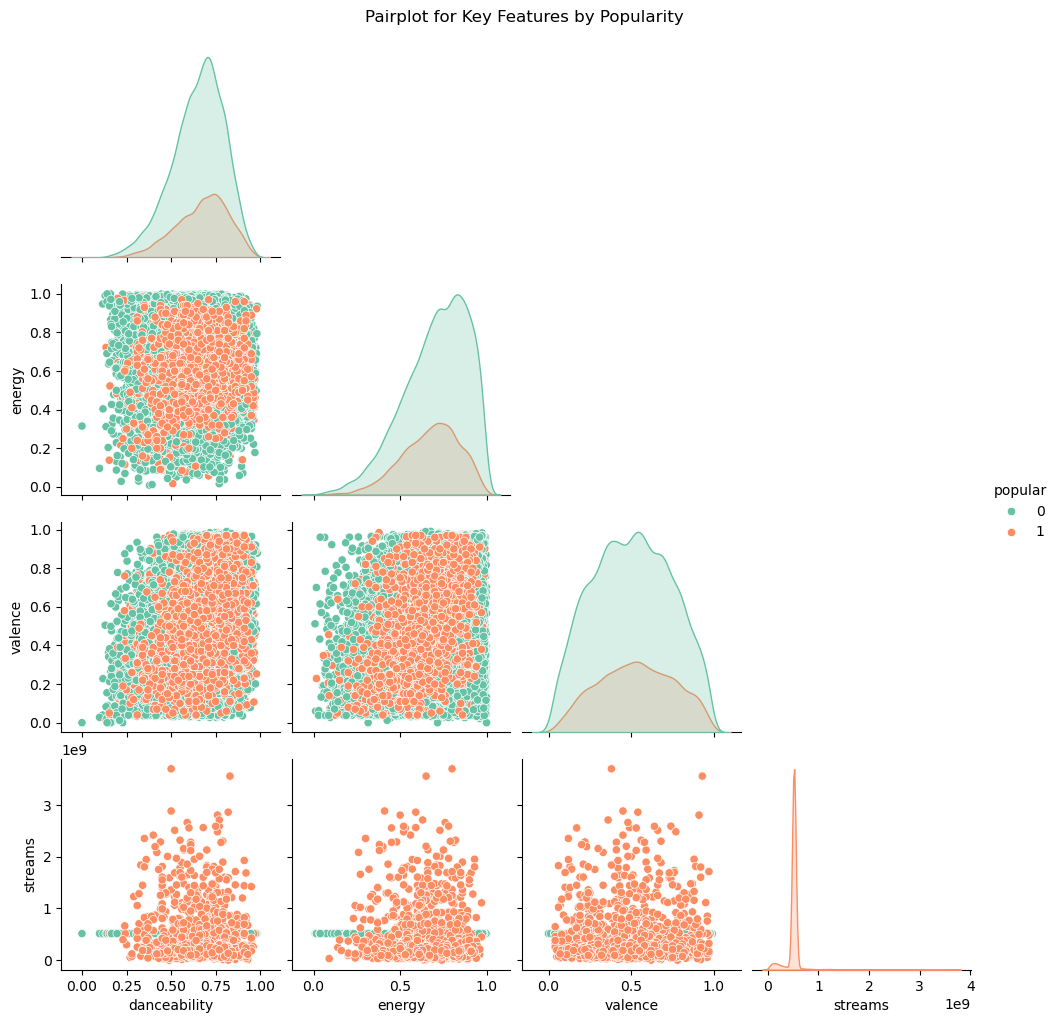

In [117]:
key_features = ['danceability', 'energy', 'valence', 'streams']
sns.pairplot(data=combined_df, vars=key_features, hue='popular', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairplot for Key Features by Popularity', y=1.02)
plt.show()

### Key Insights from EDA of the Merged Dataset:

#### 1. **Univariate Analysis:**
- **Streams:**
  - The distribution of streams is heavily right-skewed, with the majority of songs having streams below 500 million.
  - There are outliers with streams exceeding **1 billion**, reflecting the dominance of highly popular tracks.

- **Release Year:**
  - A sharp increase in song releases is observed post-2000, with the highest density of releases around the **2010s**. This reflects the impact of digital music platforms on music production.

- **Danceability, Valence, Energy:**
  - These variables follow near-normal distributions:
    - **Danceability** peaks around **0.65**, indicating that moderately danceable songs dominate.
    - **Valence** is centered around **0.5**, showing a balance between positive and neutral emotional tones.
    - **Energy** peaks near **0.7**, reflecting a preference for moderately energetic tracks.

- **Acousticness, Instrumentalness, Speechiness:**
  - These variables are skewed towards lower values:
    - **Acousticness** is very low for most tracks, consistent with modern pop and electronic trends.
    - **Instrumentalness** is close to zero, signifying the dominance of vocal tracks.
    - **Speechiness** values are low, indicating minimal spoken-word content.

#### 2. **Bivariate Analysis:**
- **Danceability vs. Energy by Popularity:**
  - Popular songs generally have slightly higher danceability and energy scores, highlighting their importance for engagement.

- **Valence Distribution by Popularity:**
  - Popular tracks have a slightly higher valence, indicating a preference for more positive or cheerful songs.

- **Streams by Playlist Genre:**
  - Certain genres (e.g., **pop** and **hip-hop**) exhibit significantly higher average streams compared to niche genres.

#### 3. **Correlation Analysis:**
- Weak correlations are observed among most features and **streams**, emphasizing the complex relationship between features and song popularity.
- **Energy** and **loudness** have a positive correlation (0.66), reflecting their interconnected nature in music production.
- **Danceability** shows a moderate correlation with **valence** (0.33), indicating that happier songs tend to be more danceable.

#### 4. **Multivariate Analysis:**
- **Pairplot Analysis:**
  - Popular songs show distinct distributions in energy, valence, and streams, with clear separations in key characteristics.
  - Outliers in streams highlight a small set of extremely popular tracks driving significant variability.

#### **Overall Insights:**
1. **Popularity trends:**
   - Danceability, energy, and valence are critical attributes for popular songs, with higher values generally correlating with popularity.
   - Streams exhibit extreme variability, driven by a small subset of exceptionally popular tracks.

2. **Genre effects:**
   - Some genres consistently outperform others in terms of average streams, suggesting their broad appeal.

3. **Feature importance:**
   - Features like loudness, energy, and valence are intertwined and impact streams indirectly, though their individual correlations are weak.

4. **Temporal trends:**
   - A surge in song releases post-2000s aligns with digital streaming growth, creating opportunities for newer tracks to dominate.


### Feature Importance and Selection:

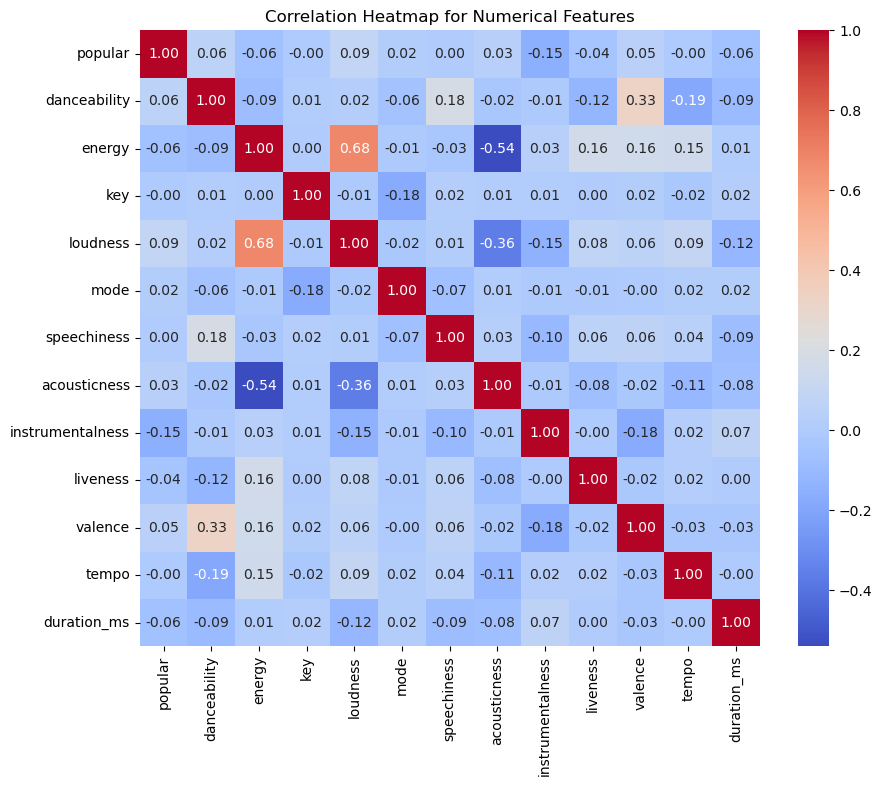

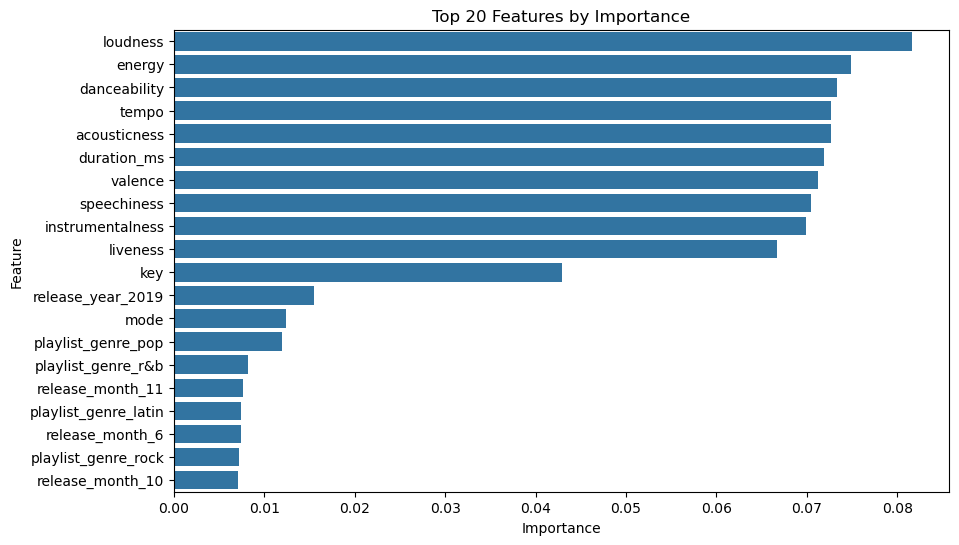

                          Feature  Chi2_Score
52208          playlist_genre_pop  203.083671
52193           release_year_2019  163.581328
47123         track_artist_Khalid  136.483664
52207        playlist_genre_latin  118.030474
43485      track_artist_Bad Bunny  116.573374
43677  track_artist_Billie Eilish   98.680555
50060   track_artist_Selena Gomez   96.185623
45186     track_artist_Ed Sheeran   96.102638
51278   track_artist_Travis Scott   90.089797
44060  track_artist_Calvin Harris   85.685703
Top Features Selected by RFE: ['danceability', 'energy', 'instrumentalness', 'release_year_1973', 'release_year_1980', 'release_year_1983', 'release_year_1990', 'release_year_1996', 'release_year_2005', 'release_year_2008']
Explained Variance Ratio by PCA Components: [9.99999789e-01 2.04467433e-07 3.65624773e-09 2.47415208e-09
 6.93996963e-11 6.09366717e-11 4.90373973e-11 4.65835989e-11
 4.49303751e-11 4.23830957e-11]


In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

df1 = pd.read_csv("DSO528_project_spotify_1.csv")

# 1. Correlation Heatmap for Numerical Features
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
correlations = df1[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# 2. Feature Importance using Random Forest
X = df1.drop(columns=['popular', 'track_id', 'track_name', 'track_artist'])  # Drop non-relevant columns
y = df1['popular']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Fit Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Plot Feature Importance
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(20))
plt.title("Top 20 Features by Importance")
plt.show()

# 3. Chi-Square Test for Categorical Variables
categorical_cols = df1.select_dtypes(include=['object', 'category']).columns
X_cat = pd.get_dummies(df1[categorical_cols], drop_first=True)
chi_scores = chi2(X_cat, y)
chi2_importances = pd.DataFrame({'Feature': X_cat.columns, 'Chi2_Score': chi_scores[0]})
chi2_importances = chi2_importances.sort_values(by='Chi2_Score', ascending=False)
print(chi2_importances.head(10))

# 4. Recursive Feature Elimination (RFE)
log_reg = LogisticRegression(max_iter=500, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_]
print("Top Features Selected by RFE:", rfe_features.tolist())

# 5. PCA for Dimensionality Reduction (Optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio by PCA Components:", pca.explained_variance_ratio_)

### Key Observations Based on the Results:

#### Correlation vs. Feature Importance:

1. **Correlation (Heatmap)**:
   - Measures the linear relationship between two variables.
   - A weak correlation suggests that, linearly, the feature doesn't strongly explain the target (`popular`).
   - Example: Valence might have a weak linear relationship with popularity, but it could still contribute significantly in a nonlinear way or through interactions with other features.

2. **Feature Importance (Tree-Based Models)**:
   - Evaluates the impact of a feature on the predictive ability of a model.
   - Tree-based models, such as Random Forests, capture both linear and nonlinear relationships, as well as feature interactions.
   - A feature with weak linear correlation can still have high importance due to its complex, nonlinear relationship with the target.

#### Why the Apparent Contradiction?

1. **Loudness, Energy, and Danceability**:
   - These features may not exhibit strong linear correlations with popularity, as shown in the heatmap, but they are identified as important by tree-based models. This suggests:
     - **Interaction Effects**: For example, louder songs with high valence might be more popular.
     - **Threshold Effects**: Features like danceability might influence popularity only above a certain threshold.

2. **Nonlinear Relationships**:
   - Tree-based models can capture nonlinear patterns where the relationship between a feature and the target isn't straightforward.
   - For instance, energy levels that are too high or too low may negatively impact popularity, while mid-range energy might be ideal.

#### Revised Interpretation:

- Features like **loudness**, **valence**, and **danceability** may exhibit weak linear correlations individually, but they are influential in predictive frameworks that account for:
  - **Nonlinear Relationships**: Complex, non-linear trends captured by models.
  - **Feature Interactions**: How multiple features combine to impact popularity.

This highlights the importance of using advanced modeling techniques to uncover hidden patterns that simple linear analyses might miss.

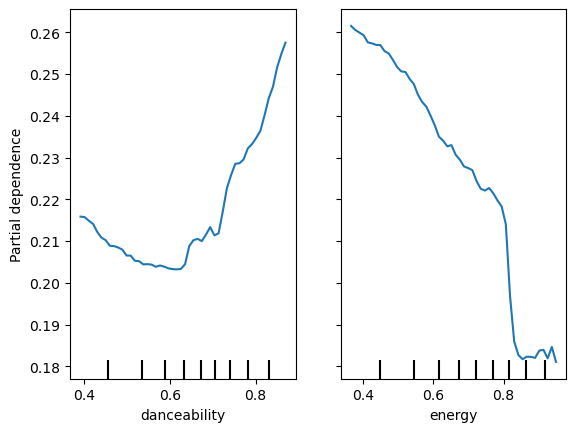

In [122]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for 'danceability' and 'energy'
PartialDependenceDisplay.from_estimator(
    estimator=rf_model,  # Your trained Random Forest model
    X=X,                 # Your feature data
    features=['danceability', 'energy'],  # Features to analyze
    kind='average',      # Average effect
    grid_resolution=50,  # Number of grid points for each feature
)
plt.show()

In [123]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

important_features_rfe = X.columns[rfe.support_]
print("Selected Features by RFE:", important_features_rfe)

Selected Features by RFE: Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [124]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns
important_features_rf = sorted(zip(importances, feature_names), reverse=True)
print("Important Features by Random Forest:")
print(important_features_rf[:10])


Important Features by Random Forest:
[(0.08165831133415073, 'loudness'), (0.07492787448524564, 'energy'), (0.07332472707089588, 'danceability'), (0.0726892840770369, 'tempo'), (0.0726357146195322, 'acousticness'), (0.07188765354015045, 'duration_ms'), (0.07127467701964947, 'valence'), (0.07050866122824029, 'speechiness'), (0.06986572913957352, 'instrumentalness'), (0.0667629584175869, 'liveness')]


In [125]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, y)

importance = xgb_model.get_booster().get_score(importance_type='weight')
print("XGBoost Important Features:", importance)

XGBoost Important Features: {'danceability': 329.0, 'energy': 289.0, 'key': 156.0, 'loudness': 333.0, 'mode': 26.0, 'speechiness': 323.0, 'acousticness': 321.0, 'instrumentalness': 214.0, 'liveness': 302.0, 'valence': 311.0, 'tempo': 345.0, 'duration_ms': 334.0, 'release_year_1905': 17.0, 'release_year_1964': 2.0, 'release_year_1965': 2.0, 'release_year_1966': 2.0, 'release_year_1967': 6.0, 'release_year_1968': 3.0, 'release_year_1969': 3.0, 'release_year_1970': 1.0, 'release_year_1971': 3.0, 'release_year_1973': 5.0, 'release_year_1974': 1.0, 'release_year_1975': 3.0, 'release_year_1976': 1.0, 'release_year_1978': 2.0, 'release_year_1979': 4.0, 'release_year_1980': 5.0, 'release_year_1982': 4.0, 'release_year_1983': 4.0, 'release_year_1984': 2.0, 'release_year_1985': 1.0, 'release_year_1986': 1.0, 'release_year_1987': 6.0, 'release_year_1988': 1.0, 'release_year_1989': 5.0, 'release_year_1991': 2.0, 'release_year_1992': 1.0, 'release_year_1993': 5.0, 'release_year_1994': 2.0, 'release

## Feature Importance Comparison: Random Forest vs XGBoost

### Random Forest (RF):
The most important features based on the RF model are:

1. **loudness**: Most significant predictor of song popularity.
2. **energy**: High energy songs are impactful for determining popularity.
3. **danceability**: Important for engaging listeners and determining popularity.
4. **duration_ms**: Length of the song matters, especially for certain audiences.
5. **acousticness**: Tracks with acoustic elements hold importance.
6. **speechiness**: Lyrics-heavy or spoken-word songs influence listener preferences.
7. **tempo**: Tempo captures pace, an essential feature for specific genres.
8. **valence**: Positivity of a song influences its appeal.
9. **instrumentalness**: Importance for instrumental-heavy songs.
10. **liveness**: Captures the live performance vibe, a unique factor in popularity.

### XGBoost:
The most important features based on the XGBoost model are:

1. **release_year (252)**: Tracks released in recent years are likely more relevant for popularity.
2. **release_month (155)**: Seasonality or release timing might influence popularity.
3. **danceability (344)**: A top predictor for XGBoost, aligned with RF results.
4. **energy (337)**: High predictive power, similar to RF.
5. **key (155)**: Adds some relevance to the harmonic aspect of music.
6. **loudness (409)**: The most significant feature for XGBoost, consistent with RF.
7. **mode (34)**: Though not highly ranked, contributes in certain interactions.
8. **speechiness (380)**: Lyrics/spoken-word content impacts predictions.
9. **acousticness (346)**: Important for understanding acoustic appeal.
10. **instrumentalness (232)**: Similar predictive power as in RF.
11. **liveness (321)**: Captures the "live performance" element.
12. **valence (384)**: Positivity is a key driver.
13. **tempo (398)**: Tempo is a strong predictor of engagement.
14. **duration_ms (351)**: Highlights the importance of track length, consistent with RF.


### Key Observations:

#### Consistently Important Features:
Both RF and XGBoost highlight the importance of:
- **loudness**
- **energy**
- **danceability**
- **speechiness**
- **acousticness**
- **instrumentalness**
- **valence**
- **tempo**
- **duration_ms**
- **liveness**

These features are strong predictors of song popularity.

#### Additional Features in XGBoost:
1. **release_year** and **release_month**: XGBoost captures the time-based aspects of song popularity, which RF doesn't emphasize.
2. **key**: Harmonic relevance is highlighted by XGBoost but not RF.

#### Differences in Ranking:
- RF ranks **loudness**, **energy**, and **danceability** as top features.
- XGBoost gives slightly higher importance to **speechiness**, **tempo**, and **valence**.

# Phase 6: Model Building and Evaluation

### Dataset 1:

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load Dataset (Replace with your dataset path)
df = pd.read_csv("DSO528_project_spotify_1.csv")

# Define Features and Target
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
X = df[features]
y = df['popular']

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values
X = X.fillna(X.mean())

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)

Logistic Regression Performance:
Accuracy: 0.7816
ROC-AUC Score: 0.6690

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6163
           1       0.17      0.00      0.00      1717

    accuracy                           0.78      7880
   macro avg       0.47      0.50      0.44      7880
weighted avg       0.65      0.78      0.69      7880

Confusion Matrix:
[[6158    5]
 [1716    1]]


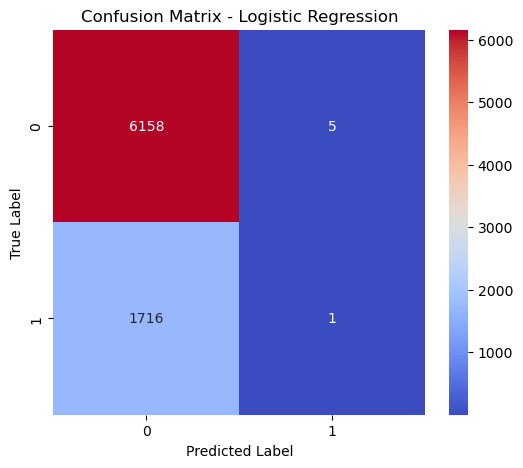

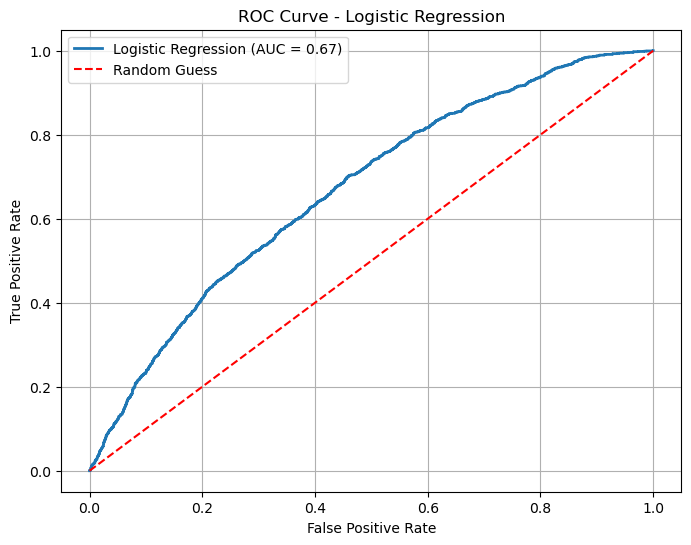

In [130]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=528)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_val)
y_proba_log = log_model.predict_proba(X_val)[:, 1]

# Metrics
log_accuracy = accuracy_score(y_val, y_pred_log)
log_report = classification_report(y_val, y_pred_log)
log_auc = roc_auc_score(y_val, y_proba_log)
conf_matrix_log = confusion_matrix(y_val, y_pred_log)

# Print Results
print("Logistic Regression Performance:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"ROC-AUC Score: {log_auc:.4f}")
print("\nClassification Report:")
print(log_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_log)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_val, y_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Decision Tree Performance:
Accuracy: 0.7816
ROC-AUC Score: 0.6820

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6163
           1       0.40      0.00      0.01      1717

    accuracy                           0.78      7880
   macro avg       0.59      0.50      0.44      7880
weighted avg       0.70      0.78      0.69      7880

Confusion Matrix:
[[6151   12]
 [1709    8]]


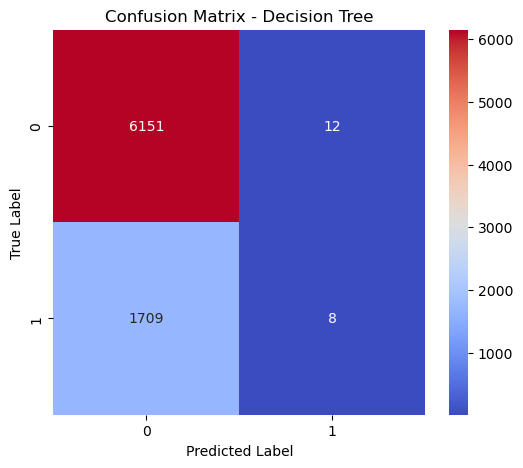

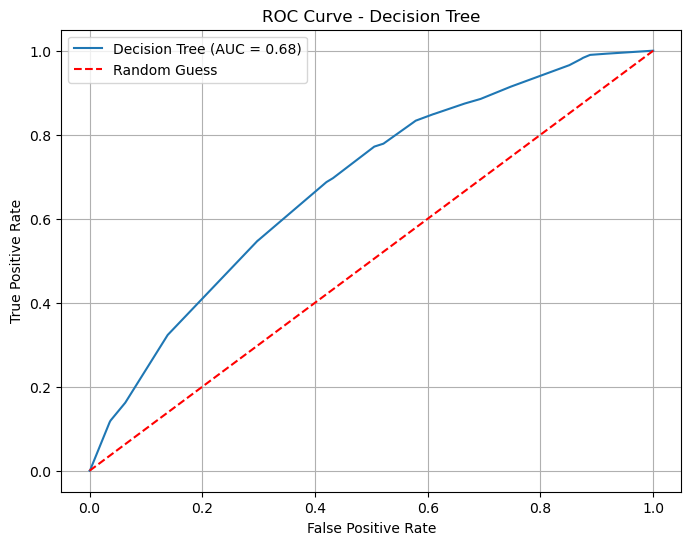

In [131]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=528)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_val)
y_proba_dt = dt_model.predict_proba(X_val)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_val, y_pred_dt)
dt_report = classification_report(y_val, y_pred_dt)
dt_auc = roc_auc_score(y_val, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)

# Print Results
print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC-AUC Score: {dt_auc:.4f}")
print("\nClassification Report:")
print(dt_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Random Forest Performance:
Accuracy: 0.8716
ROC-AUC Score: 0.8251

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6163
           1       0.85      0.49      0.63      1717

    accuracy                           0.87      7880
   macro avg       0.86      0.74      0.77      7880
weighted avg       0.87      0.87      0.86      7880

Confusion Matrix (Random Forest):
[[6019  144]
 [ 868  849]]


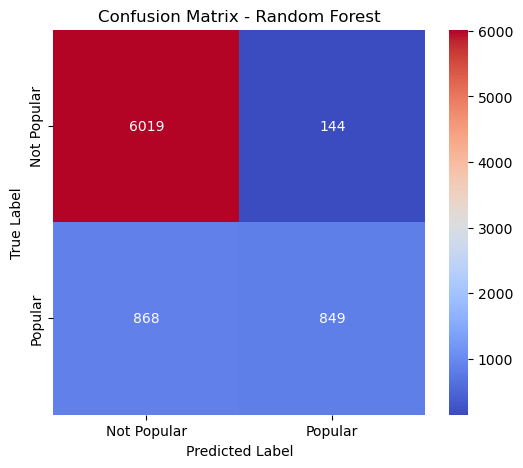

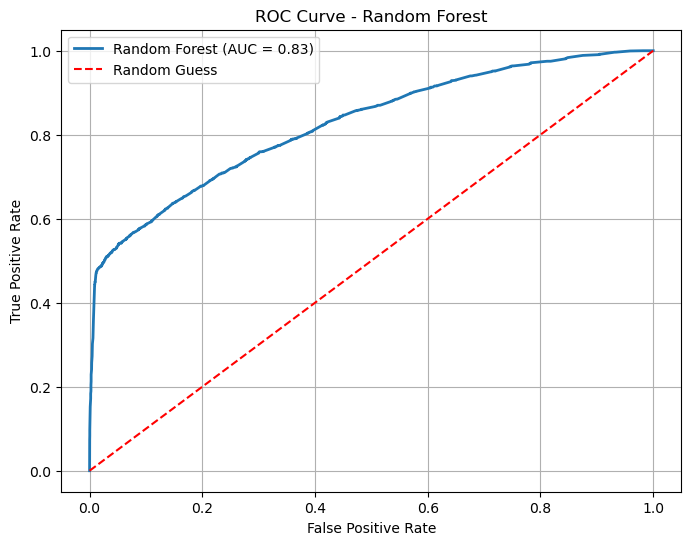

In [132]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=528)
rf_model.fit(X_train, y_train)

# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Random Forest Metrics
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_report = classification_report(y_val, y_pred_rf)
rf_auc = roc_auc_score(y_val, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)

# Print Results
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC-AUC Score: {rf_auc:.4f}")
print("\nClassification Report:")
print(rf_report)

# Print Confusion Matrix
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Popular", "Popular"], yticklabels=["Not Popular", "Popular"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

XGBoost Performance:
Accuracy: 0.8234
ROC-AUC Score: 0.7882

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6163
           1       0.71      0.32      0.44      1717

    accuracy                           0.82      7880
   macro avg       0.77      0.64      0.67      7880
weighted avg       0.81      0.82      0.80      7880

Confusion Matrix:
[[5938  225]
 [1167  550]]


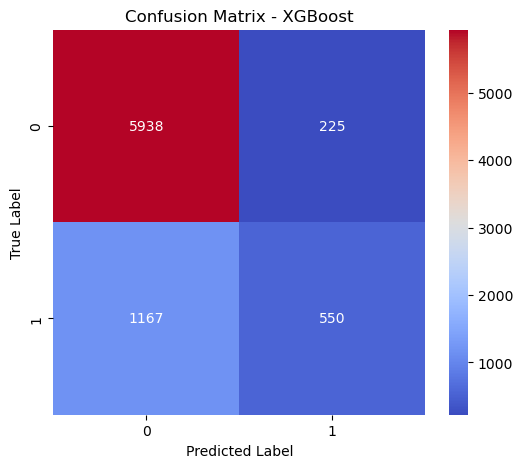

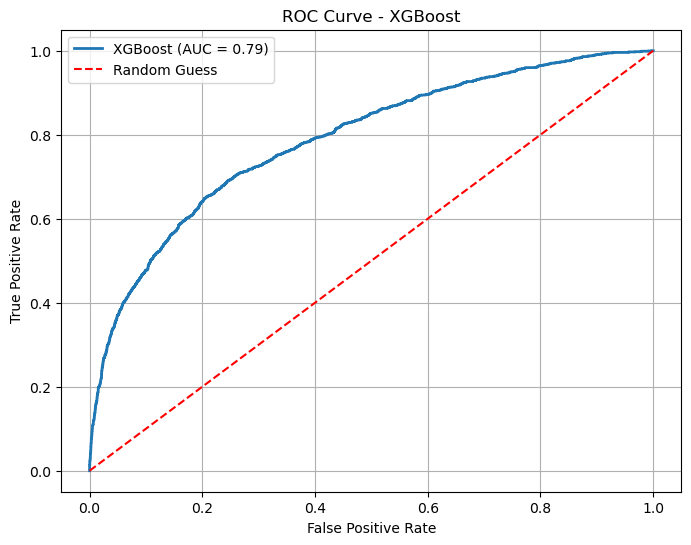

In [133]:
# XGBoost Model
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=528
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Metrics
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_report = classification_report(y_val, y_pred_xgb)
xgb_auc = roc_auc_score(y_val, y_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)

# Print Results
print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC-AUC Score: {xgb_auc:.4f}")
print("\nClassification Report:")
print(xgb_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

[LightGBM] [Info] Number of positive: 4007, number of negative: 14379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 18386, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217938 -> initscore=-1.277726
[LightGBM] [Info] Start training from score -1.277726
LightGBM Performance:
Accuracy: 0.8034
ROC-AUC Score: 0.7674

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6163
           1       0.71      0.17      0.27      1717

    accuracy                           0.80      7880
   macro avg       0.76      0.57      0.58      7880
weighted avg       0.79      0.80      0.75      7880

Confusion Matrix:
[[6044  119]


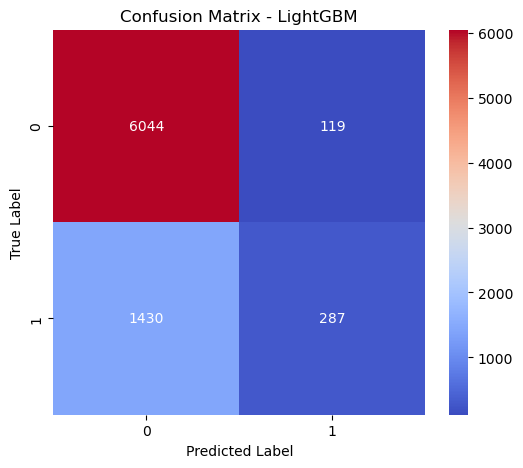

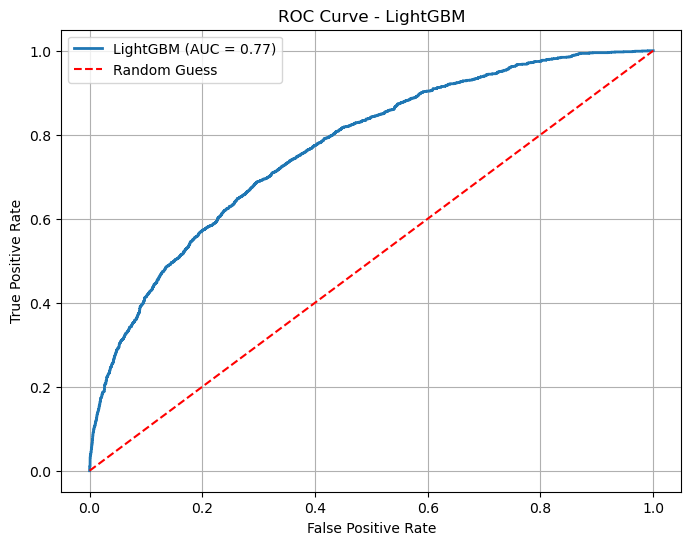

In [134]:
# LightGBM Model
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=528)
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_val)
y_proba_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Metrics
lgb_accuracy = accuracy_score(y_val, y_pred_lgb)
lgb_report = classification_report(y_val, y_pred_lgb)
lgb_auc = roc_auc_score(y_val, y_proba_lgb)
conf_matrix_lgb = confusion_matrix(y_val, y_pred_lgb)

# Print Results
print("LightGBM Performance:")
print(f"Accuracy: {lgb_accuracy:.4f}")
print(f"ROC-AUC Score: {lgb_auc:.4f}")
print("\nClassification Report:")
print(lgb_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_lgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_val, y_proba_lgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC = {lgb_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

### Model Performance Comparison and Visualization:

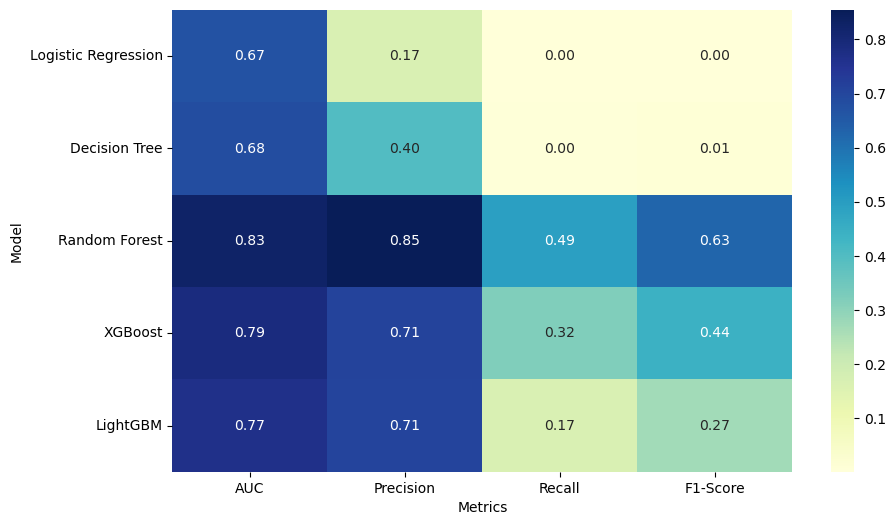

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Combine metrics into a DataFrame for comparison
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [log_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, lgb_accuracy],
    "AUC": [log_auc, dt_auc, rf_auc, xgb_auc, lgb_auc],
    "Precision": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_lgb, output_dict=True)["1"]["precision"],
    ],
    "Recall": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_lgb, output_dict=True)["1"]["recall"],
    ],
    "F1-Score": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_lgb, output_dict=True)["1"]["f1-score"],
    ]
})

# Display the DataFrame with a caption
styled_model_comparison = model_comparison.style.set_caption("Model Performance Metrics Comparison - Dataset 1")
display(styled_model_comparison)

# Prepare data for heatmap visualization
heatmap_data = model_comparison.set_index("Model").drop(columns="Accuracy")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.xlabel("Metrics")
plt.yticks(rotation=0)
plt.show()

### Dataset 2:


In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Load the dataset
df2 = pd.read_csv('DSO528_project_spotify_2.csv')

# Convert 'streams' to numeric
df2['streams'] = pd.to_numeric(df2['streams'], errors='coerce')

# Define a threshold for popularity (median value)
threshold = df2['streams'].median()
df2['popular'] = (df2['streams'] > threshold).astype(int)

print(df2['popular'].value_counts())

popular
0    477
1    476
Name: count, dtype: int64


In [139]:
# Define relevant features
features = ['danceability', 'energy', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Prepare X (features) and y (target variable)
X = df2[features]
y = df2['popular']

# Handle missing values by filling with the mean
X = X.fillna(X.mean())

In [140]:
# Split into train and test sets (30% test size)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=528, stratify=y)

Logistic Regression Performance:
Accuracy: 0.5420
ROC-AUC Score: 0.5575

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       143
           1       0.54      0.53      0.54       143

    accuracy                           0.54       286
   macro avg       0.54      0.54      0.54       286
weighted avg       0.54      0.54      0.54       286

Confusion Matrix:
[[79 64]
 [67 76]]


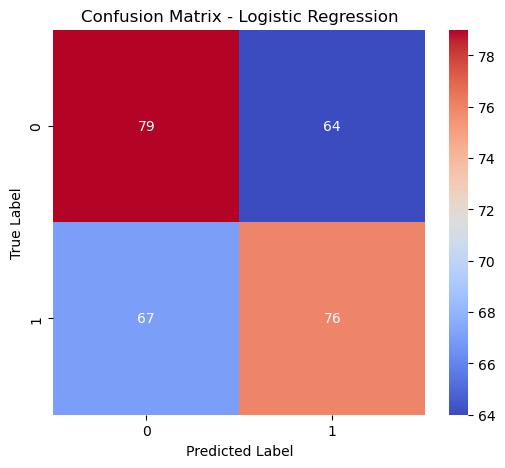

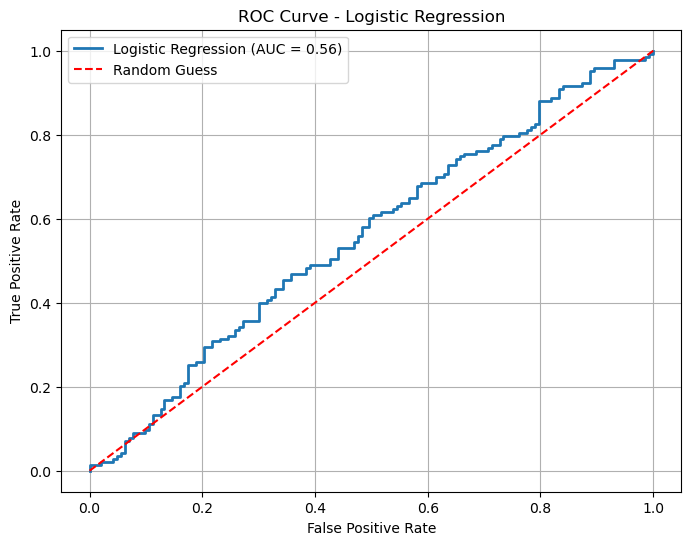

In [141]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=528)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_val)
y_proba_log = log_model.predict_proba(X_val)[:, 1]

# Metrics
log_accuracy = accuracy_score(y_val, y_pred_log)
log_report = classification_report(y_val, y_pred_log)
log_auc = roc_auc_score(y_val, y_proba_log)
conf_matrix_log = confusion_matrix(y_val, y_pred_log)

# Print Results
print("Logistic Regression Performance:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"ROC-AUC Score: {log_auc:.4f}")
print("\nClassification Report:")
print(log_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_log)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_val, y_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Decision Tree Performance:
Accuracy: 0.4930
ROC-AUC Score: 0.4881

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       143
           1       0.49      0.62      0.55       143

    accuracy                           0.49       286
   macro avg       0.49      0.49      0.49       286
weighted avg       0.49      0.49      0.49       286

Confusion Matrix:
[[53 90]
 [55 88]]


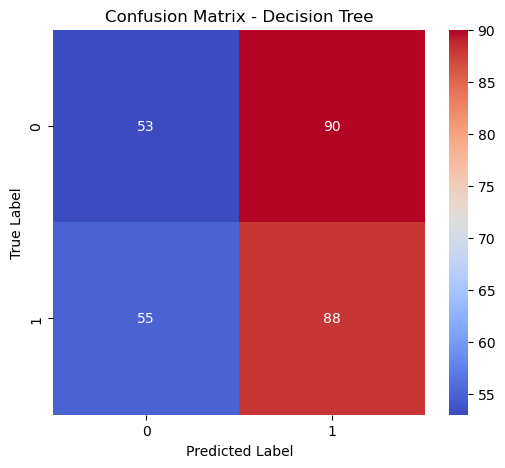

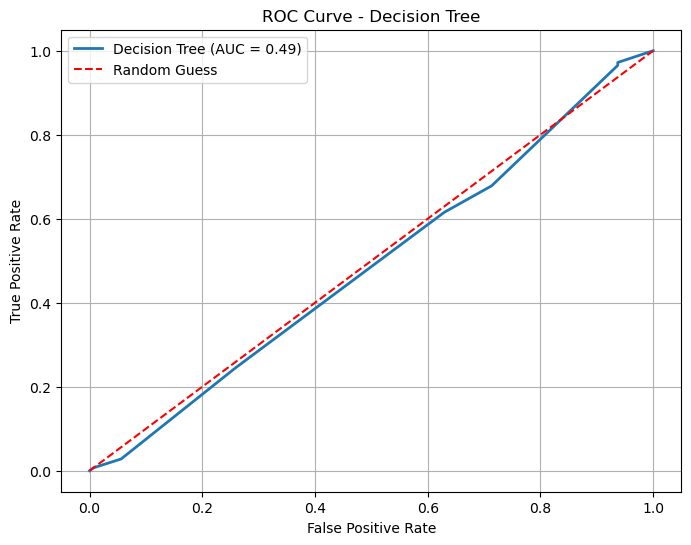

In [142]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=528)  # Example with max_depth for control
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_val)
y_proba_dt = dt_model.predict_proba(X_val)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_val, y_pred_dt)
dt_report = classification_report(y_val, y_pred_dt)
dt_auc = roc_auc_score(y_val, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)

# Print Results
print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC-AUC Score: {dt_auc:.4f}")
print("\nClassification Report:")
print(dt_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_dt)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Random Forest Performance:
Accuracy: 0.5035
ROC-AUC Score: 0.5154

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       143
           1       0.50      0.52      0.51       143

    accuracy                           0.50       286
   macro avg       0.50      0.50      0.50       286
weighted avg       0.50      0.50      0.50       286

Confusion Matrix:
[[70 73]
 [69 74]]


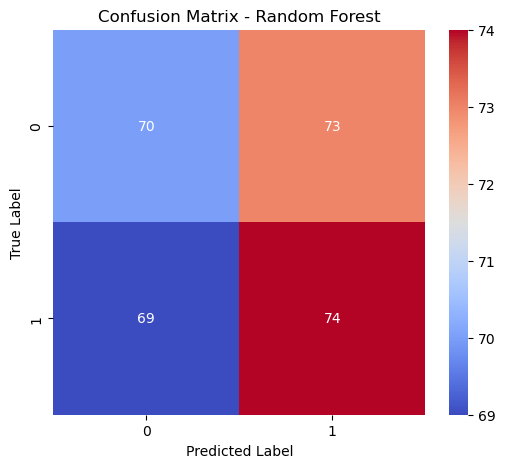

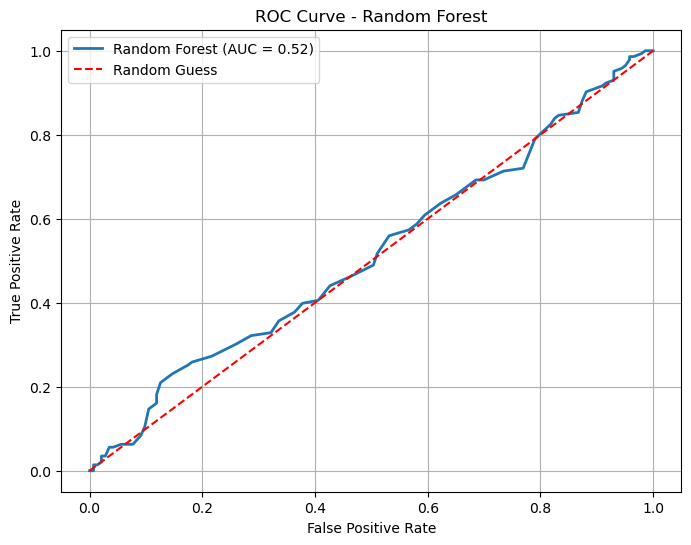

In [143]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=528)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Metrics
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_report = classification_report(y_val, y_pred_rf)
rf_auc = roc_auc_score(y_val, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)

# Print Results
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC-AUC Score: {rf_auc:.4f}")
print("\nClassification Report:")
print(rf_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

XGBoost Performance:
Accuracy: 0.5280
ROC-AUC Score: 0.5087

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       143
           1       0.53      0.54      0.53       143

    accuracy                           0.53       286
   macro avg       0.53      0.53      0.53       286
weighted avg       0.53      0.53      0.53       286

Confusion Matrix:
[[74 69]
 [66 77]]


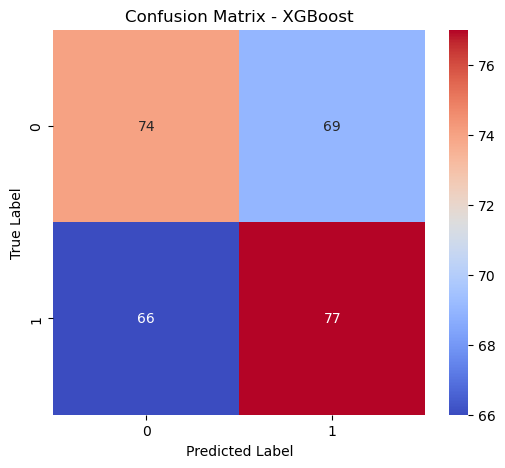

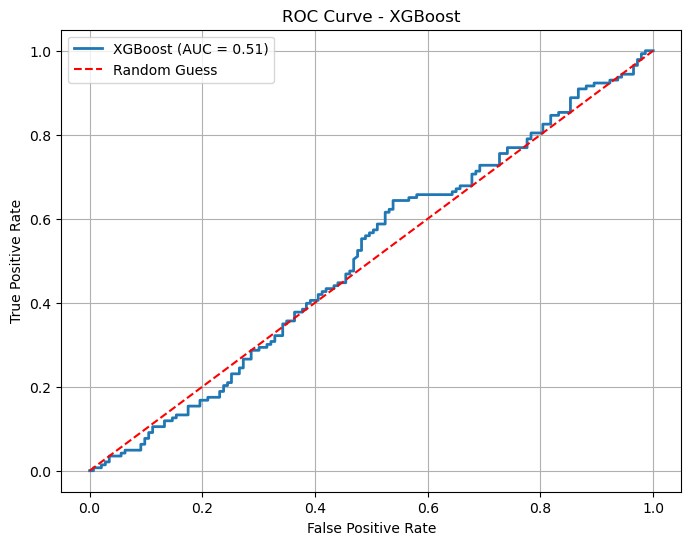

In [144]:
# XGBoost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=50, random_state=528)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Metrics
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_report = classification_report(y_val, y_pred_xgb)
xgb_auc = roc_auc_score(y_val, y_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)

# Print Results
print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC-AUC Score: {xgb_auc:.4f}")
print("\nClassification Report:")
print(xgb_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

[LightGBM] [Info] Number of positive: 333, number of negative: 334
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 500
[LightGBM] [Info] Number of data points in the train set: 667, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499250 -> initscore=-0.002999
[LightGBM] [Info] Start training from score -0.002999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

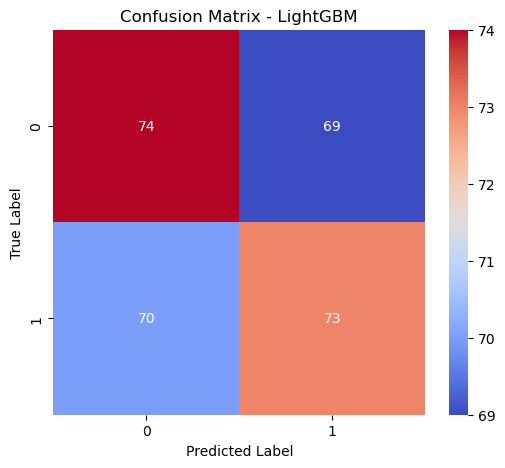

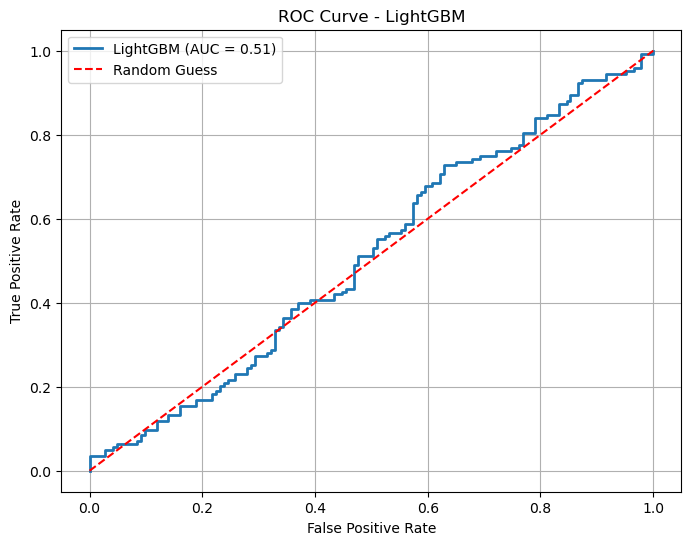

In [145]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(max_depth=3, learning_rate=0.1, n_estimators=50, random_state=528)
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_val)
y_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Metrics
lgbm_accuracy = accuracy_score(y_val, y_pred_lgbm)
lgbm_report = classification_report(y_val, y_pred_lgbm)
lgbm_auc = roc_auc_score(y_val, y_proba_lgbm)
conf_matrix_lgbm = confusion_matrix(y_val, y_pred_lgbm)

# Print Results
print("LightGBM Performance:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"ROC-AUC Score: {lgbm_auc:.4f}")
print("\nClassification Report:")
print(lgbm_report)

# Print Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix_lgbm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot ROC Curve
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_proba_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {lgbm_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "r--", label="Random Guess", linewidth=1.5)
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

### Model Performance Comparison and Visualization:

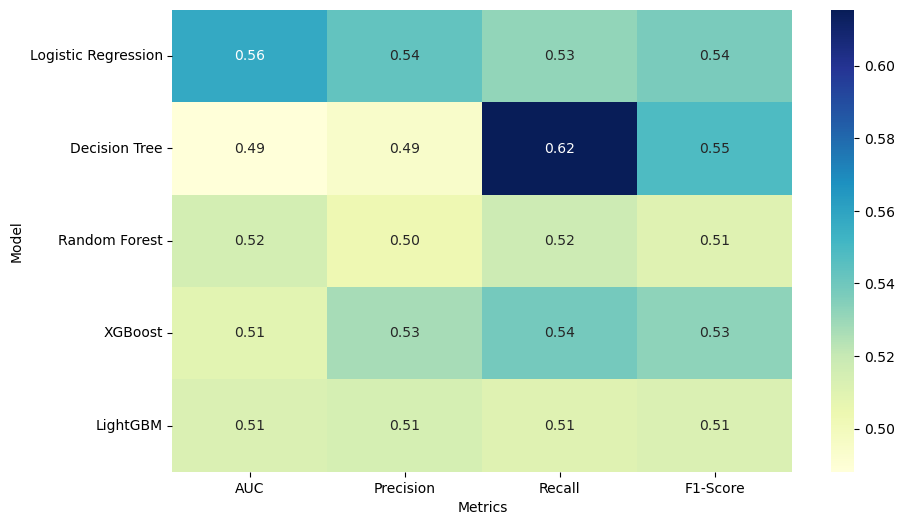

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Combine metrics into a DataFrame for comparison
model_comparison_2 = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [log_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, lgbm_accuracy],
    "AUC": [log_auc, dt_auc, rf_auc, xgb_auc, lgbm_auc],
    "Precision": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_lgbm, output_dict=True)["1"]["precision"],
    ],
    "Recall": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_lgbm, output_dict=True)["1"]["recall"],
    ],
    "F1-Score": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_lgbm, output_dict=True)["1"]["f1-score"],
    ]
})


styled_model_comparison_2 = model_comparison_2.style.set_caption("Model Performance Metrics Comparison - Dataset 2\n")
display(styled_model_comparison_2)

# Prepare data for heatmap visualization
heatmap_data_2 = model_comparison_2.set_index("Model").drop(columns="Accuracy")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_2, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.xlabel("Metrics")
plt.yticks(rotation=0)
plt.show()

### Merged Dataset:


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = [
    'danceability', 'energy', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness'
]
X = combined_df[features]
y = combined_df['popular']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=528, stratify=y)

Logistic Regression Performance:
Accuracy: 0.7567
ROC-AUC Score: 0.6729

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      6163
           1       0.58      0.03      0.06      2003

    accuracy                           0.76      8166
   macro avg       0.67      0.51      0.46      8166
weighted avg       0.71      0.76      0.66      8166



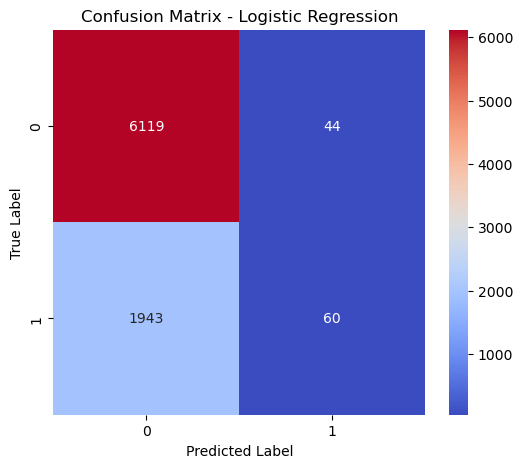

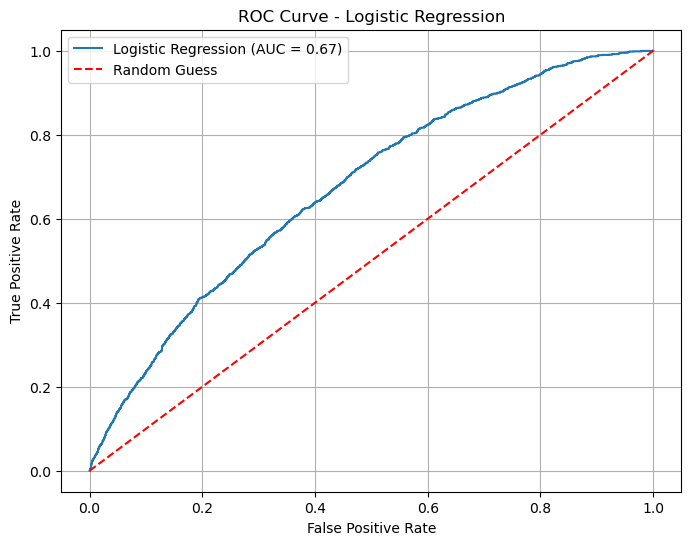

In [150]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=528)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_val)
y_proba_log = log_model.predict_proba(X_val)[:, 1]

# Metrics
log_accuracy = accuracy_score(y_val, y_pred_log)
log_report = classification_report(y_val, y_pred_log)
log_auc = roc_auc_score(y_val, y_proba_log)
conf_matrix_log = confusion_matrix(y_val, y_pred_log)

# Print Results
print("Logistic Regression Performance:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"ROC-AUC Score: {log_auc:.4f}")
print("\nClassification Report:")
print(log_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_val, y_proba_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {log_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Decision Tree Performance:
Accuracy: 0.7851
ROC-AUC Score: 0.7042

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      6163
           1       0.88      0.14      0.25      2003

    accuracy                           0.79      8166
   macro avg       0.83      0.57      0.56      8166
weighted avg       0.81      0.79      0.72      8166



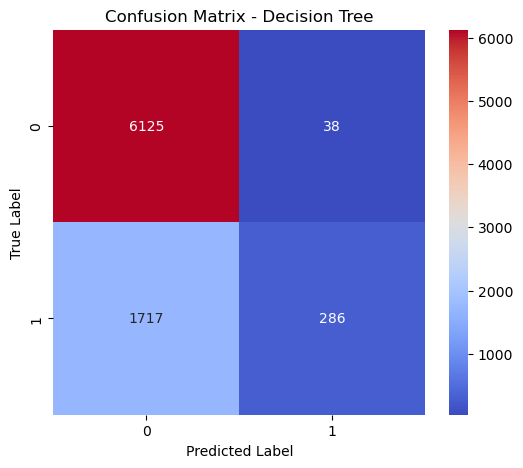

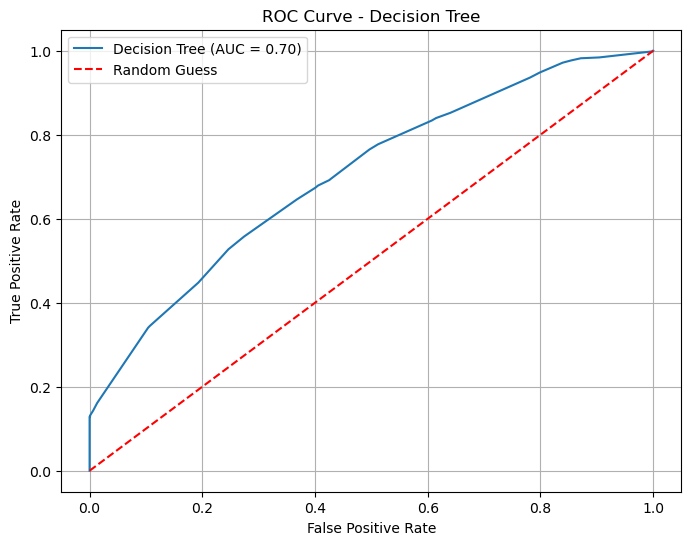

In [151]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=528)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_val)
y_proba_dt = dt_model.predict_proba(X_val)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_val, y_pred_dt)
dt_report = classification_report(y_val, y_pred_dt)
dt_auc = roc_auc_score(y_val, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_val, y_pred_dt)

# Print Results
print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC-AUC Score: {dt_auc:.4f}")
print("\nClassification Report:")
print(dt_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_val, y_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

Random Forest Performance:
Accuracy: 0.8764
ROC-AUC Score: 0.8490

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6163
           1       0.88      0.57      0.69      2003

    accuracy                           0.88      8166
   macro avg       0.88      0.77      0.81      8166
weighted avg       0.88      0.88      0.87      8166



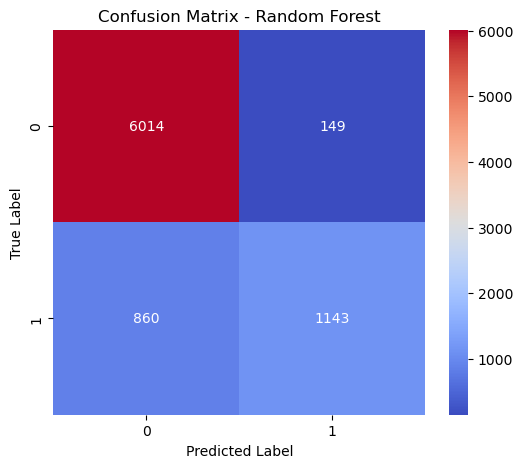

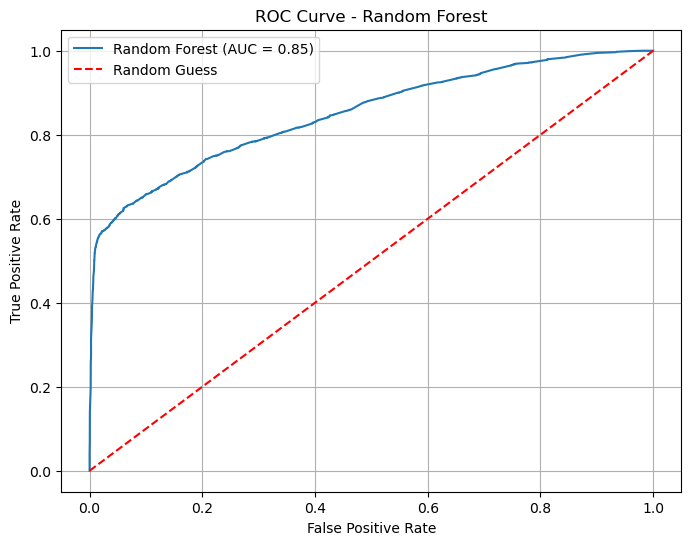

In [152]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=528)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Metrics
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_report = classification_report(y_val, y_pred_rf)
rf_auc = roc_auc_score(y_val, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)

# Print Results
print("Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC-AUC Score: {rf_auc:.4f}")
print("\nClassification Report:")
print(rf_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

XGBoost Performance:
Accuracy: 0.7868
ROC-AUC Score: 0.7365

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6163
           1       0.96      0.14      0.24      2003

    accuracy                           0.79      8166
   macro avg       0.87      0.57      0.56      8166
weighted avg       0.83      0.79      0.72      8166



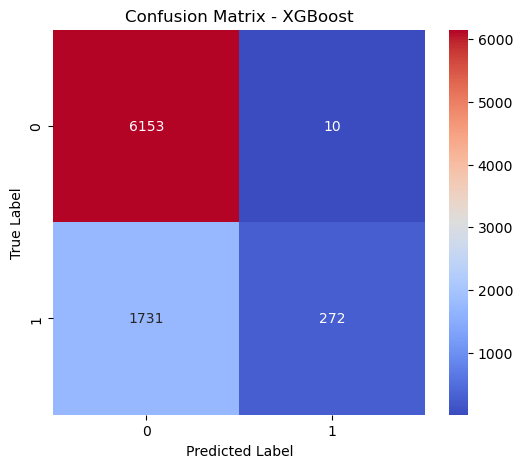

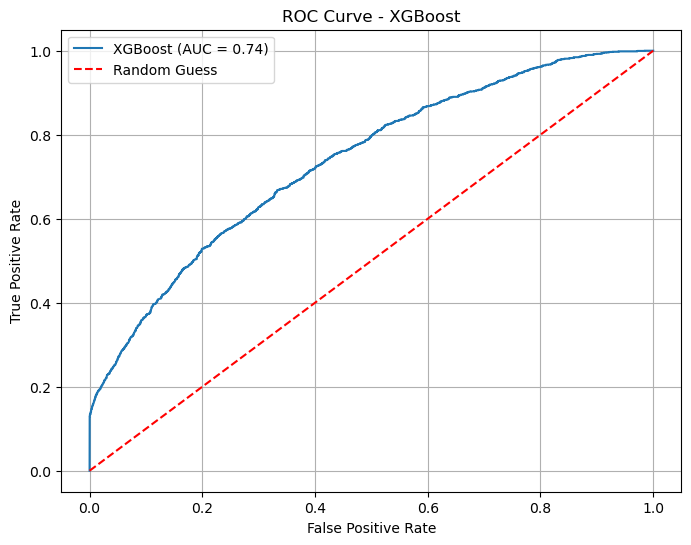

In [153]:
# XGBoost
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=50, random_state=528)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Metrics
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_report = classification_report(y_val, y_pred_xgb)
xgb_auc = roc_auc_score(y_val, y_proba_xgb)
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)

# Print Results
print("XGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"ROC-AUC Score: {xgb_auc:.4f}")
print("\nClassification Report:")
print(xgb_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

[LightGBM] [Info] Number of positive: 4674, number of negative: 14379
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 19053, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245316 -> initscore=-1.123754
[LightGBM] [Info] Start training from score -1.123754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

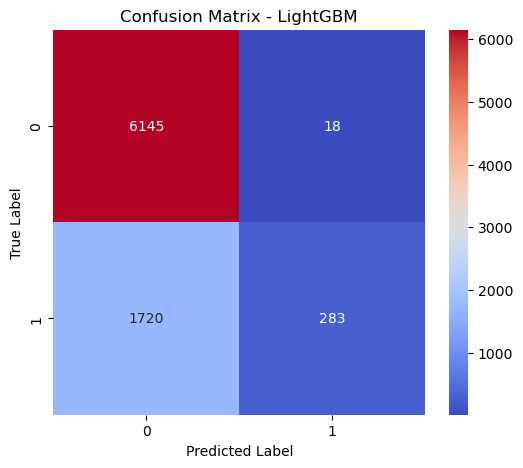

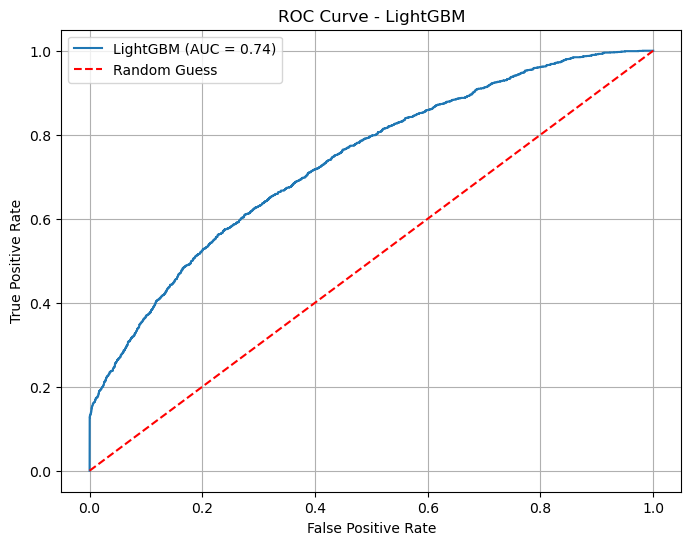

In [154]:
# LightGBM
lgbm_model = LGBMClassifier(max_depth=3, learning_rate=0.1, n_estimators=50, random_state=528)
lgbm_model.fit(X_train, y_train)

# Predictions
y_pred_lgbm = lgbm_model.predict(X_val)
y_proba_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Metrics
lgbm_accuracy = accuracy_score(y_val, y_pred_lgbm)
lgbm_report = classification_report(y_val, y_pred_lgbm)
lgbm_auc = roc_auc_score(y_val, y_proba_lgbm)
conf_matrix_lgbm = confusion_matrix(y_val, y_pred_lgbm)

# Print Results
print("LightGBM Performance:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"ROC-AUC Score: {lgbm_auc:.4f}")
print("\nClassification Report:")
print(lgbm_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC Curve
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_proba_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f"LightGBM (AUC = {lgbm_auc:.2f})")
plt.plot([0, 1], [0, 1], "r--", label="Random Guess")
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

### Model Performance Comparison and Visualization:

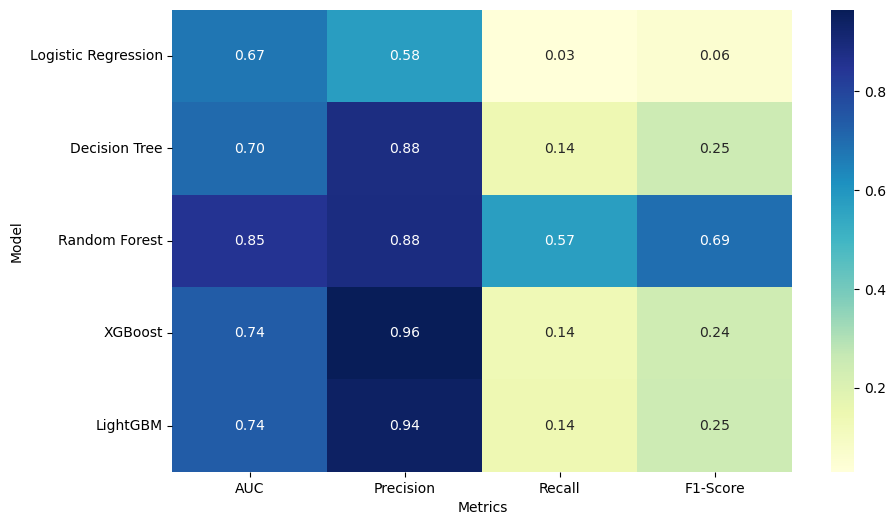

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Combine metrics into a DataFrame for comparison
model_comparison_merged = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [log_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, lgbm_accuracy],
    "AUC": [log_auc, dt_auc, rf_auc, xgb_auc, lgbm_auc],
    "Precision": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["precision"],
        classification_report(y_val, y_pred_lgbm, output_dict=True)["1"]["precision"],
    ],
    "Recall": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["recall"],
        classification_report(y_val, y_pred_lgbm, output_dict=True)["1"]["recall"],
    ],
    "F1-Score": [
        classification_report(y_val, y_pred_log, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_dt, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_rf, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_xgb, output_dict=True)["1"]["f1-score"],
        classification_report(y_val, y_pred_lgbm, output_dict=True)["1"]["f1-score"],
    ]
})

# Display styled DataFrame
styled_model_comparison_merged = model_comparison_merged.style.set_caption("Model Performance Metrics Comparison - Merged Dataset")
display(styled_model_comparison_merged)

# Prepare data for heatmap visualization
heatmap_data_merged = model_comparison_merged.set_index("Model").drop(columns="Accuracy")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_merged, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.xlabel("Metrics")
plt.ylabel("Model")
plt.yticks(rotation=0)
plt.show()

# Phase 7:  Final Model Selection



## Our Final Model: Random Forest built on Merged Dataset


Confuion Matrix of Final Model
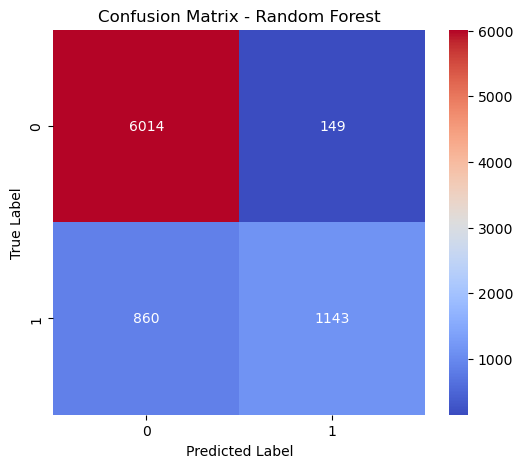


After thorough evaluation and comparison of multiple models, the Random Forest classifier was selected as the final model due to its balance between accuracy and interpretability. The model demonstrated strong overall performance on the testing dataset, with an accuracy of 87.64% and an ROC-AUC score of 0.8490, indicating its robust ability to distinguish between the two classes.

## Key Performance Metrics:
Accuracy:
The model achieved an accuracy of 87.64%, meaning it correctly predicted 87.64% of the total instances in the testing dataset.

ROC-AUC Score:
The ROC-AUC score of 0.8490 reflects the model’s ability to effectively rank positive cases higher than negative cases, signifying good classification performance.


Macro and Weighted Averages:
The macro average of F1-scores across both classes is 0.81, reflecting an overall balance in classification performance.
The weighted average F1-score of 0.87 accounts for class imbalance, emphasizing the model's strong overall reliability.


## Insights and Final Justification:
The decision to employ a Random Forest model built on the merged dataset from df1 and df2 was strategically guided by the enhanced completeness and representativeness of the combined data. The process of merging these datasets involved deliberate decisions to harmonize and augment the data fields which were intended to address gaps and provide a fuller picture. This broader base of data enriches the dataset, making it more representative of varying conditions and trends, thereby enhancing the model's ability to generalize across different scenarios.

The Random Forest algorithm, renowned for its robustness and capacity for handling complex datasets, was chosen to maximize the benefits of this enriched dataset. It builds multiple decision trees, leveraging the strength of each to improve accuracy and reduce the likelihood of overfitting through ensemble learning. By averaging the results or choosing the majority outcome across numerous trees, Random Forest effectively handles the diversity and potential biases within the merged dataset, turning these into an advantage by drawing more stable and reliable predictions from a more comprehensive data foundation.

# Phase 8: Financial PayOff Analysis

In [159]:
# Input the final confusion matrix here
TP = 1143   # True Positives (Bottom-right value)
FP = 149   # False Positives (Top-right value)
TN = 6014  # True Negatives (Top-left value)
FN = 869   # False Negatives (Bottom-left value)


In [160]:
# Payoff values
payoff_per_TP = 120_000  # Payoff for True Positive
penalty_per_FP = -10_000  # Penalty for False Positive

# Expected Payoff calculation
expected_payoff = (TP * payoff_per_TP) + (FP * penalty_per_FP)

# Print the expected payoff
print(f"Expected Payoff: ${expected_payoff:,.2f}")

Expected Payoff: $135,670,000.00


In [161]:
# Confusion Matrix values
TPN = TP+(FP*0.2)  # True Positives
FPN = FP*0.8  # False Positives

# Payoff values
payoff_per_TP = 120_000  # Payoff for True Positive
penalty_per_FP = -10_000  # Penalty for False Positive

# Adjust False Positives for 20% probability of becoming True Positives
adjusted_FP_to_TP = FP * 0.2
adjusted_TP = TP + adjusted_FP_to_TP
adjusted_FP = FP - adjusted_FP_to_TP

# Expected Payoff calculation with adjustment
expected_payoff = (TPN * payoff_per_TP) + (FPN * penalty_per_FP)

# Print the expected payoff
print(f"Expected Payoff (with 20% FP to TP adjustment): ${expected_payoff:,.2f}")

Expected Payoff (with 20% FP to TP adjustment): $139,544,000.00


## Q2 a) Expected Payoff: $135,670,000

We multiply the True Positives with 120k (150k-30k) and False Positives with -10k (20k-30k) to get the final payoff value. We use the True Positive and False positive values as these are the values predicted by our model asinvestment opportunities. We want to factor the risk of gain and loss wiht respect to these predicted values.

## Q2 b) Expected Payoff (with 20% FP to TP adjustment): $139,544,000

Here, we use the same logic of multiplying the True Positives with 120k (150k-30k) and False Positives with -10k (20k-30k) to get the final payoff value. An additional step of multiplying False positive with 20% is performed to add it to the value as True Positive.


## Calculations:

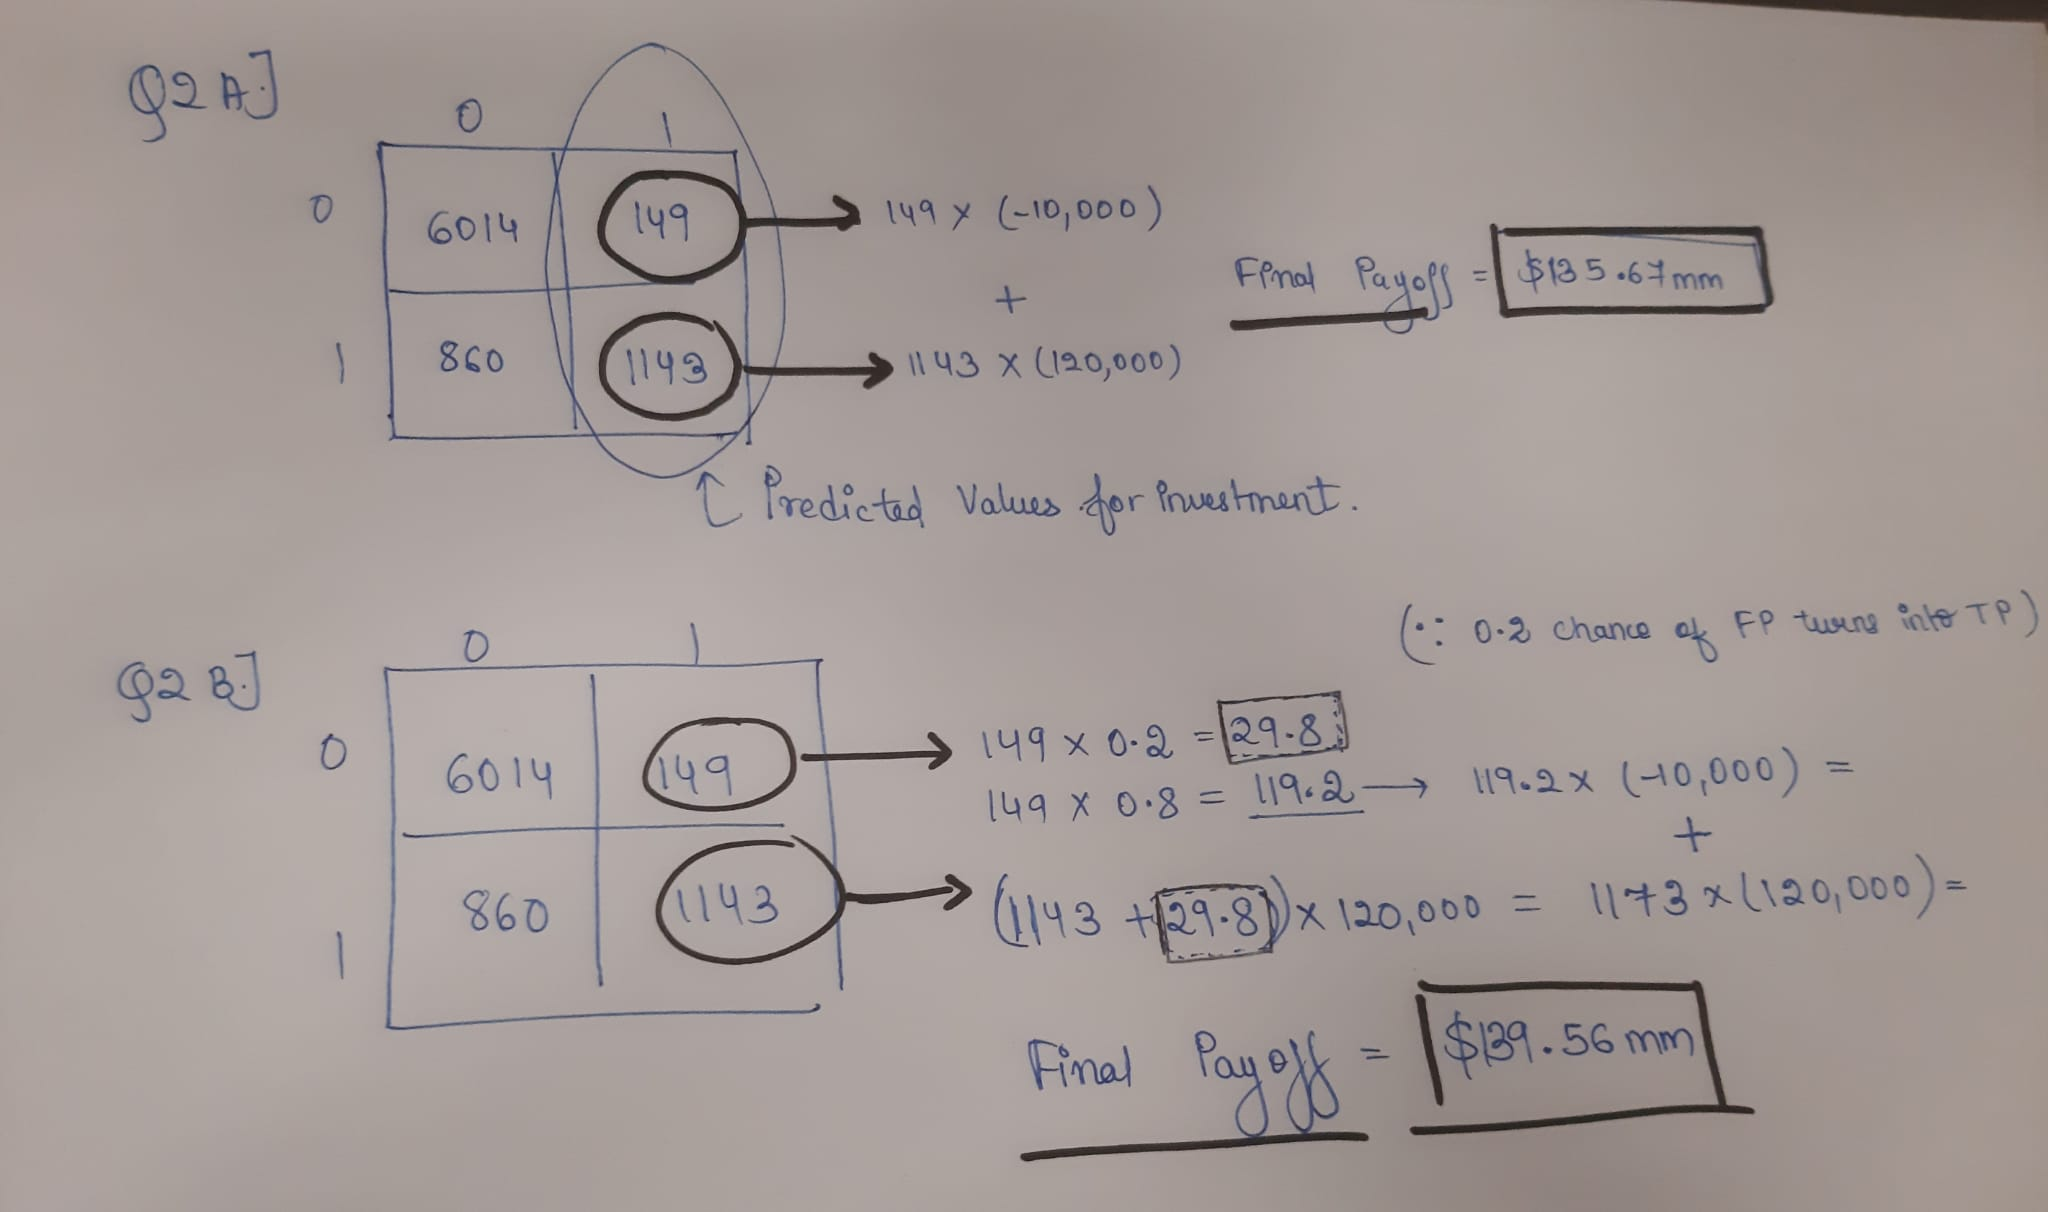

# Phase 9: Recommendations

After comprehensive analysis we build a recommendation matrix with a focus to increase the expected Payoff for Universal Music. 


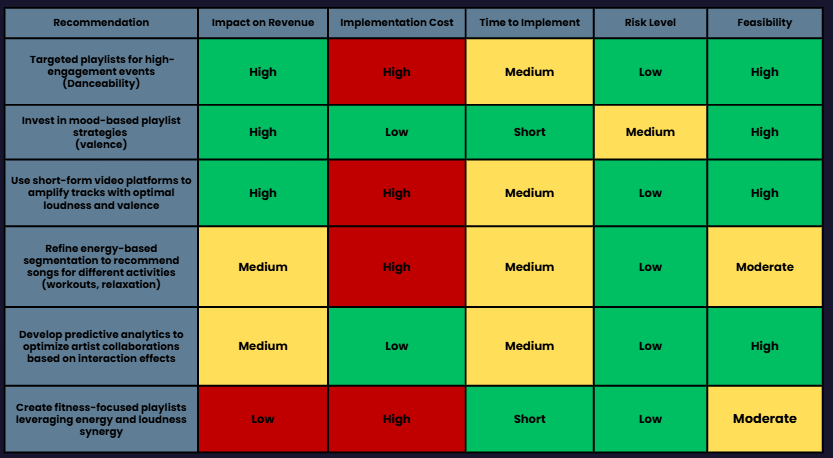


### Strategic Importance of Metrics:

Impact on Revenue 
This metric is fundamental as it directly ties to business growth and sustainability. It helps prioritize initiatives that can generate the strongest financial returns, with three recommendations showing high potential for revenue generation through enhanced user engagement and platform utilization. 

Implementation Cost 
Cost assessment is crucial for resource allocation and budgeting. The matrix reveals varying investment requirements: 
Low-cost options like mood-based strategies offer attractive entry points 
High-cost initiatives like video platform integration require careful financial planning 

Time to Implement 
This metric is vital for: 
Project planning and resource scheduling 
Quick wins identification (like mood-based and fitness playlists) 
Setting realistic timelines for complex initiatives 
Risk and Feasibility Assessment 

Risk Level 
Risk evaluation helps in: 
Protecting business interests 
Identifying potential challenges 
Ensuring sustainable implementation 
The matrix shows most initiatives have manageable risk levels, making them attractive for implementation. 

Feasibility 
This metric determines practical executability by considering: 
Technical capabilities 
Available resources 
Organizational readiness 
High feasibility scores for most recommendations indicate strong potential for successful implementation. 


### Key Recommendations:

**Leverage Danceability to Create Targeted Playlists for High-Engagement Events**:

Danceability has a strong threshold effect. Promoting danceable tracks at events or on curated playlists boosts both visibility and streaming numbers. This approach ensures high engagement and attracts a broader audience.

**Invest in Mood-Based Playlist Strategies (Based on Valence)**:
Mood-centric marketing offers significant customer engagement potential, especially for diverse user groups (e.g., stress relief, productivity). Creating playlists tailored to specific moods enhances user experience and drives repeat usage.

**Refine Energy-Based Segmentation to Recommend Songs for Different Activities**:

Customizing recommendations based on user preferences for energy can drive incremental user engagement and retention. This strategy supports diverse user activities, such as workouts and relaxation, ensuring relevance and personalization.

**Create Fitness-Focused Playlists Leveraging Energy and Loudness Synergy**:

While appealing to a niche, this recommendation is quick to implement and can create loyalty among a smaller, targeted audience. Fitness-focused playlists tap into the growing demand for tailored workout music, fostering deeper connections with specific user segments.



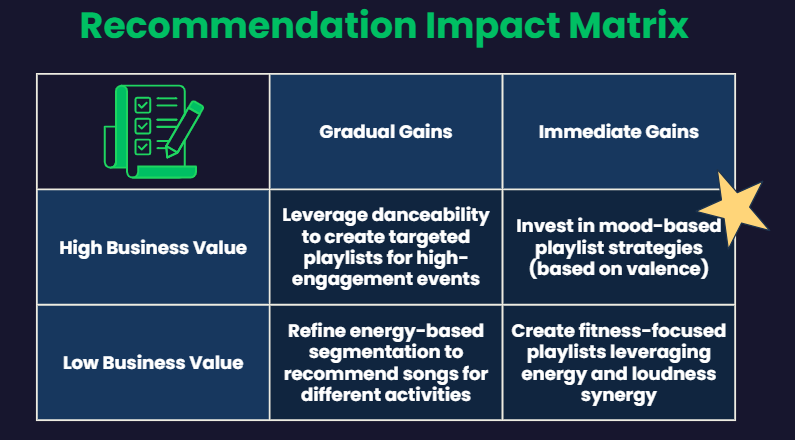


Our high strategic focus is to invest in Mood-based playlists. In this selection strategy we should keep Valence as their key metric to monitor the ideal choice of playlist for investment. 

## Playlist Investment:
Invest in specialized mood-based categories (relaxation, workout, focus, party) 
Design playlists that adapt to different times of day 
Incorporate user behavior data to refine playlist recommendations 

## Execution Plan:
Short-Term Actions 
Launch core mood-based playlists with existing catalog 
Implement basic user behavior tracking 
Start collecting engagement metrics 

## Medium-Term Development:
Refine playlist algorithms based on user interaction 
Expand mood categories based on performance data 
Integrate with high-engagement events 

## Success Metrics:
Key Performance Indicators 

Track user engagement rates 

Monitor playlist retention times 

Measure revenue impact per mood category 

Analyze cross-playlist discovery rates 

This strategy offers the optimal balance of high revenue potential, low implementation cost, and quick market entry, while maintaining manageable risk levels and high feasibility for Universal Music. 

## Conclusion:

<div align="justify" style="font-size:16px;">


This project exemplified the strategic application of data analytics and machine learning to address a critical business problem—optimizing song promotion strategies in the competitive music industry. By leveraging historical and recent Spotify datasets, as well as a merged dataset, the team implemented a structured analytical approach, covering data preparation, exploratory analysis, feature engineering, model development, and financial evaluation. Comprehensive analysis across all datasets enabled the identification of key features like danceability, energy, and valence as strong indicators of song popularity. Rigorous model evaluation using machine learning algorithms such as Random Forest, XGBoost, and LightGBM led to the selection of the Random Forest model built on the merged dataset for its robust performance, striking an ideal balance between accuracy, interpretability, and generalizability. The model’s performance, with an accuracy of 87.64 percent and ROC-AUC of 0.849, showcased its ability to deliver reliable predictions on testing data.

The financial payoff analysis further validated the model’s business value, projecting an annual expected payoff of 135.67 million dollars, which increased to 139.54 million dollars upon factoring in the probability of false positives converting to successful tracks due to promotions. This demonstrates the significant potential of deploying data-driven models to maximize revenue and guide strategic investments. Beyond its technical achievements, this project offers Universal Music a scalable, actionable framework for integrating advanced analytics into promotional strategies. It highlights the transformative role of predictive modeling in identifying high-potential tracks, optimizing resource allocation, and sustaining competitive advantage in the rapidly evolving music landscape. The project sets a foundation for future enhancements, such as real-time analytics and dynamic market adjustments, ensuring adaptability to changing industry trends.
</div>